In [6]:
from common_code.common import *
from common_code.plotting import *

from Trainers.DatasetQA import *
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from random import shuffle

In [7]:
dataset = 'qqp'

base = 'experiments/GLUE/'

base_dir1 = base+dataset+'_diversity_lstm_tanh/'+dataset.upper()+'/diversity_lstm+tanh__diversity_weight_0'
base_dir2 = base+dataset+'_ortho_lstm_tanh/'+dataset.upper()+'/ortho_lstm+tanh'
base_dir3 = base +dataset+'_diversity_lstm_tanh/'+dataset.upper()+'/diversity_lstm+tanh__diversity_weight_0.5'

if 'attn_pngs_0' not in os.listdir(base):
    os.mkdir(base+'attn_pngs_0')
if 'attn_pngs_1' not in os.listdir(base):
    os.mkdir(base+'attn_pngs_1')
        
path_to_png_1 = base + 'attn_pngs_1/'.format(dataset, dataset)
path_to_png_0 = base + 'attn_pngs_0/'.format(dataset, dataset)
path_to_csv_1 = base + 'form_data_1.tsv'.format(dataset, dataset)
path_to_csv_0 = base + 'form_data_0.tsv'.format(dataset, dataset)


In [8]:
dataset = datasets[dataset]()

def process_grads(grads, X) :
    for k in grads :
        if (k != "conicity") and (k != "X"):
            xxe = grads[k]
            for i in range(len(xxe)) :
                L = len(X[i])
                xxe[i] = np.abs(xxe[i])
                xxe[i] = xxe[i] / np.sum(xxe[i][1:L-1])

def get_outputs(base_dir):    
    dirname = get_latest_model(base_dir)
    outputs = pload1(dirname,'test_output')
#     outputs['cd_attn'] = pload1(dirname,'cd')
#     outputs['cd_matrix'] = pload1(dirname,'cd_matrix')
#     pred = np.argmax(outputs['yt_hat'],axis=1).squeeze()
#     yt_pred= np.zeros_like(prob)
#     yt_pred[prob>0.5] = 1
#     outputs['yt_pred'] = pred
    return outputs

In [9]:
def print_attention(output1, output2, output3, output_filter=0, plot=True, jsd_thresh=0.3, max=10, crop=True):
    
    # output_filter = 0 => question are paraphrased/identical
    
    op = output_filter
    
    if(output_filter == 1):
        path_to_png = path_to_png_1
        path_to_csv = path_to_csv_1
    else:
        path_to_png = path_to_png_0
        path_to_csv = path_to_csv_0

    # shuffles outputs
#     shuffle_in_unison(output1)
#     shuffle_in_unison(output2


    fi = open(path_to_csv, 'w')
    count = 0
    
    for idx in range(len(output1['attn_hat'])):
        
        attn1 = output1['attn_hat'][idx]
        attn2 = output2['attn_hat'][idx]
        attn3 = output3['attn_hat'][idx]
        
        L = len(output1['P'][idx])
        js_divergence = jsd(attn1[1:L-1],attn3[1:L-1])

        if (js_divergence >= jsd_thresh):
            
            y_pred1 = output1['yt_hat'][idx]
            y_pred2 = output2['yt_hat'][idx]
            y_pred3 = output3['yt_hat'][idx]
            
            y = output1['y'][idx]

            sentence = dataset.vec.map2words(output1['P'][idx])  
            question = dataset.vec.map2words(output1['Q'][idx])  
            
            l_q = len(question)
            question = " ".join(question[1:l_q-1])

            L = len(sentence)
            
            if ( y == op and y == y_pred1 and y== y_pred3):
            
                if( max != -1 and count == max):
                    break
                    
                count += 1
            
                if(plot):
                    # write to file

                    fi.write(str(y)+'\t')
                    fi.write(question+'\n')

                    #plot figures
                    png_path = path_to_png + "example{}.png".format(count)
                    
                    print(question)
                    print(L)

                    print_attn(sentence[1:L-1], attn1[1:L-1])
                    print_attn(sentence[1:L-1], attn3[1:L-1])

                    if(len(sentence[1:L-1]) <= 12):
                        kws = {"rotation": 0, "size": 10}
                    else:
                        kws = {"rotation": 45, "size": 15}

                    fig, ax = init_gridspec(10, 1, 2)
                    attn_matirx = np.array(attn1[1:L-1]).reshape(1,-1)
                    annotate = np.array(sentence[1:L-1]).reshape(1,-1)
                    ax[0].set_ylabel('')    
                    ax[0].set_xlabel('')

                    ax[0] = plot_attention(ax[0], attn_matirx, annotate, kws)

                    attn_matirx = np.array(attn3[1:L-1]).reshape(1,-1)
                    annotate = np.array(sentence[1:L-1]).reshape(1,-1)
                    ax[1] = plot_attention(ax[1], attn_matirx, annotate, kws)

                    show_gridspec()
                    fig.savefig(png_path)
                    
                    print ("-"*30)
                    sys.stdout.flush()
                    
                    
    if(plot and crop):
        #crop pngs to remove whitespace
        print("Cropping saved pngs")

        for l in os.listdir(path_to_png):
            if(l == '.DS_Store'):
                continue
            crop_img(path_to_png+l)

        print("Done cropping")
            
    return count

What is colonial rule ?
6


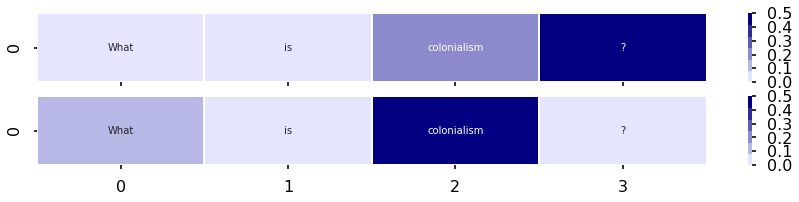

------------------------------
What is refrigeration ?
6


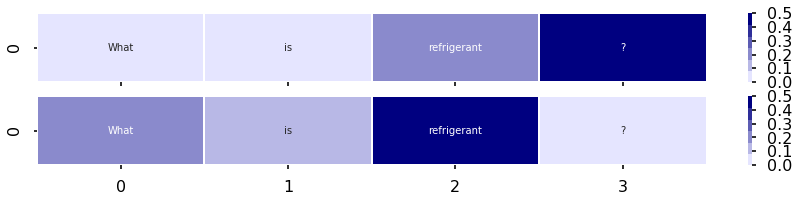

------------------------------
What is macro ?
6


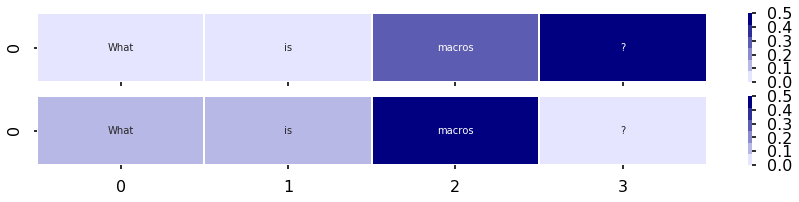

------------------------------
What is <UNK> ?
6


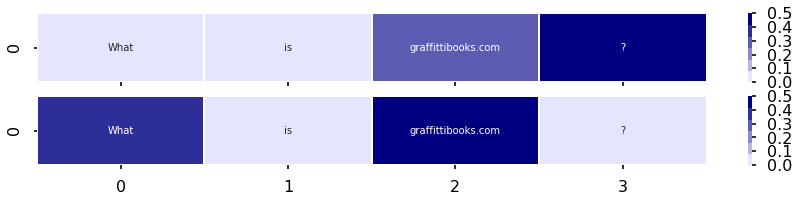

------------------------------
What are some conservative strategy ?
6


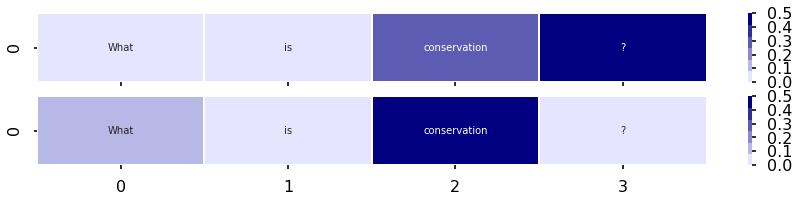

------------------------------
What causes friction ?
6


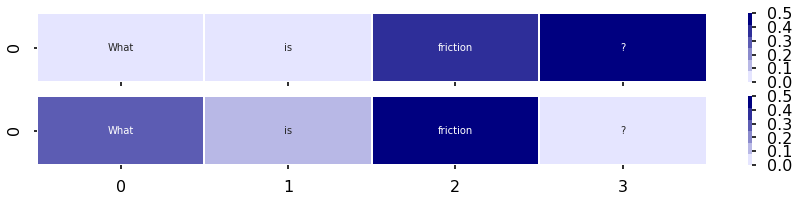

------------------------------
Who invented the bicycle ?
6


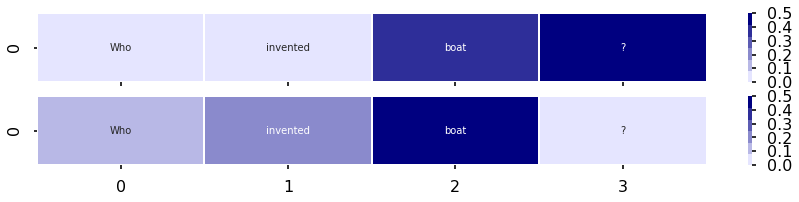

------------------------------
What are liberal <UNK> ?
6


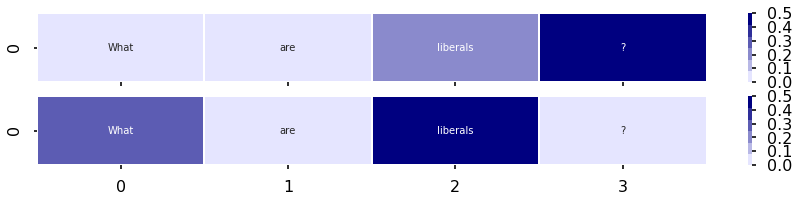

------------------------------
What is pen c ?
6


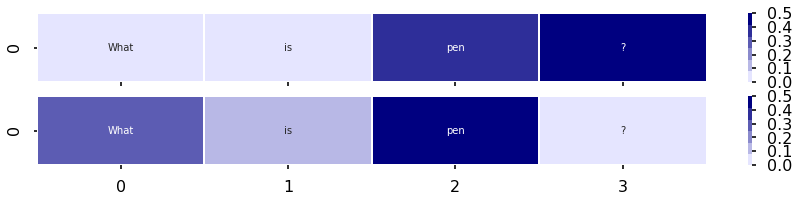

------------------------------
What is training ?
6


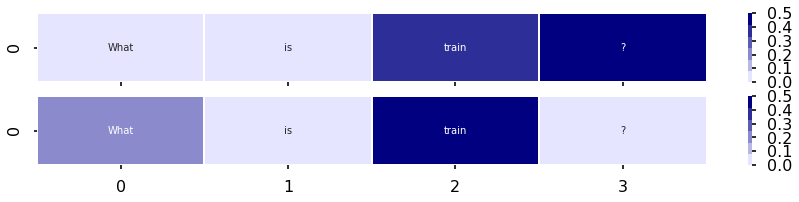

------------------------------
Is there a cure for cancer ?
6


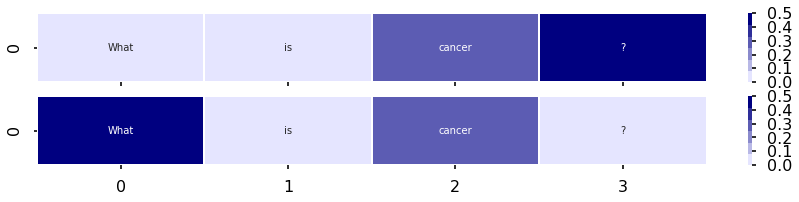

------------------------------
What is your sexual time ?
6


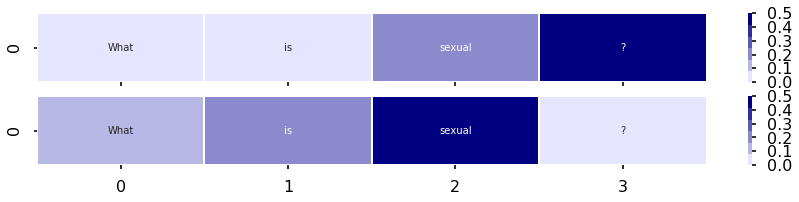

------------------------------
What is the court of God ?
6


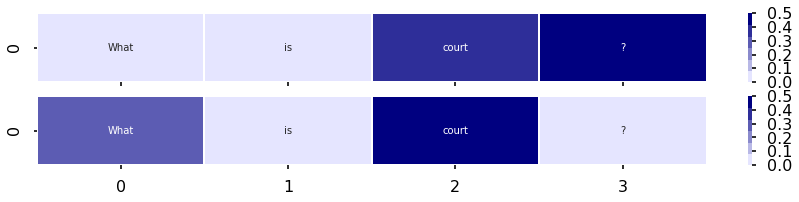

------------------------------
How does Canada have so many Indians ?
6


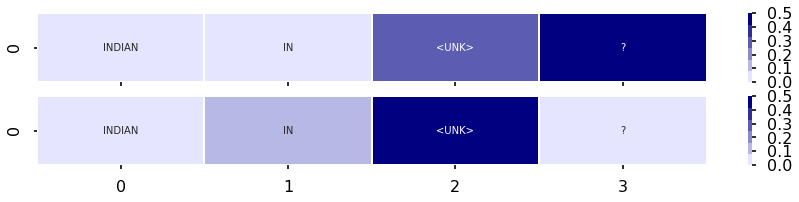

------------------------------
What is <UNK> ?
6


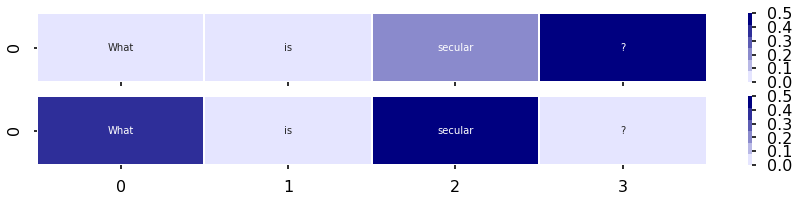

------------------------------
What is fabric made of ?
6


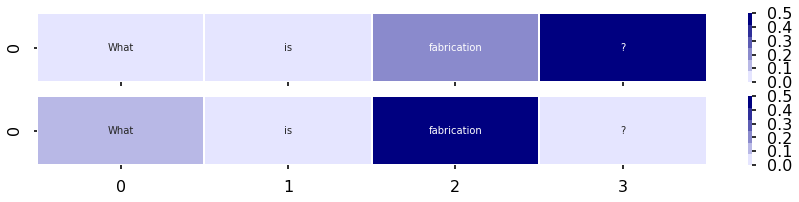

------------------------------
What are some must read non-fiction books ?
6


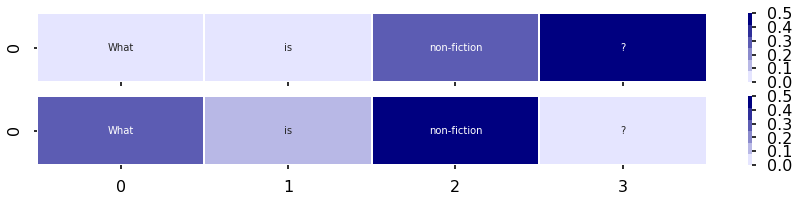

------------------------------
What is shell gas ?
6


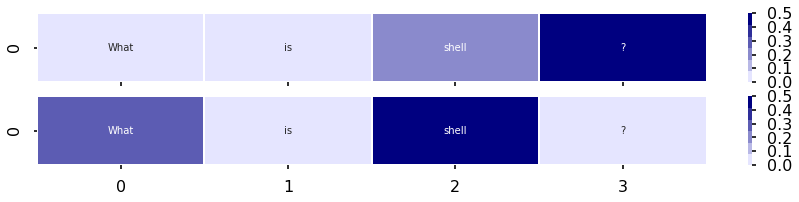

------------------------------
What are you obsessed with these days ?
6


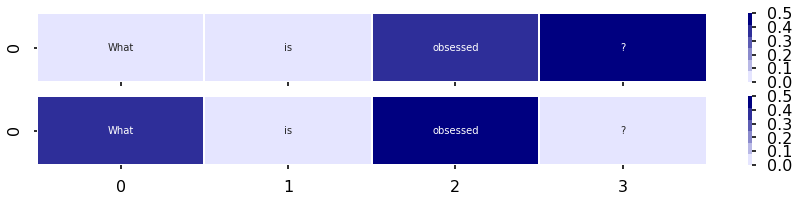

------------------------------
What is labour business ?
6


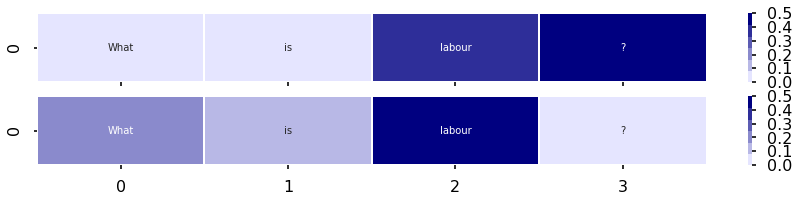

------------------------------
What is the cognitive turn ?
6


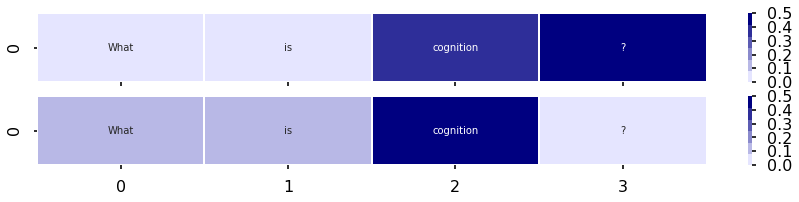

------------------------------
What is <UNK> ?
6


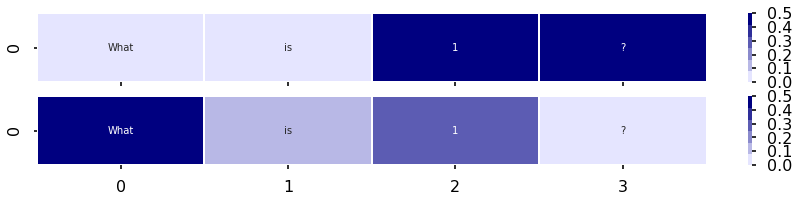

------------------------------
What is <UNK> ?
6


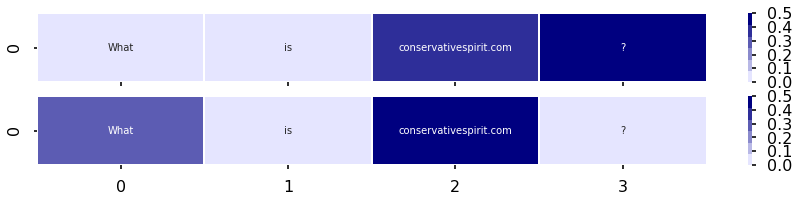

------------------------------
I want to learn ecology , where should I start ?
6


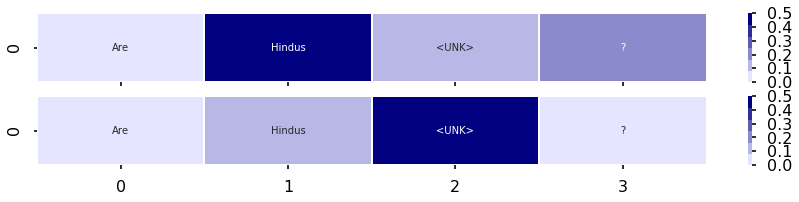

------------------------------
Who is the artist that painted this ?
7


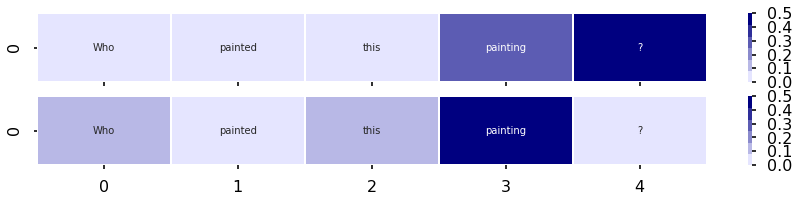

------------------------------
How do I tune my ukulele ?
7


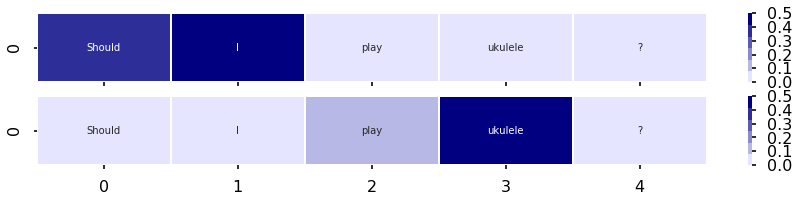

------------------------------
<UNK> HTML5 canvas ?
7


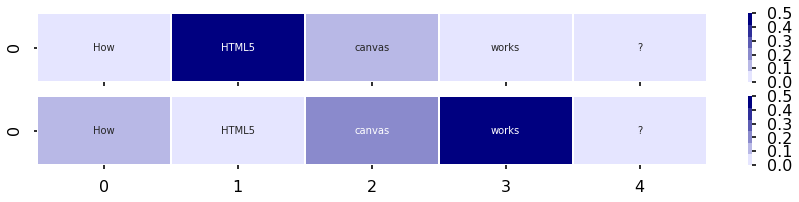

------------------------------
What is mathematical proof ?
7


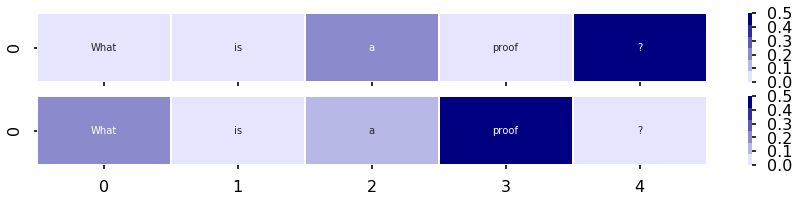

------------------------------
What is an advertisement ?
7


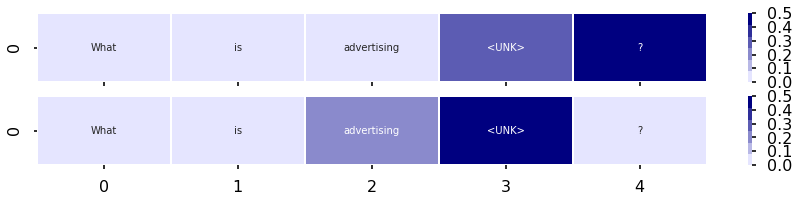

------------------------------
What is spectrum ?
7


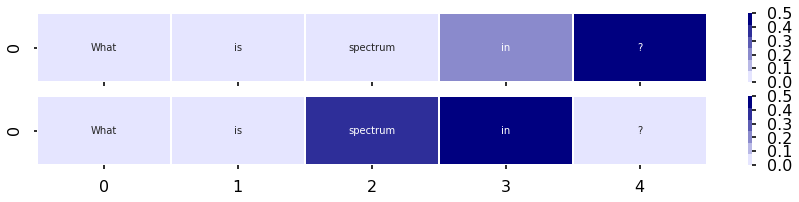

------------------------------
Will this be considered as plagiarism ?
7


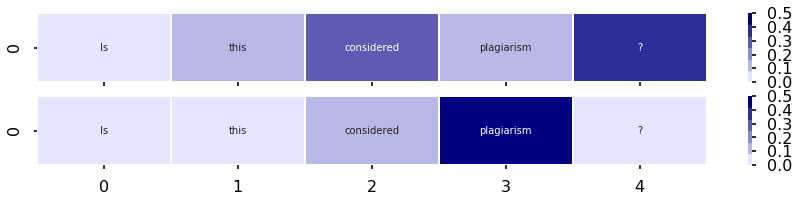

------------------------------
Why are we humans ?
7


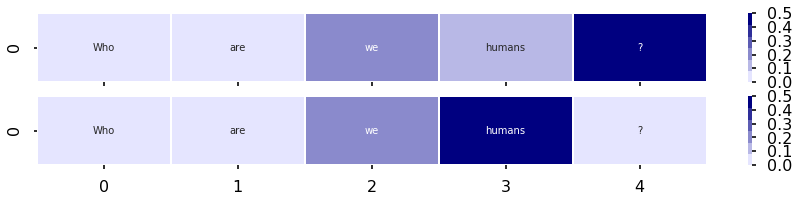

------------------------------
What rhymes with books ?
7


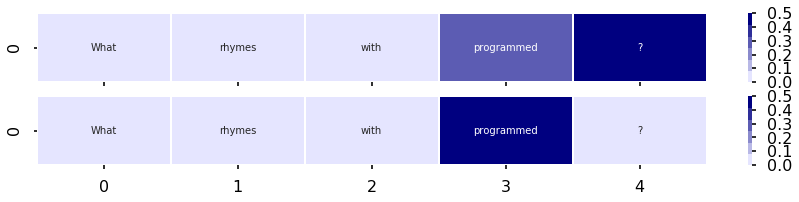

------------------------------
What is the best way to cook a ham ?
7


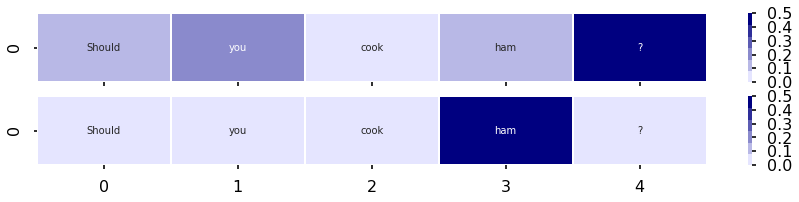

------------------------------
What does SQLite do ?
7


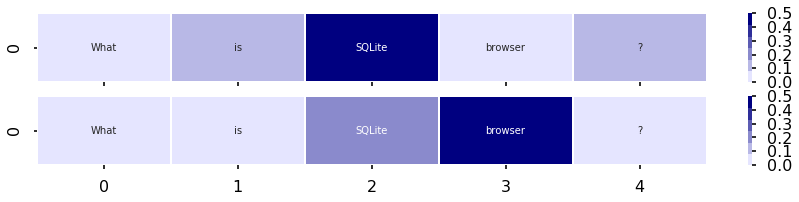

------------------------------
If you could regenerate health ( like video games ) how would this change war in real life ?
7


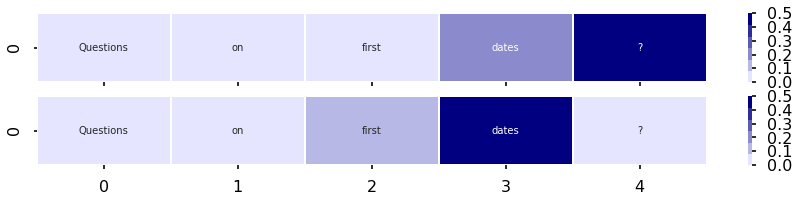

------------------------------
What is happiness ?
7


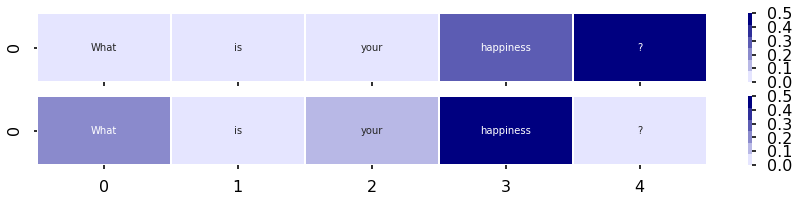

------------------------------
Does the multiverse have a multiverse ?
7


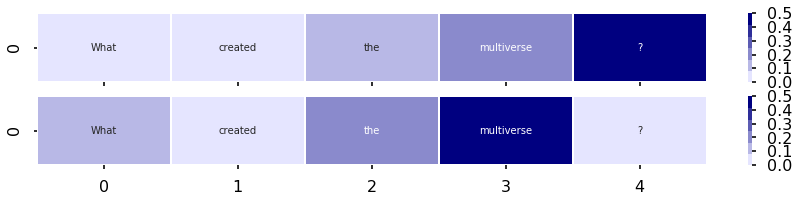

------------------------------
What are the <UNK> ?
7


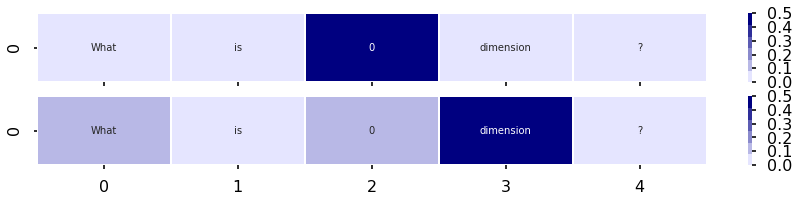

------------------------------
What is AutoCAD ?
7


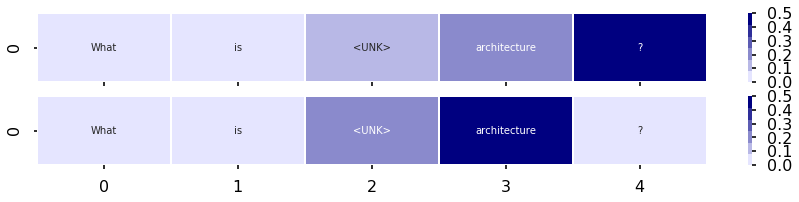

------------------------------
Have electrons always existed ?
7


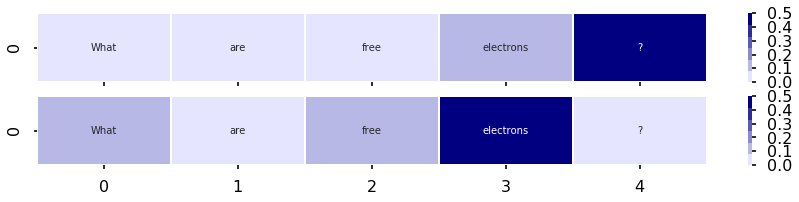

------------------------------
Is Kik messenger awesome ?
7


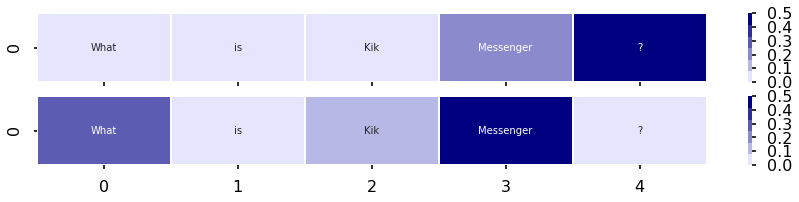

------------------------------
What is systematic learning ?
7


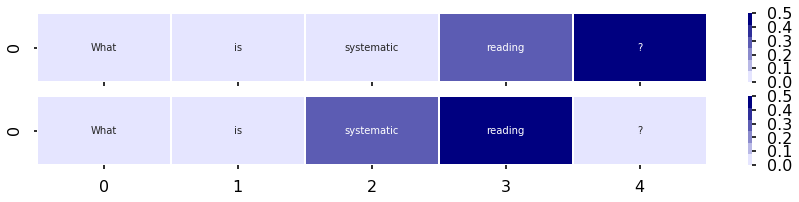

------------------------------
What does <UNK> get eaten by ?
7


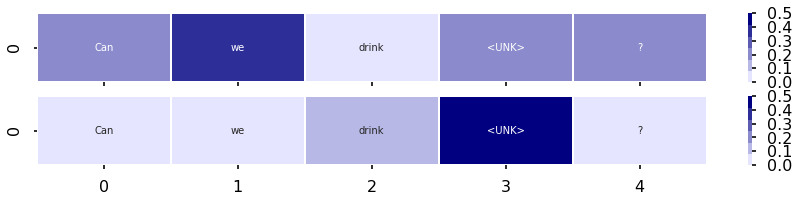

------------------------------
What happens if I jog 30 minutes a day ?
7


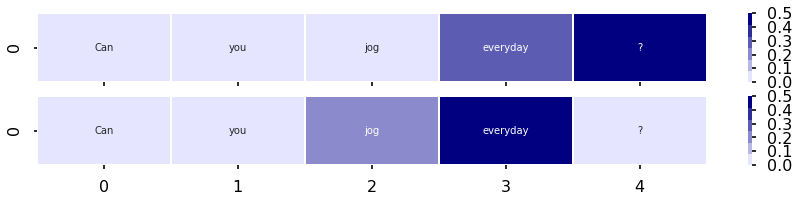

------------------------------
What is advertising salary ?
7


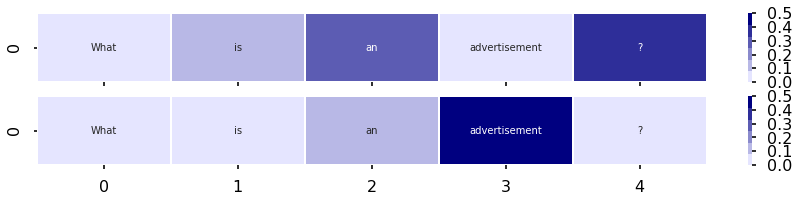

------------------------------
How is teeth scaling done ?
7


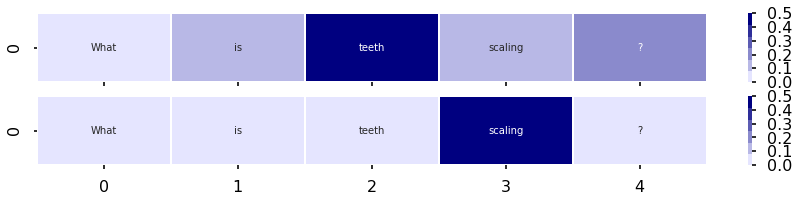

------------------------------
What is graphene ?
7


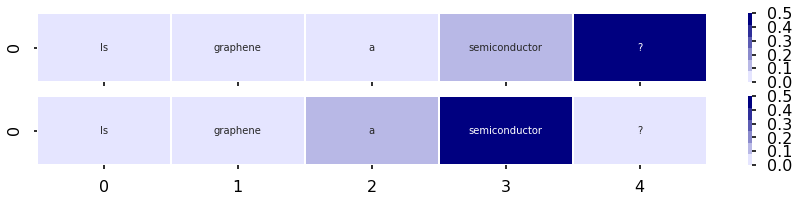

------------------------------
How does Magnus Carlsen think ?
7


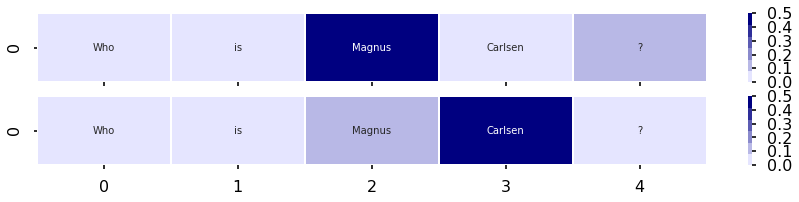

------------------------------
Are Quorans supportive of Modi ?
7


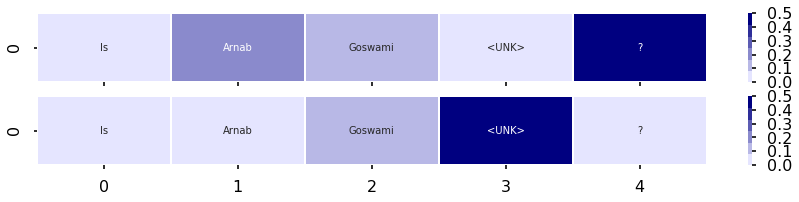

------------------------------
Can lactose intolerance be prevented ? How ?
7


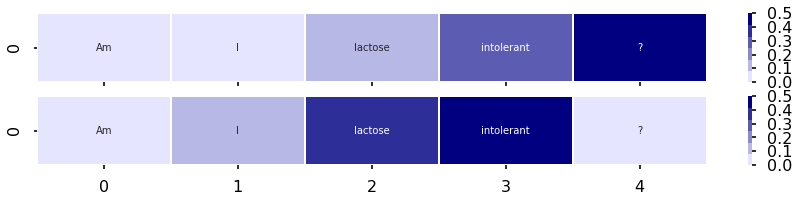

------------------------------
Are you looking for any academic project ?
7


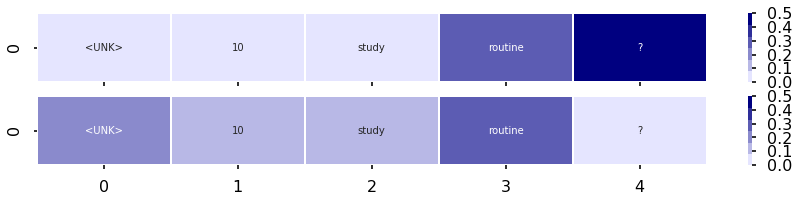

------------------------------
What is the best way to manage tinnitus ?
7


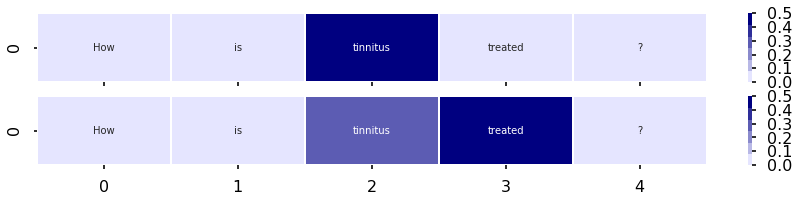

------------------------------
What is self reward ?
7


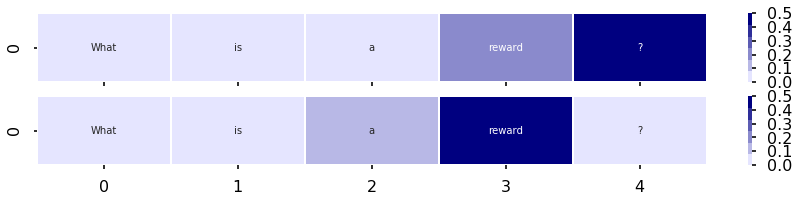

------------------------------
What language is this in ?
7


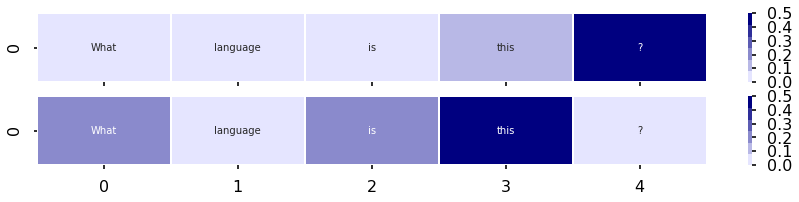

------------------------------
Why are grapes poisonous to dogs ?
7


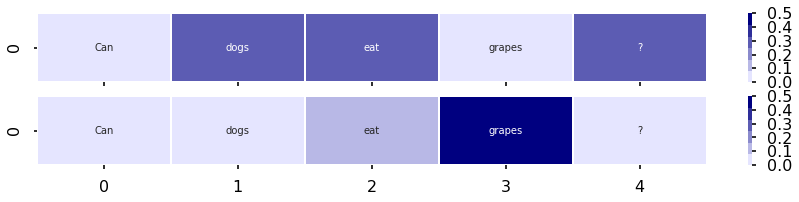

------------------------------
Who is a CEO ?
7


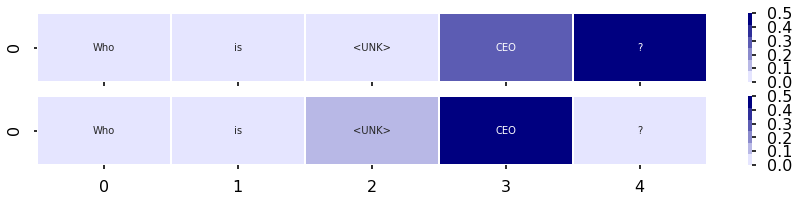

------------------------------
What are the functions and responsibilities of nurse ?
7


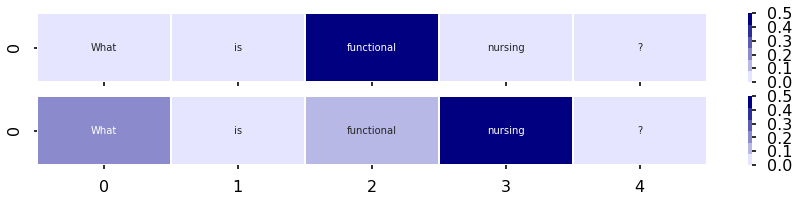

------------------------------
Do women cheat ?
7


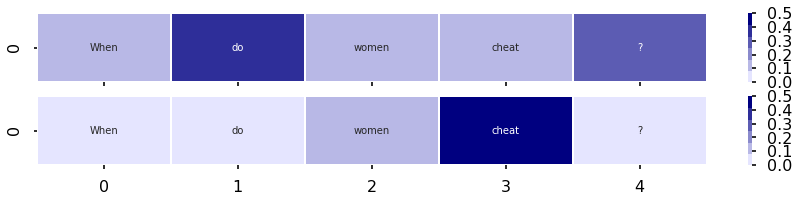

------------------------------
What is Snapchat ?
7


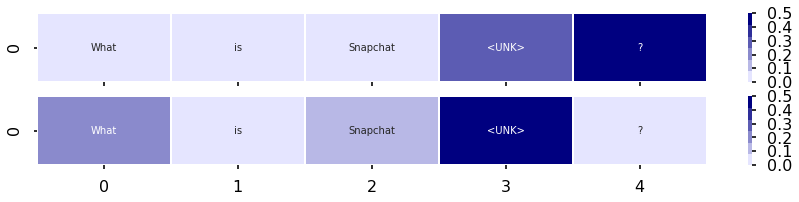

------------------------------
What is entrepreneurship ?
7


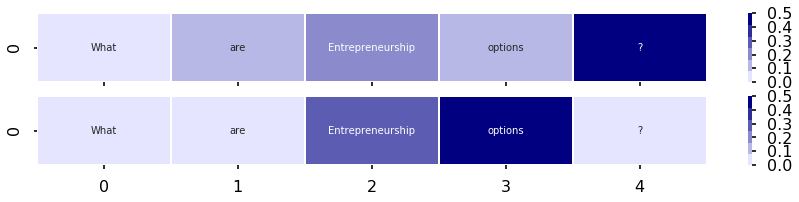

------------------------------
Who is William Lee ?
7


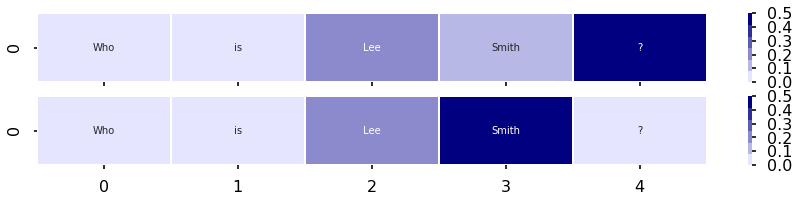

------------------------------
What is the use of MS Access ?
7


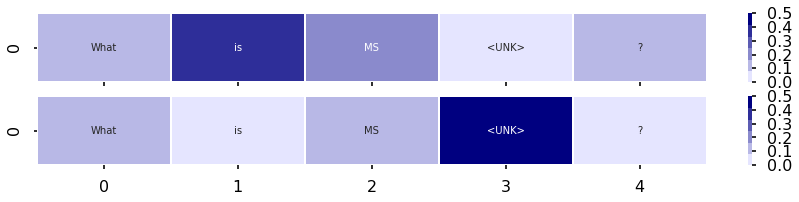

------------------------------
What colour is this dress ?
7


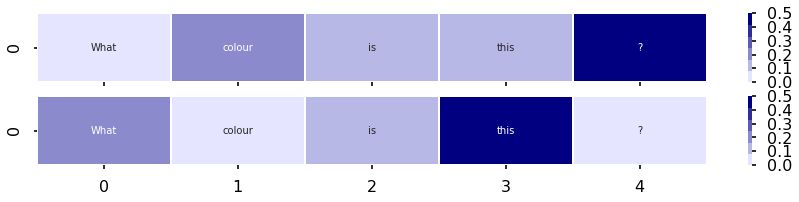

------------------------------
Is Malaysian food the next hot cuisine ?
7


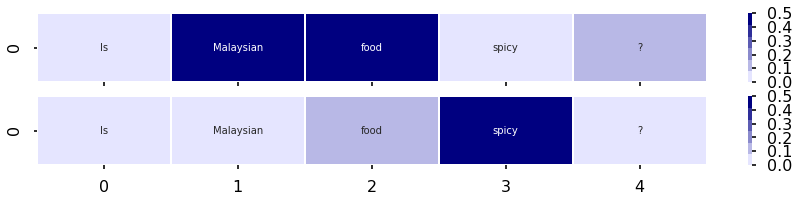

------------------------------
Why is plagiarism morally wrong ?
8


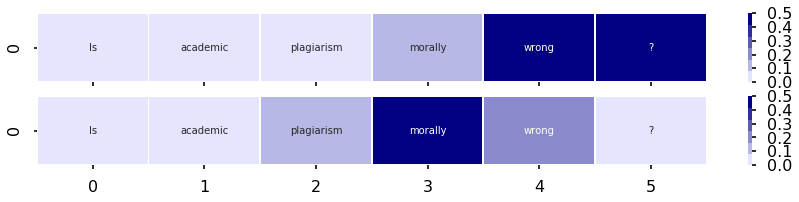

------------------------------
What is mental health ?
8


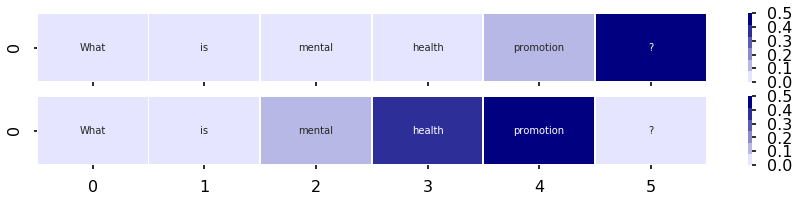

------------------------------
What are your greatest strengths and weaknesses ?
8


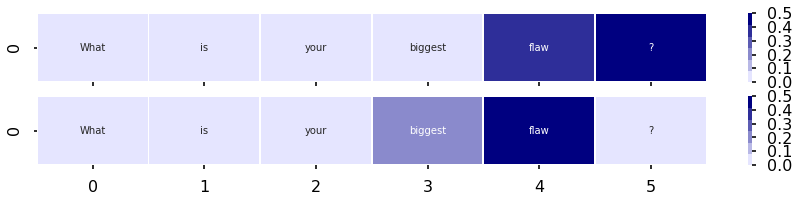

------------------------------
What are the causes of acne ?
8


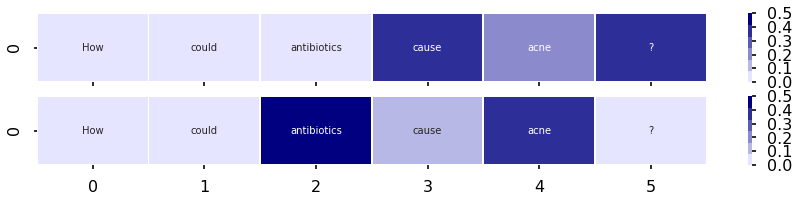

------------------------------
What is <UNK> ? Whats its effect on our body ?
8


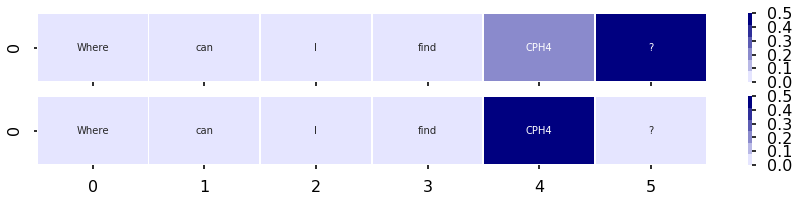

------------------------------
What are the best books on algorithms and data structures ?
8


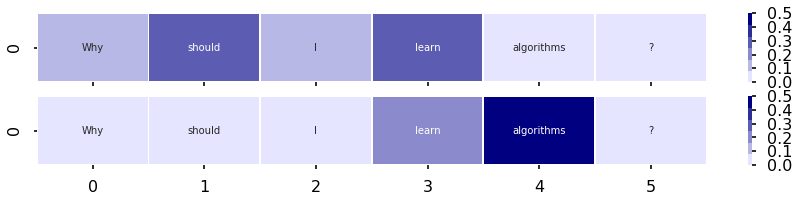

------------------------------
Which algorithm book should I learn ?
8


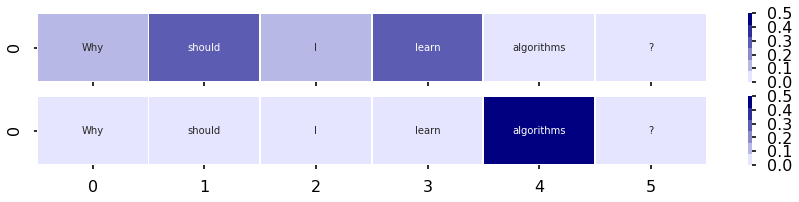

------------------------------
How can you track deleted Facebook messages ?
8


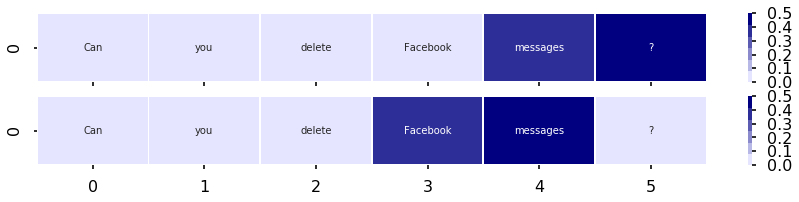

------------------------------
What do Indian Muslims think of Chinese Muslims ?
8


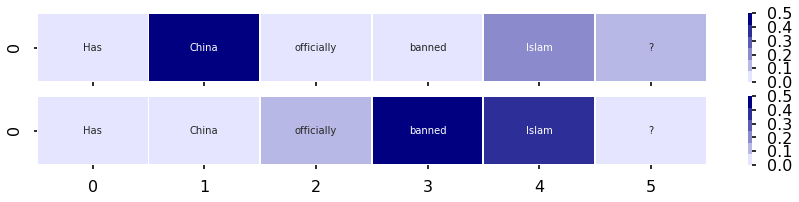

------------------------------
What is a transformer ?
8


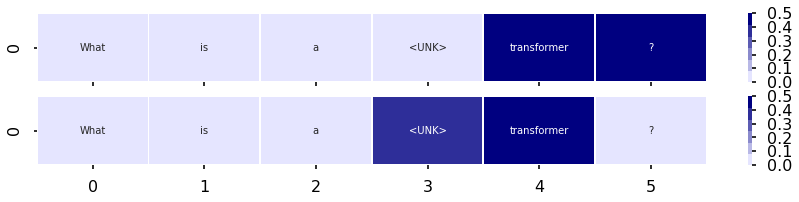

------------------------------
How do you <UNK> your hair ?
8


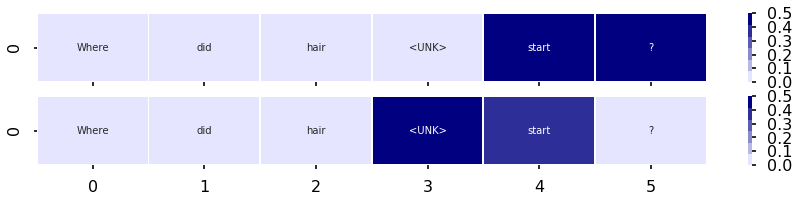

------------------------------
How do I hack into someone 's system ?
8


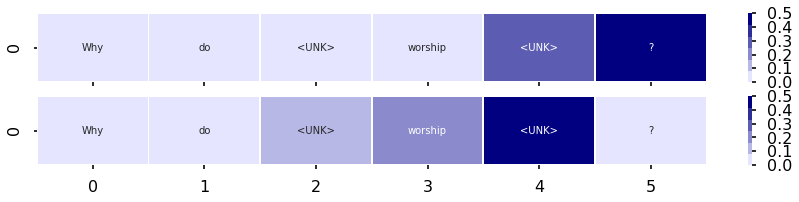

------------------------------
What would happen if Facebook did not exist ?
8


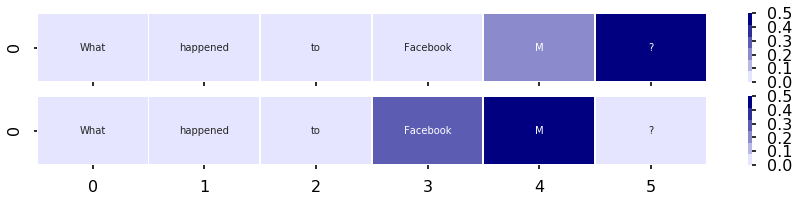

------------------------------
How can anxiety cause brain <UNK> ? How harmful could it be ?
8


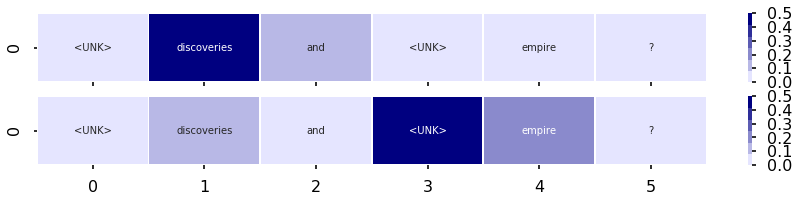

------------------------------
How were <UNK> steel blades originally made ?
8


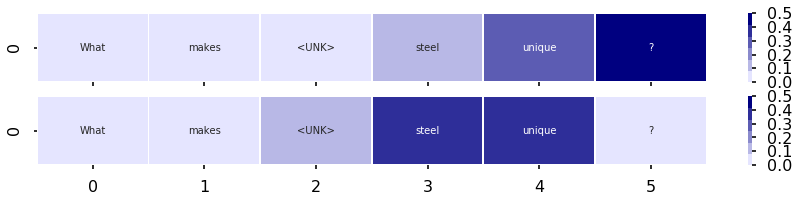

------------------------------
How does money laundering work ?
8


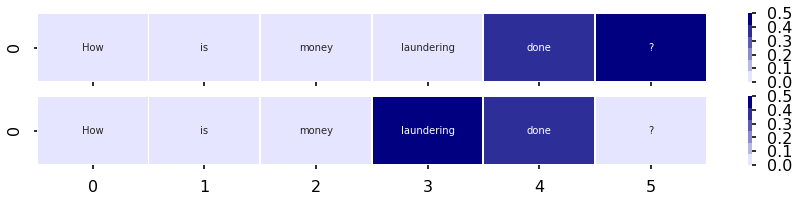

------------------------------
What color is made from all colors ?
8


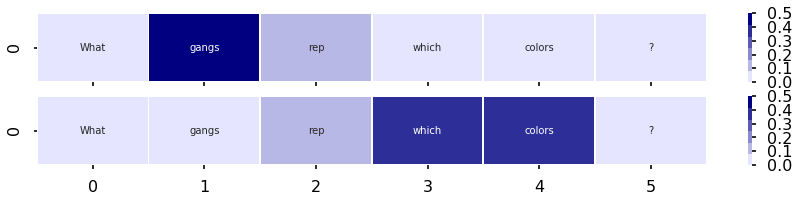

------------------------------
What is gravity ?
8


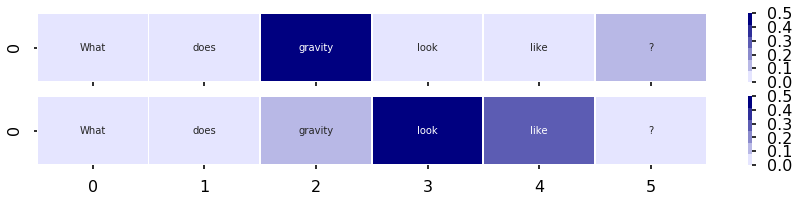

------------------------------
How is jQuery loaded ?
8


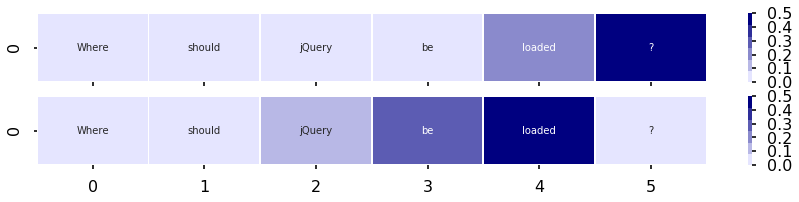

------------------------------
What should I do if I am bored in my marriage ?
8


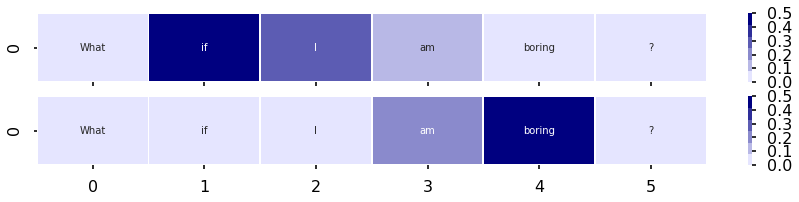

------------------------------
What major should I choose ?
8


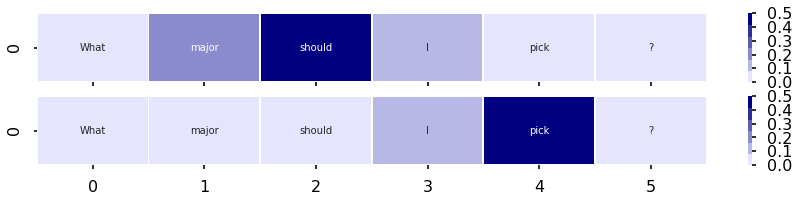

------------------------------
What is an invoice ?
8


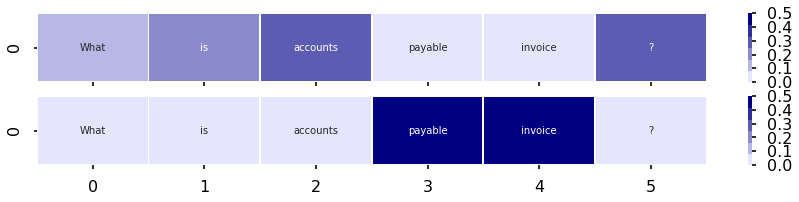

------------------------------
What hair colour is this ?
8


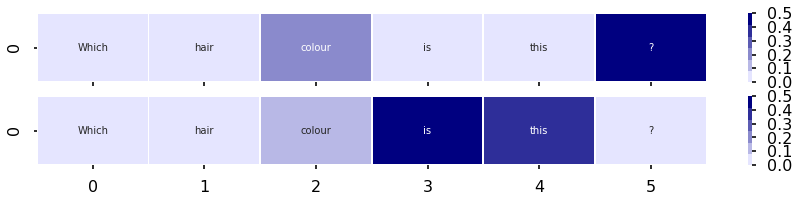

------------------------------
What are endangered species ?
8


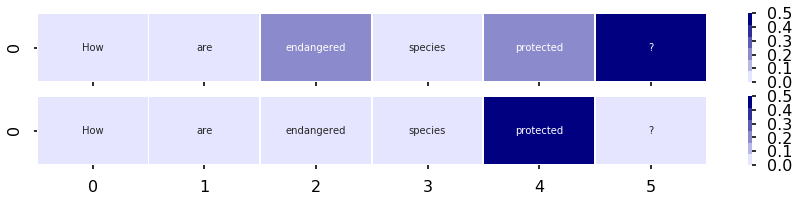

------------------------------
How can I quit Facebook ?
8


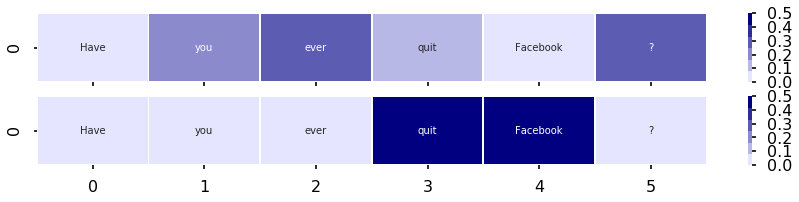

------------------------------
What is boring ?
8


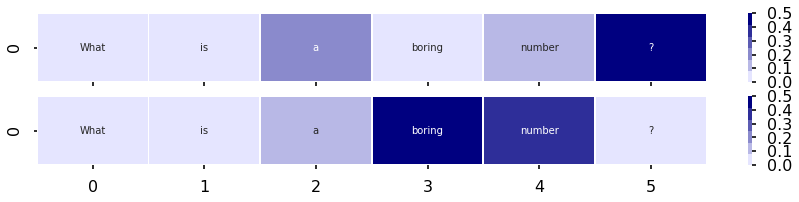

------------------------------
Is Arnab Goswami great ?
8


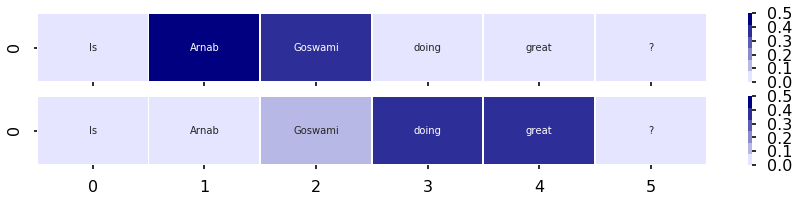

------------------------------
What is Stanford Football ranked ?
8


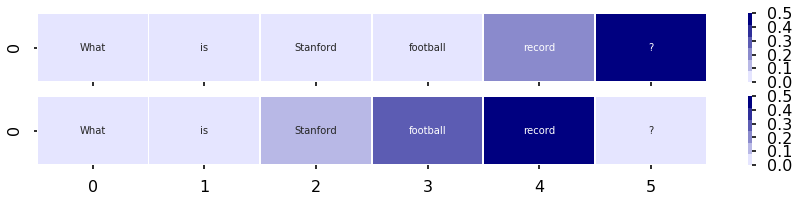

------------------------------
What is plane shear and plane strain condition ?
8


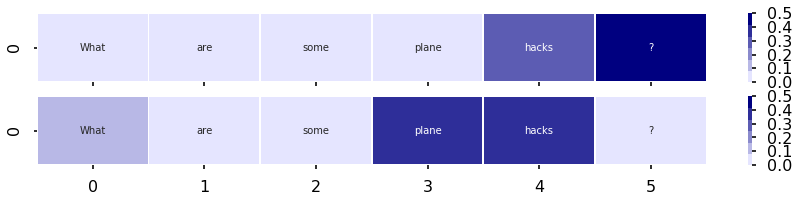

------------------------------
How is laser eye surgery done ?
8


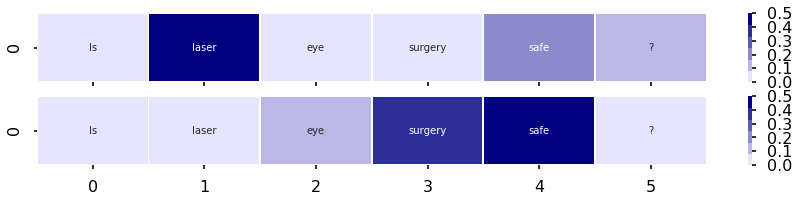

------------------------------
What is cognition ?
8


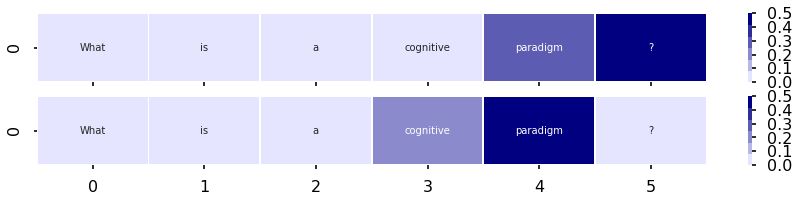

------------------------------
What is earth fault ?
8


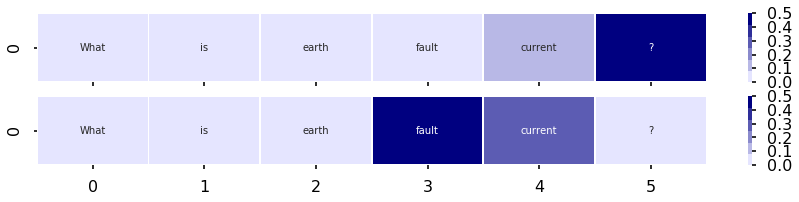

------------------------------
What is the future of search engine marketing ?
8


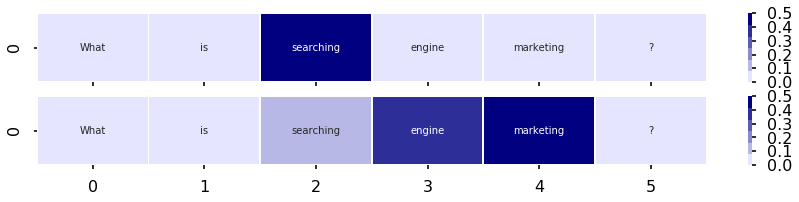

------------------------------
How can one meet Katrina Kaif ?
8


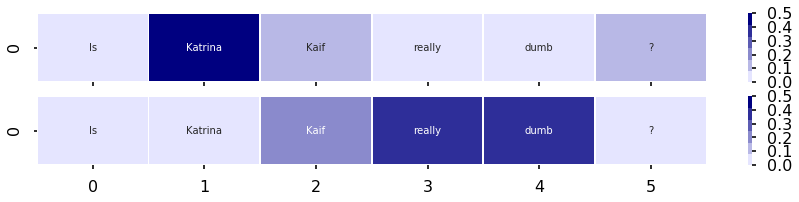

------------------------------
What is the best magazine in the US ?
8


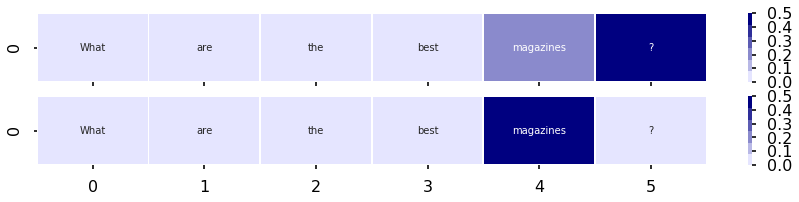

------------------------------
Who should use Quora ?
8


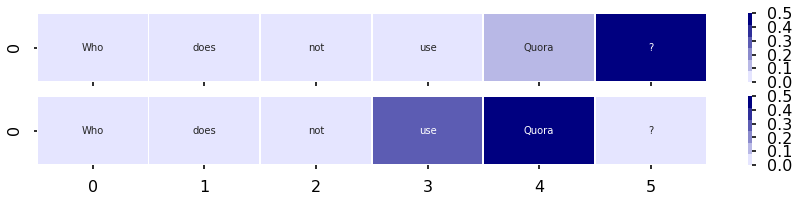

------------------------------
What should I do if I 'm bored in London ?
8


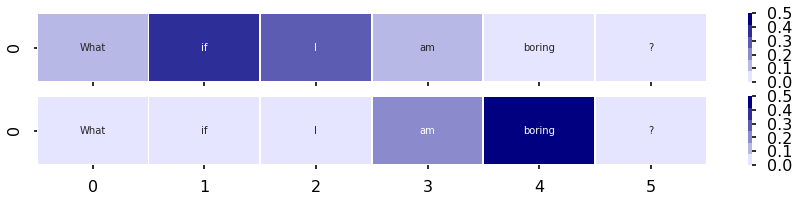

------------------------------
What is stamp fees ?
8


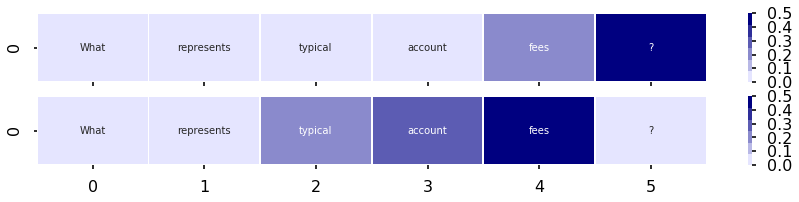

------------------------------
Does it hurt to donate plasma ?
8


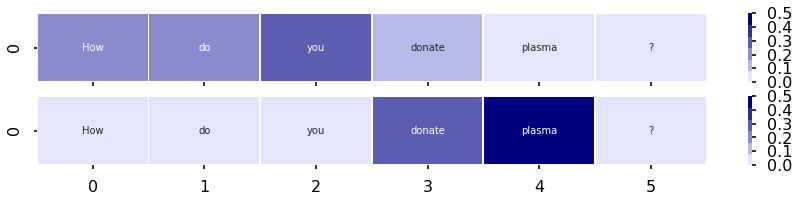

------------------------------
What is the outer event horizon ?
8


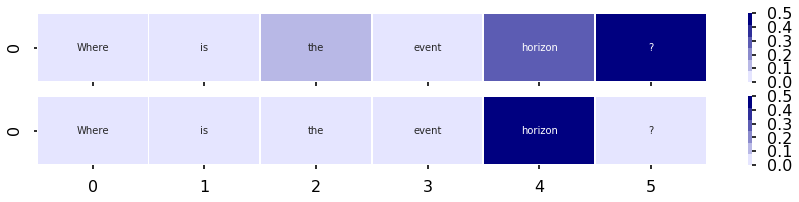

------------------------------
<UNK> is Barcelona ?
8


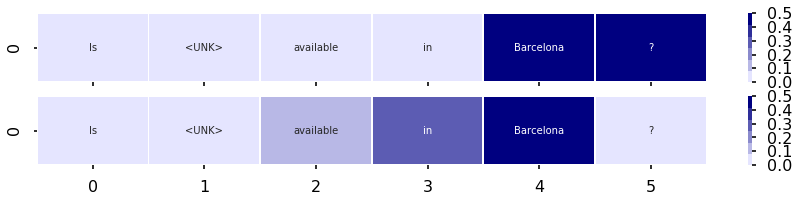

------------------------------
What 's it like to meet Eminem in person ?
8


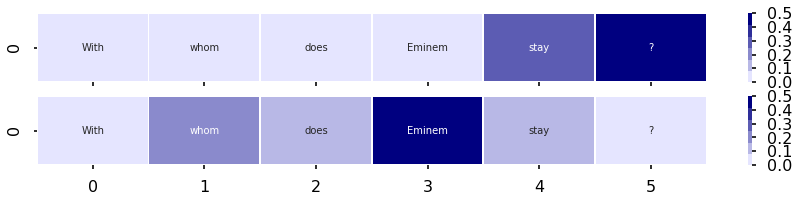

------------------------------
Where can I find my download torrent ?
8


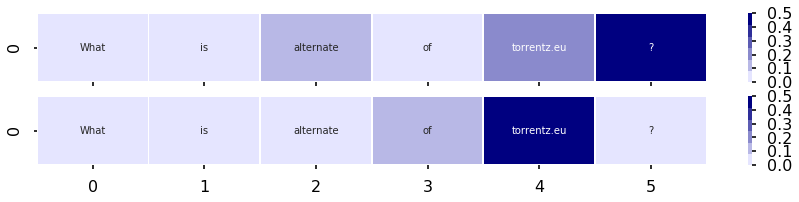

------------------------------
How can I get innovation ideas ?
8


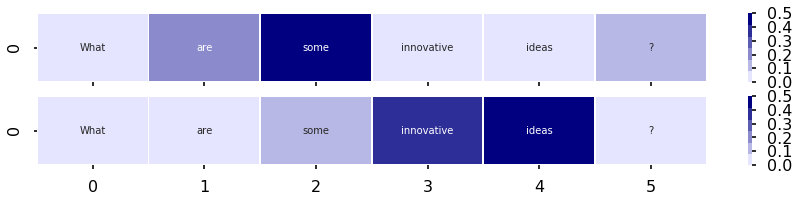

------------------------------
What is affirmative action ?
8


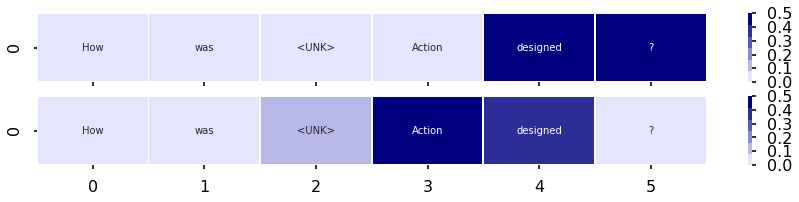

------------------------------
What is meant by a parallel circuit ? What are some examples ?
8


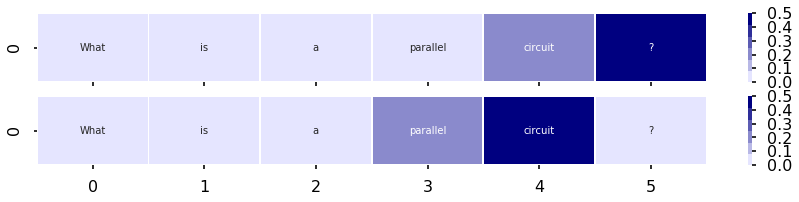

------------------------------
By mistake , I took antibiotics for 17 days , instead of prescribed 5 days . How much harm was done to my body ? Please give tips to reduce more harm .
8


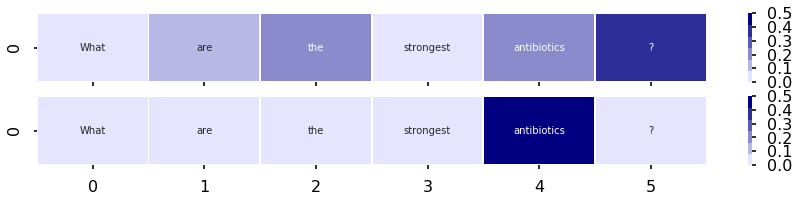

------------------------------
What celebrity do I look like ?
9


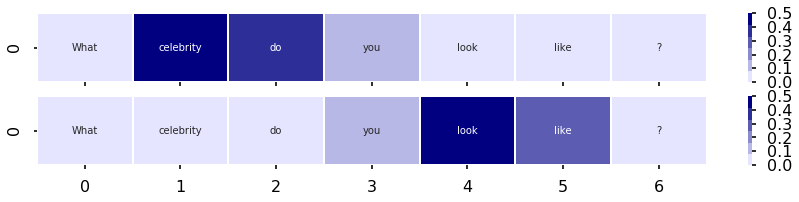

------------------------------
I have black money . What should I do now in India ?
9


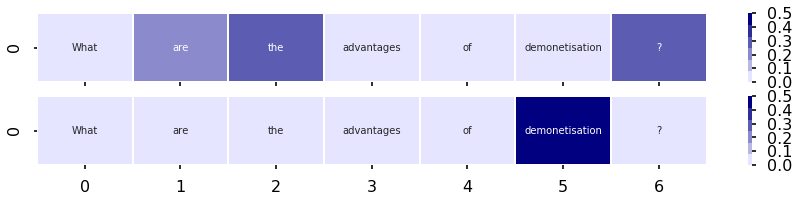

------------------------------
What are some natural ways to grow hair faster ?
9


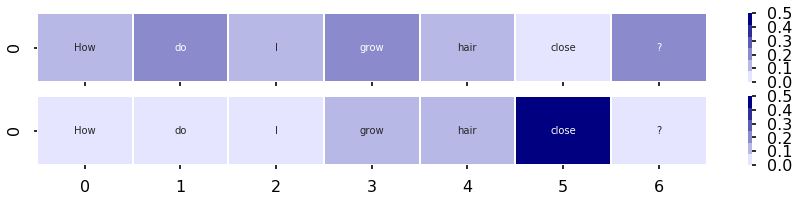

------------------------------
Should autism be cured ?
9


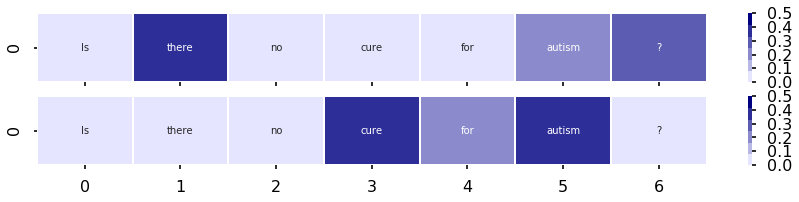

------------------------------
What is the <UNK> care package ?
9


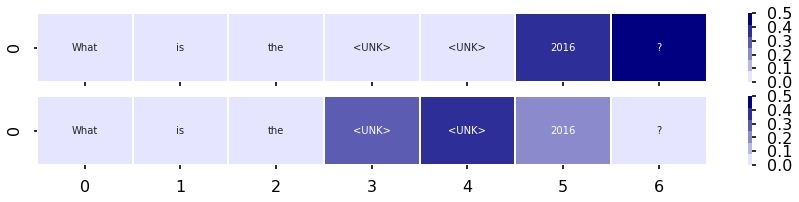

------------------------------
How do I jailbreak my iPhone ?
9


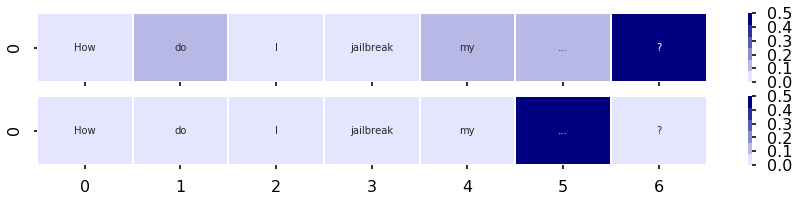

------------------------------
How are exit polls done ?
9


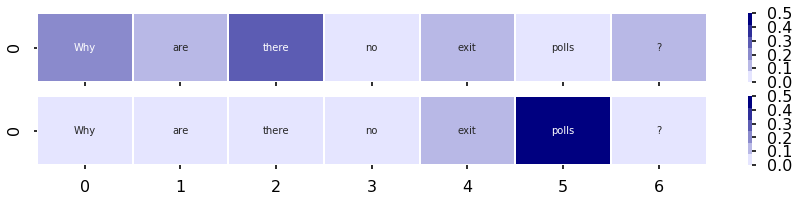

------------------------------
What are some good automotive hacks and tips ?
9


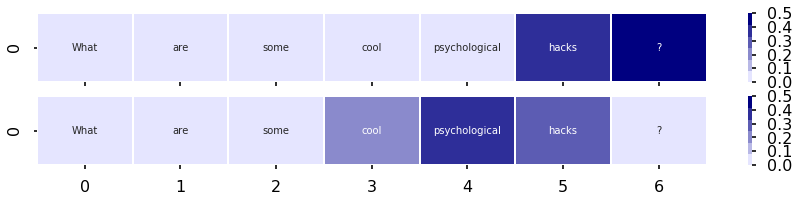

------------------------------
What will most likely cause World War III ?
9


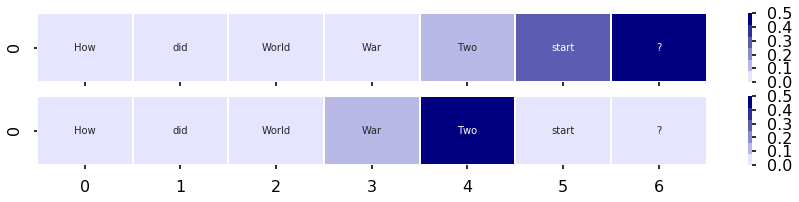

------------------------------
Where can I order checks online ?
9


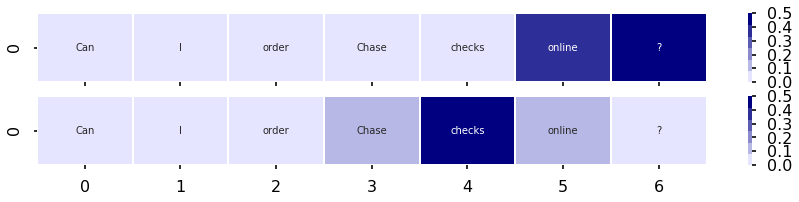

------------------------------
What is pKa value ?
9


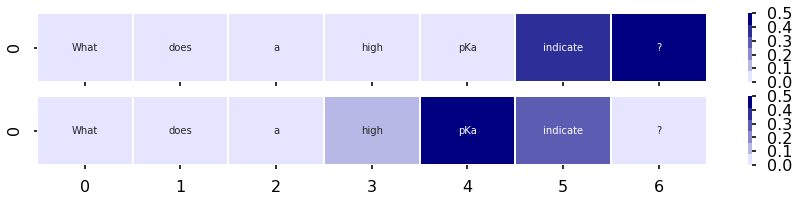

------------------------------
How do I hack a Tinder account ?
9


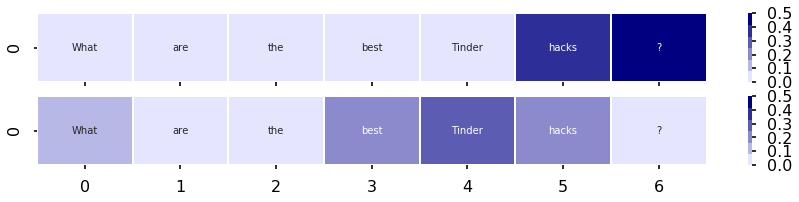

------------------------------
How harmful or unhealthy is masturbation ?
9


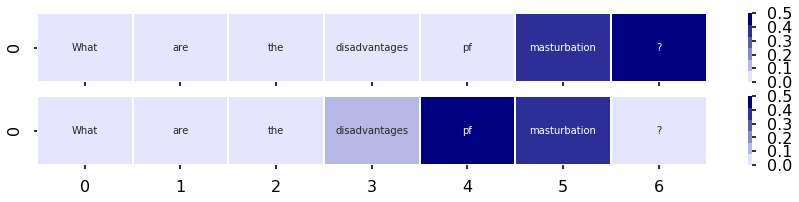

------------------------------
Why do we lose hope sometimes ?
9


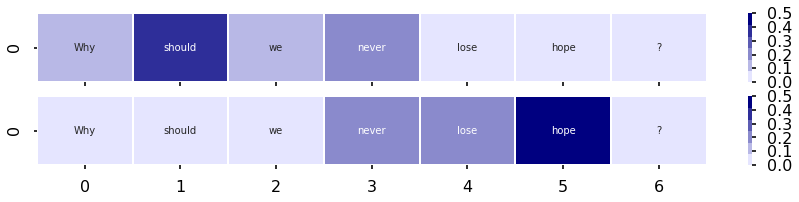

------------------------------
Where are period cramps located ?
9


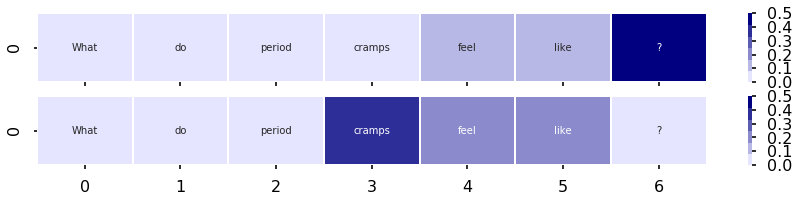

------------------------------
Are American cities still <UNK> ?
9


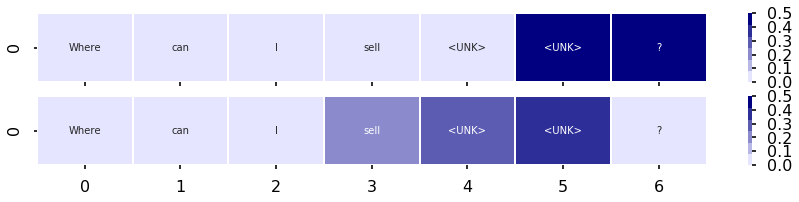

------------------------------
Why are some people so intimidated by programming ?
9


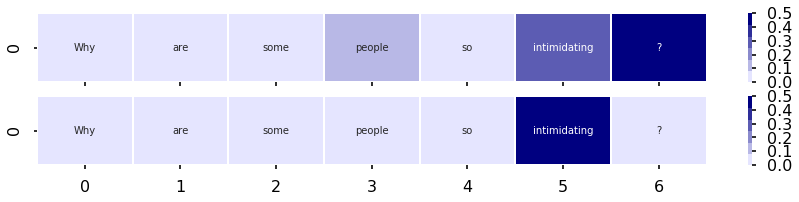

------------------------------
How do I not take something so seriously ?
9


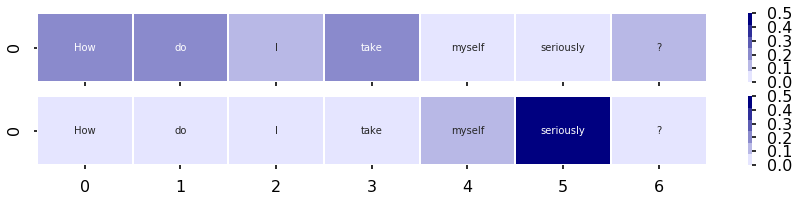

------------------------------
How has demonetization affected you ?
9


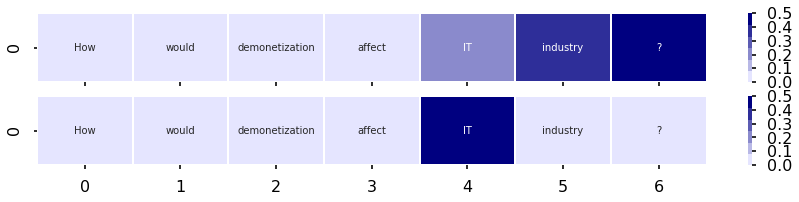

------------------------------
What is <UNK> ?
9


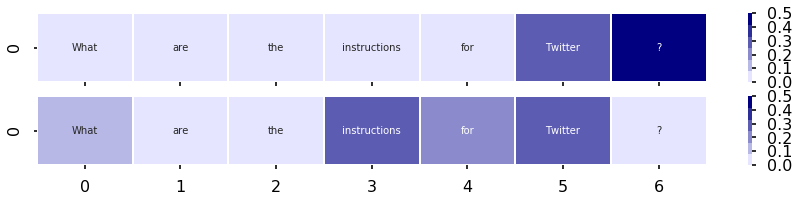

------------------------------
What are <UNK> 's best songs ?
9


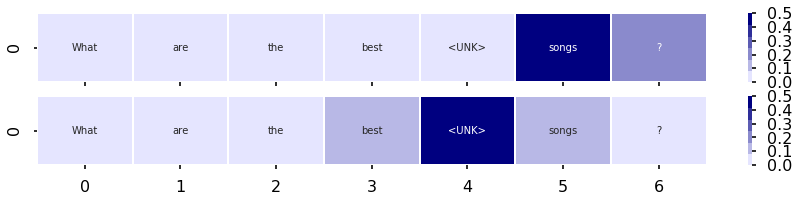

------------------------------
Can I buy a money order with a check ?
9


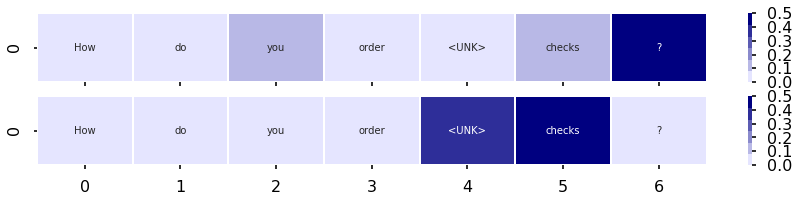

------------------------------
Where should I learn c ?
9


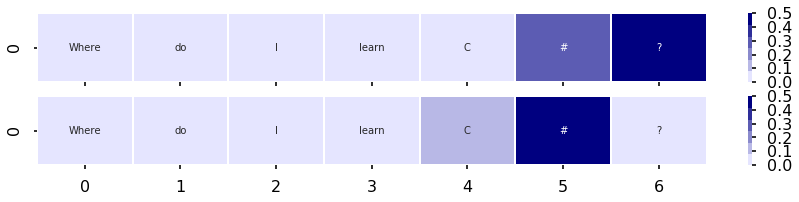

------------------------------
What are the latest trends in SEO ?
9


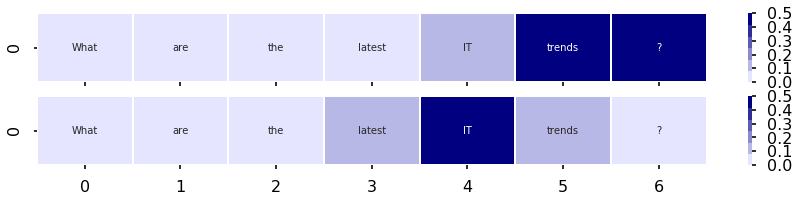

------------------------------
How much do NFL ball boys earn ?
9


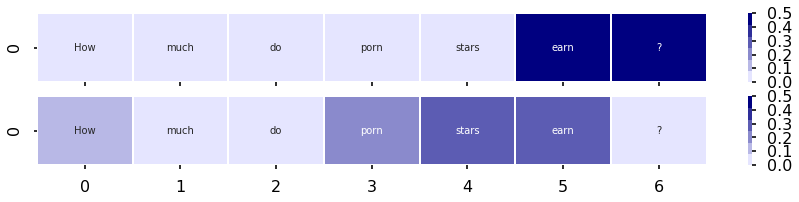

------------------------------
How do I jailbreak iOS 9.2.1 ?
9


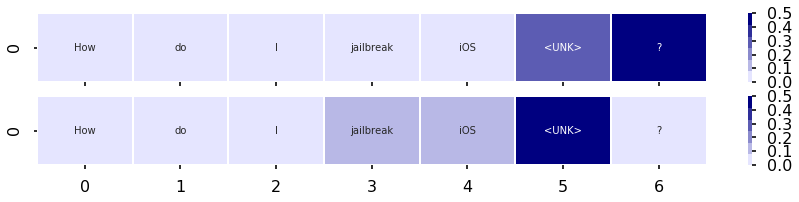

------------------------------
`` What is the meaning of `` '' what 's up '' '' ? ''
9


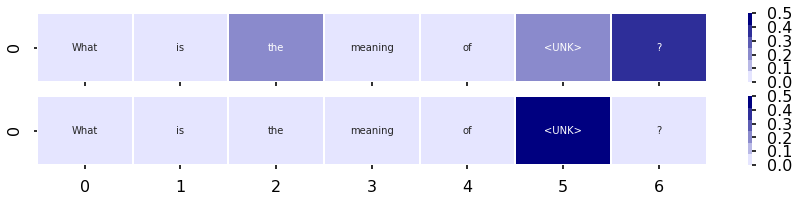

------------------------------
Why is it almost impossible to find a part-time software developer work ?
9


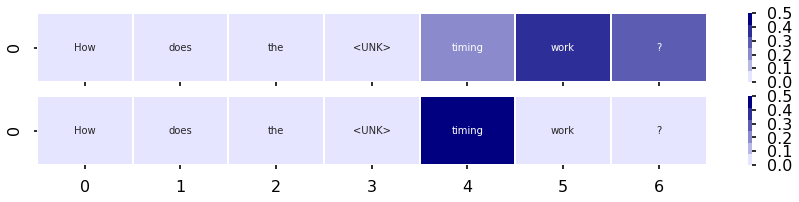

------------------------------
What do human resources managers do ?
9


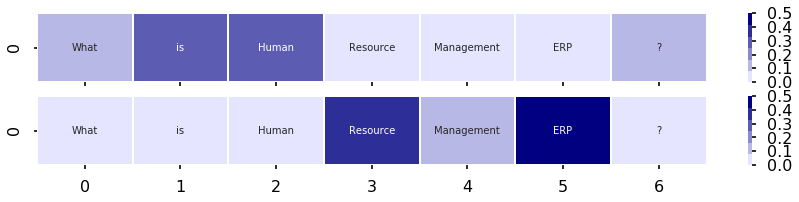

------------------------------
What are the best supplements ?
9


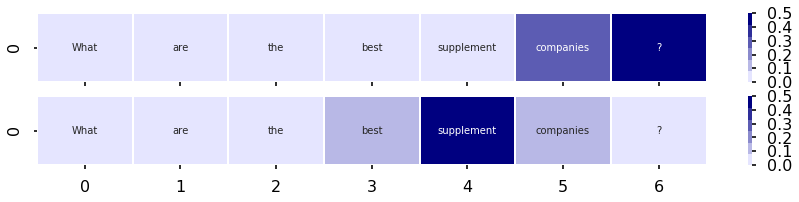

------------------------------
Cast can easy to get IAS ?
9


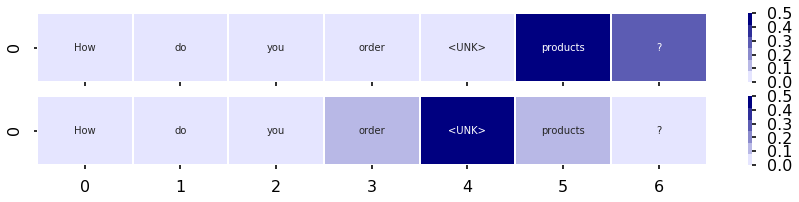

------------------------------
How do people use their Quora inbox ?
9


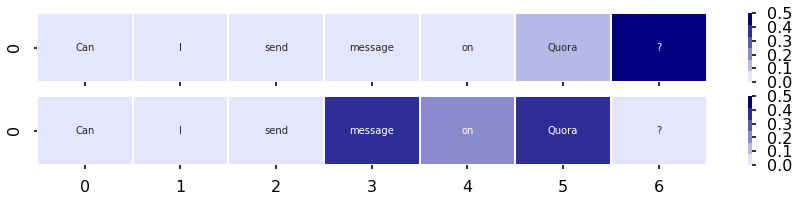

------------------------------
Which is the largest propeller plane ?
9


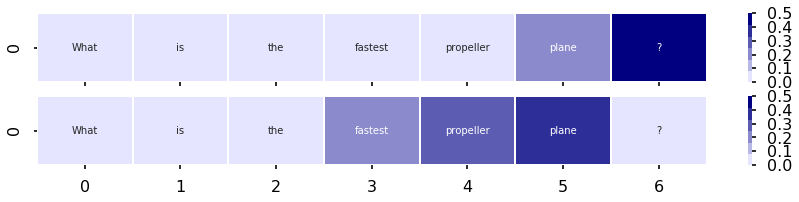

------------------------------
Did Bill Clinton vote for Hillary ?
9


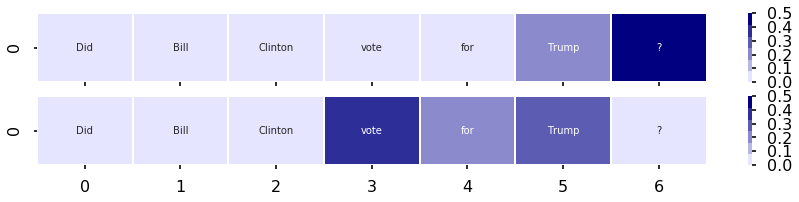

------------------------------
What is career counseling ?
9


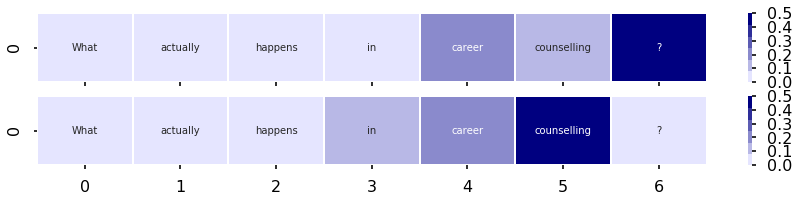

------------------------------
What is a venture capitalist ?
9


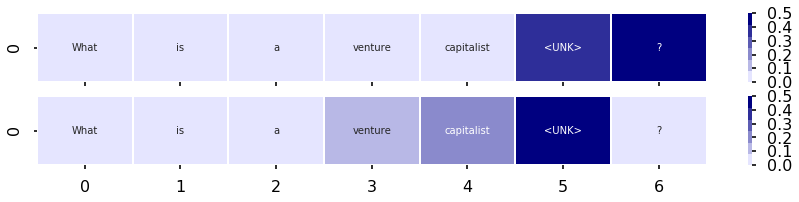

------------------------------
Where should I buy cheap products to resale ?
9


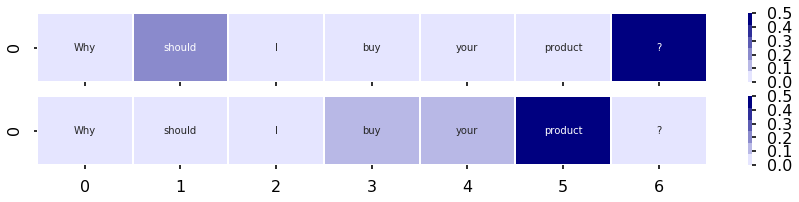

------------------------------
Who has played Pokémon GO ?
9


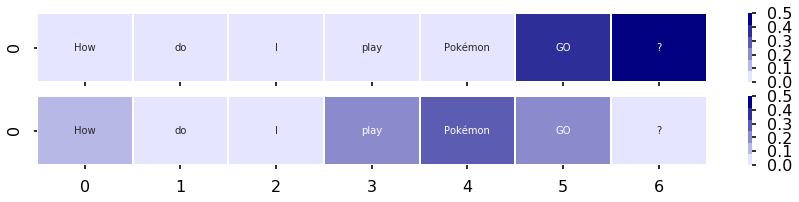

------------------------------
What is the meaning of meaning ?
9


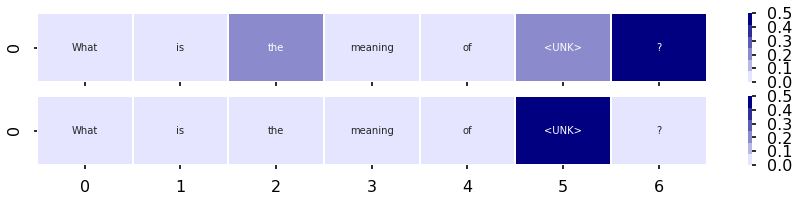

------------------------------
Should I buy an Apple watch ?
9


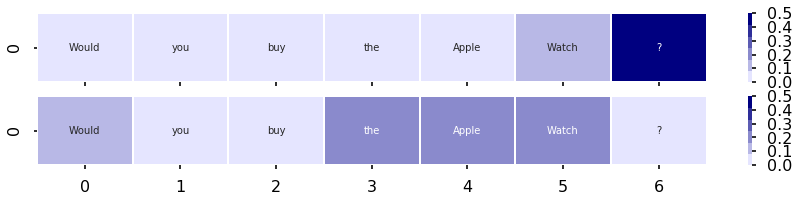

------------------------------
What type of insect is that ?
9


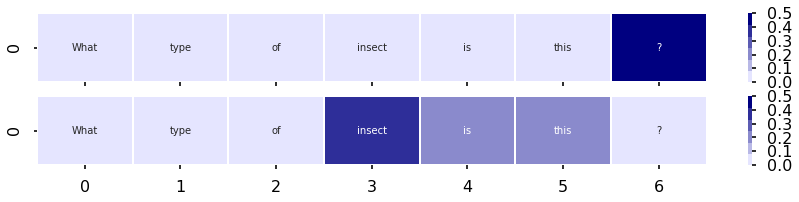

------------------------------
What are the main uses of graphite ?
9


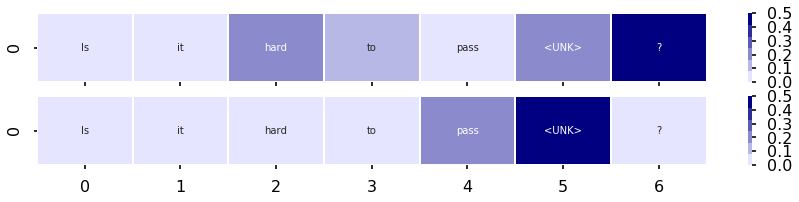

------------------------------
What are the best classes to take to improve your coding skills ?
9


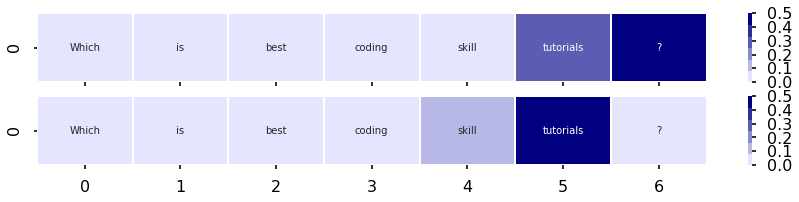

------------------------------
What is the meaning of ( Y ) ?
9


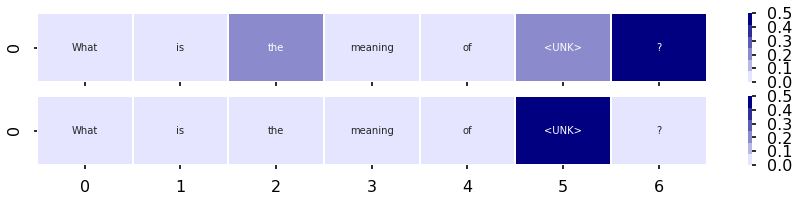

------------------------------
Why does my left side of my head keep twitching ? How can I stop it ?
9


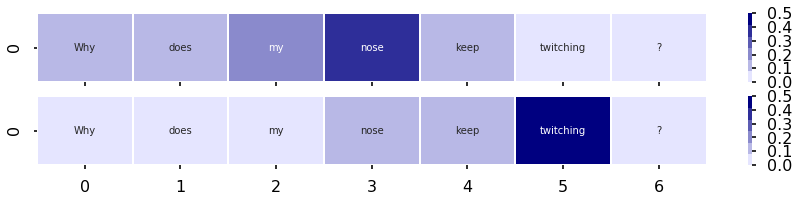

------------------------------
What causes wet dreams ?
9


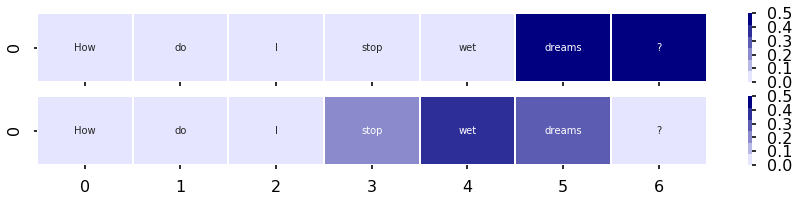

------------------------------
Can someone translate this one from Italian or Latin ?
9


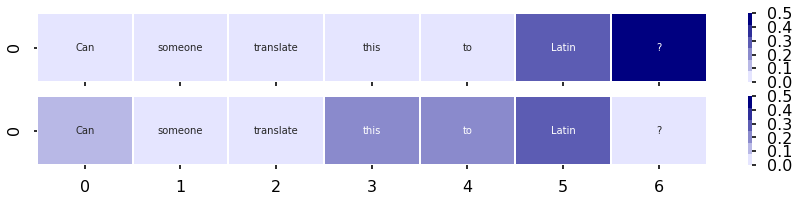

------------------------------
Can honey make you gain weight ?
9


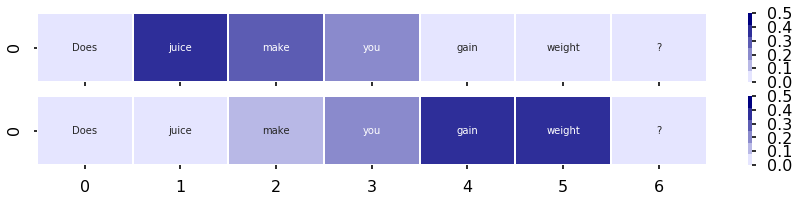

------------------------------
What can we include in a self introduction ?
9


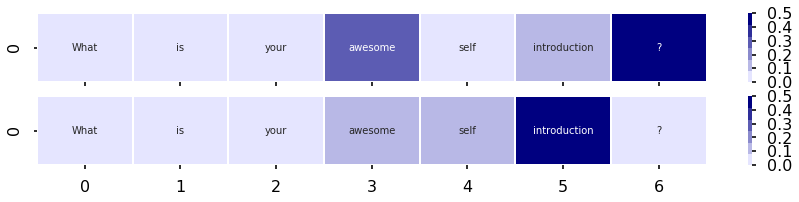

------------------------------
Is being tomboy a bad thing ?
9


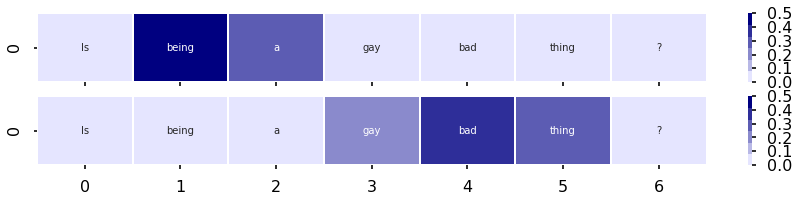

------------------------------
What is natural selection ?
9


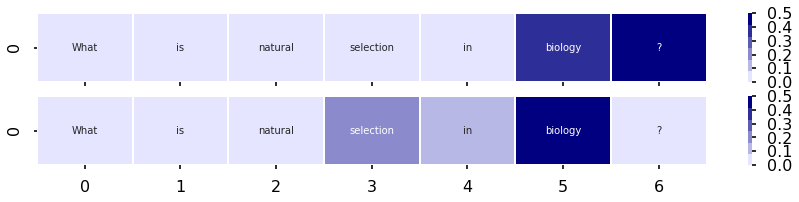

------------------------------
What are moving violations in Alabama ?
9


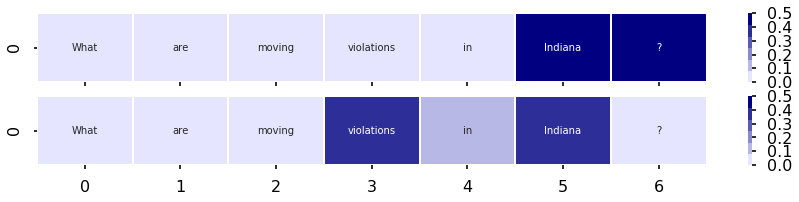

------------------------------
What 's the science behind fireworks ?
9


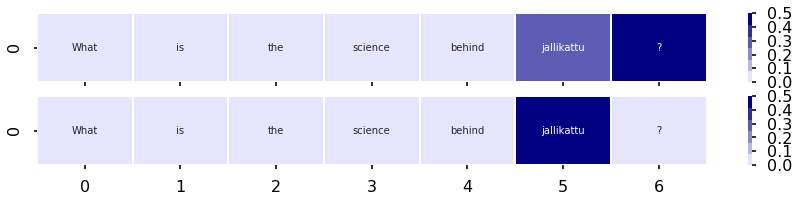

------------------------------
What 's an efficient way to overcome procrastination ?
9


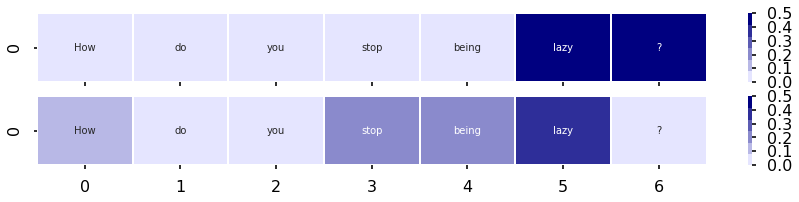

------------------------------
Is Donald Trump really sexist ?
9


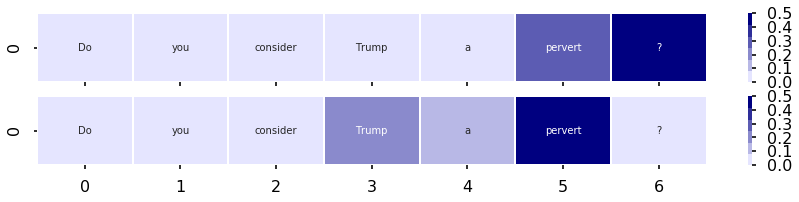

------------------------------
Was Reagan a bad president ? Why ?
9


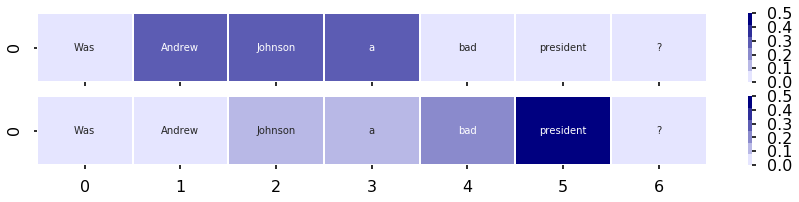

------------------------------
Which Emoji flag is used the least ?
9


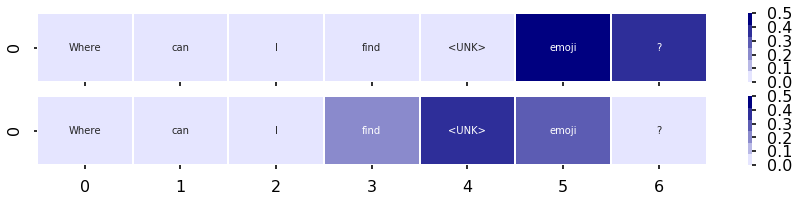

------------------------------
Where does Bashar Al Assad live ?
9


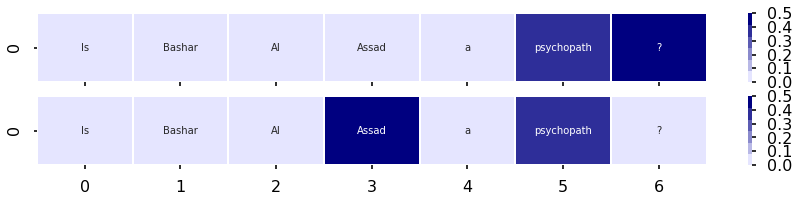

------------------------------
What is the best way to learn data warehousing ?
9


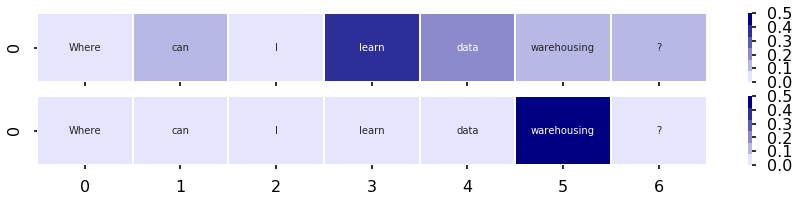

------------------------------
How did Donald Trump win the 2016 Presidential Election ?
9


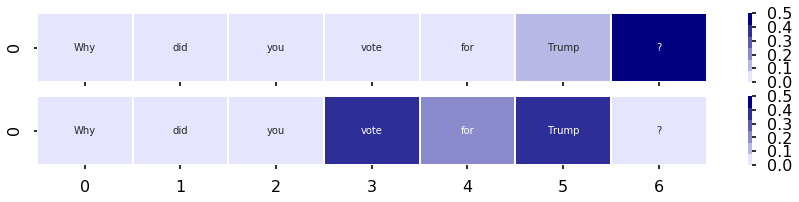

------------------------------
Is Instagram easily hacked ?
9


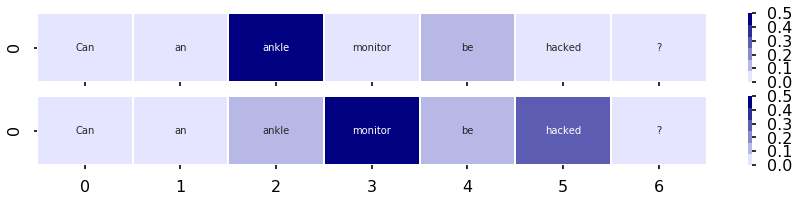

------------------------------
How do I find a good web hosting company ?
9


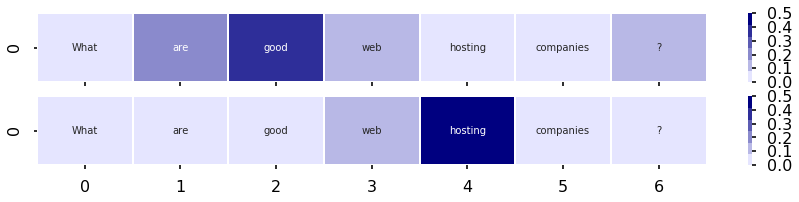

------------------------------
What does it mean to be prosperous ?
9


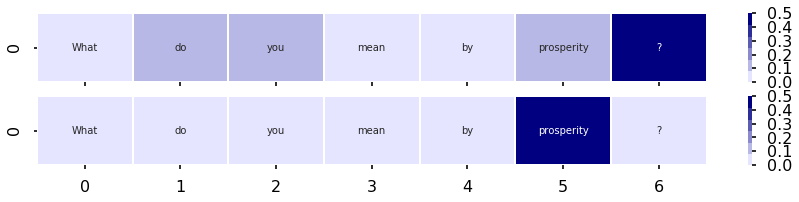

------------------------------
What is a metaphor ?
9


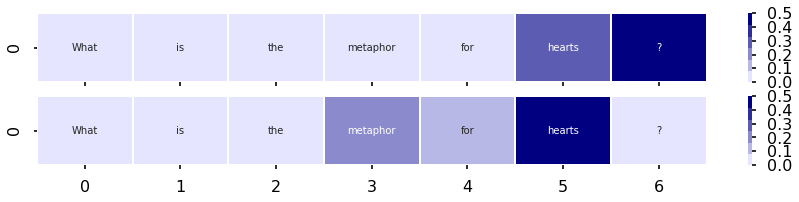

------------------------------
How does Elon Musk thrive on little sleep ?
9


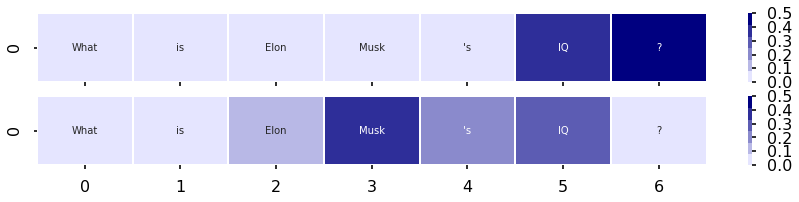

------------------------------
What is the meaning of meaning ?
9


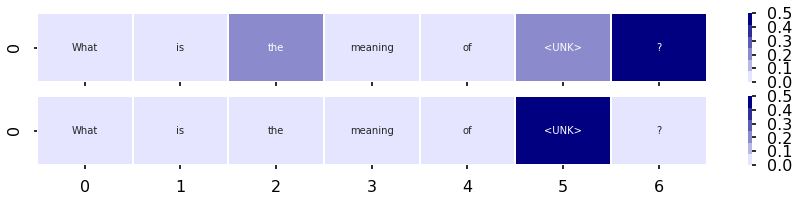

------------------------------
What is your goal ?
9


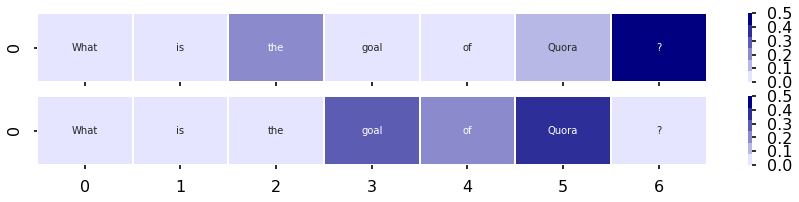

------------------------------
Is this quote given by Albert Einstein ? How will you elaborate this quote ?
10


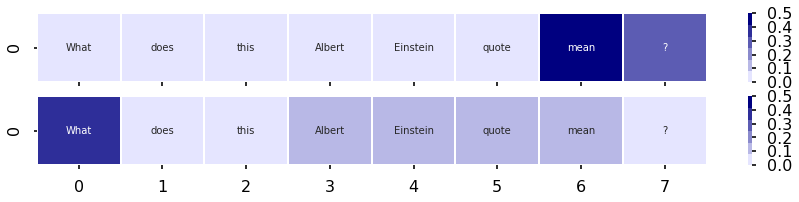

------------------------------
How much does meth cost ?
10


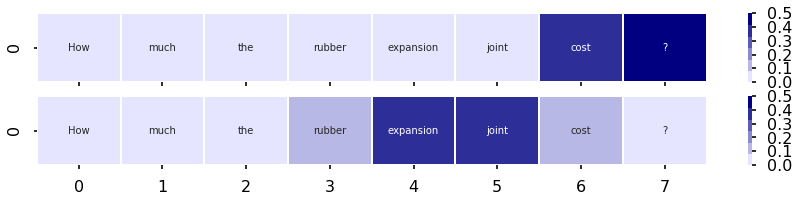

------------------------------
What are the best online jobs ?
10


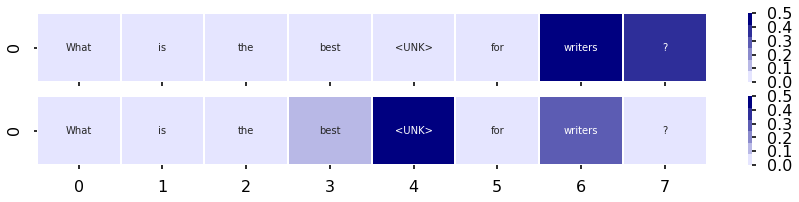

------------------------------
What is Best religion ?
10


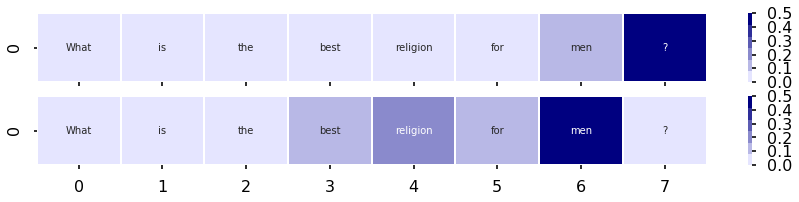

------------------------------
Has anyone tried <UNK> yet ?
10


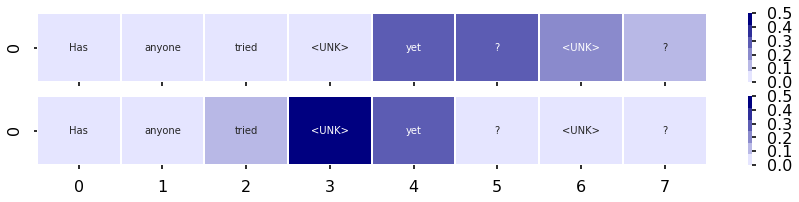

------------------------------
How do I lose weight in a month ?
10


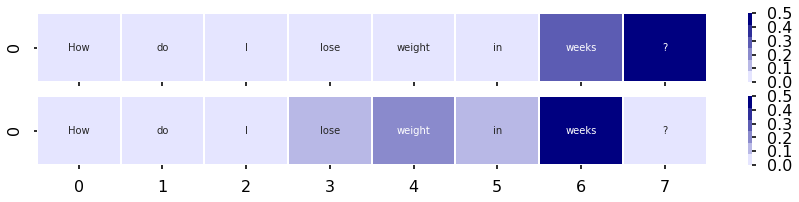

------------------------------
How do I retrieve deleted Snapchat messages ?
10


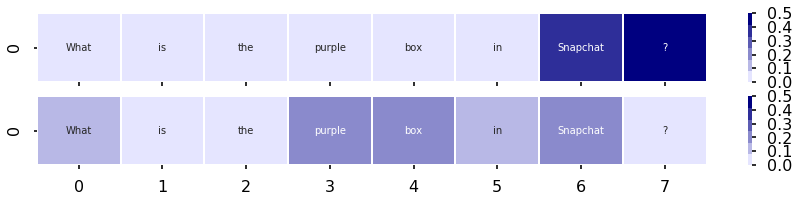

------------------------------
What are some of the best investment strategies ?
10


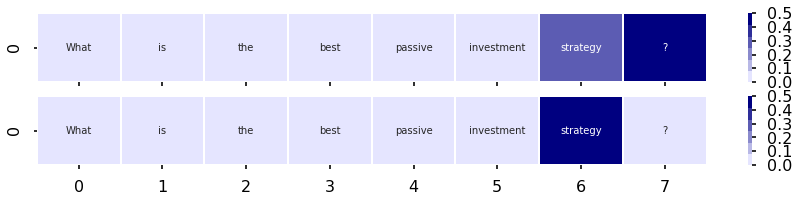

------------------------------
Where can I buy best designer party wear sarees online at reasonable prices ?
10


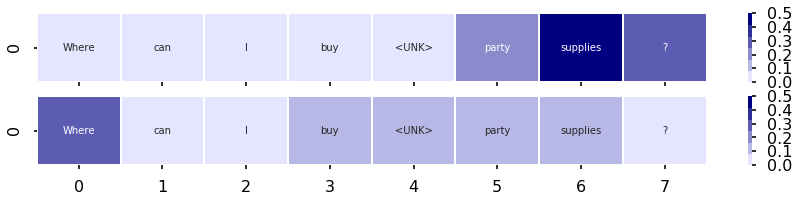

------------------------------
How does Alexa rank project work ?
10


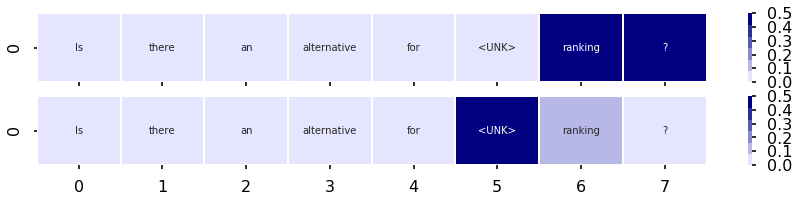

------------------------------
What are some good knowledge bases ?
10


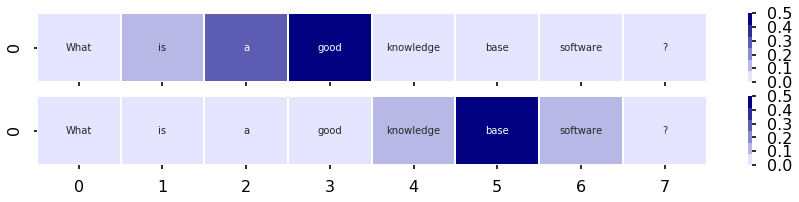

------------------------------
How is the square root calculated ?
10


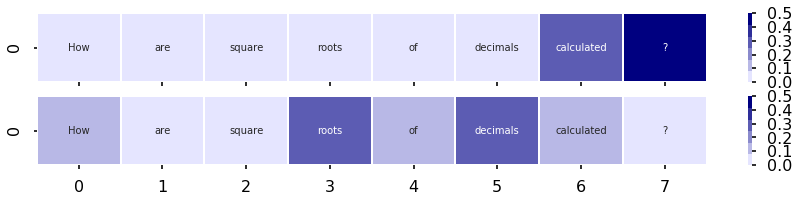

------------------------------
Which is your favorite Indian vegetarian dish ?
10


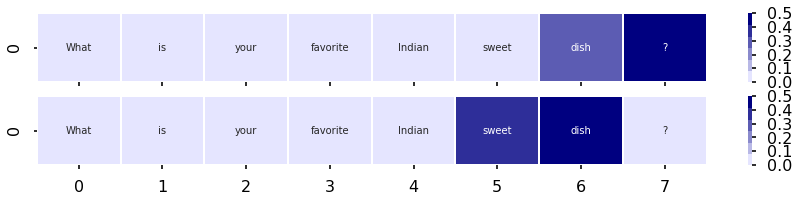

------------------------------
How do I make brownies ?
10


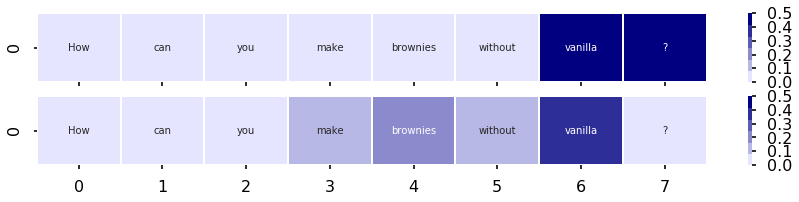

------------------------------
What are some home remedies for constipation ?
10


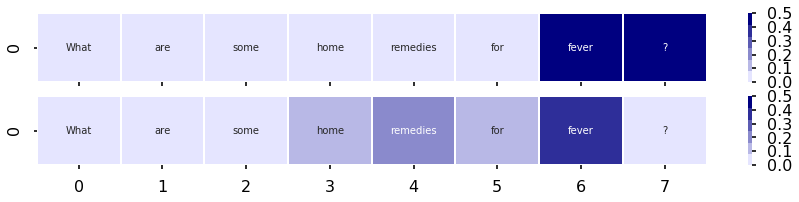

------------------------------
How can you learn teaching ?
10


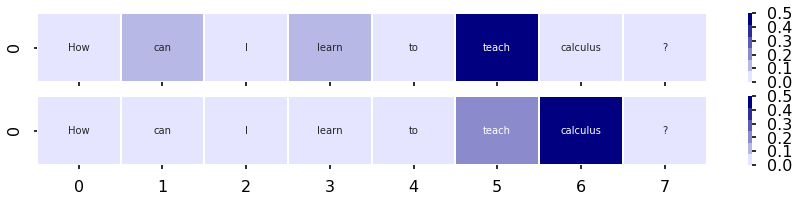

------------------------------
Can you get pregnant if you are a virgin ?
10


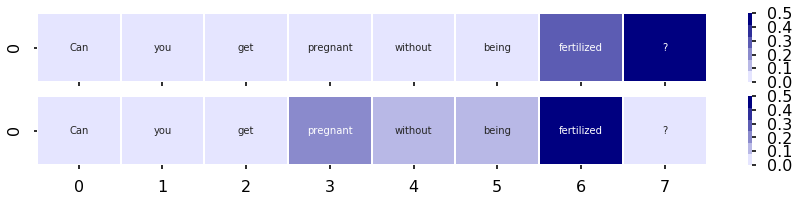

------------------------------
What is your dark side ?
10


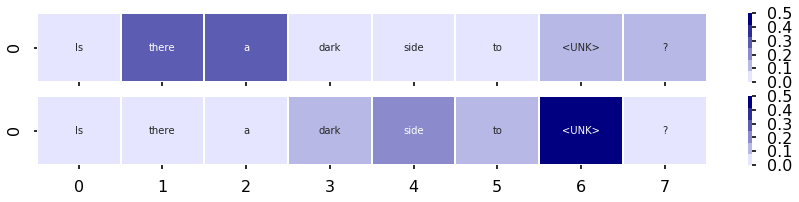

------------------------------
How is the Indian army the best way to serve the nation ?
10


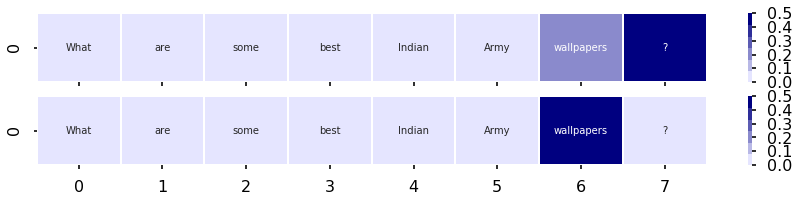

------------------------------
How are good company cultures created ?
10


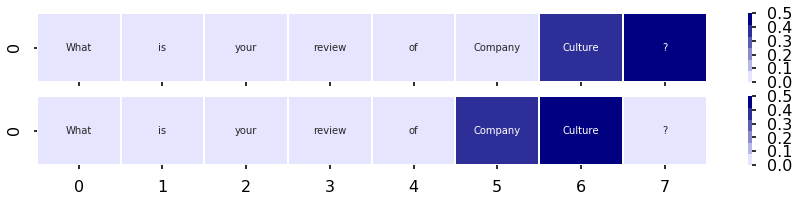

------------------------------
Which was the best Chinese dynasty , and why ?
10


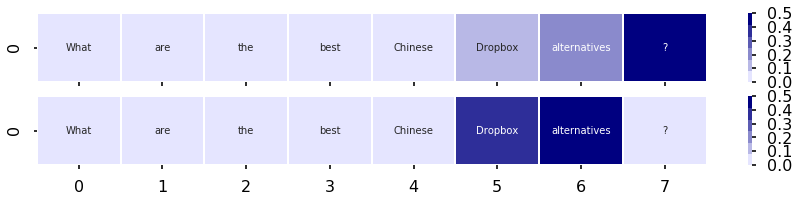

------------------------------
How do I create content ?
10


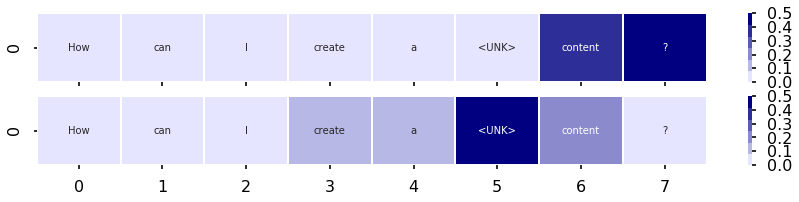

------------------------------
What format should a control account follow ? Why is this format better ?
10


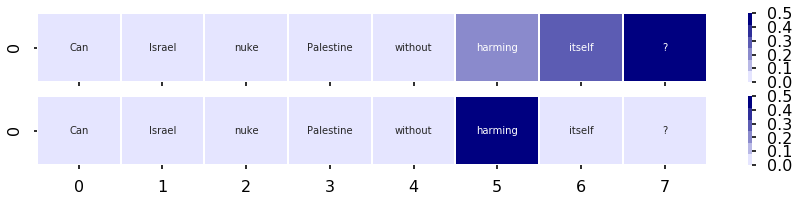

------------------------------
Why are resistors required in electronic circuits ?
10


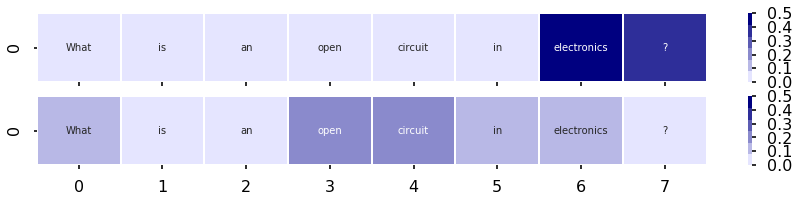

------------------------------
What would you do if your partner is anxious to meet your parents and refuses to stay with them ?
10


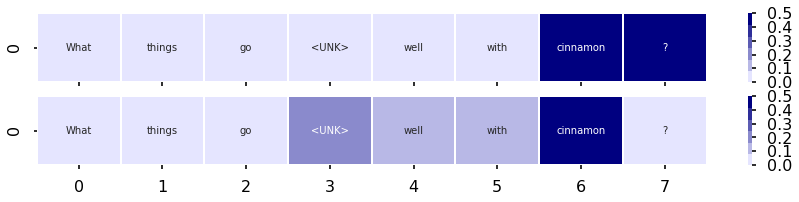

------------------------------
What is peripheral vision ?
10


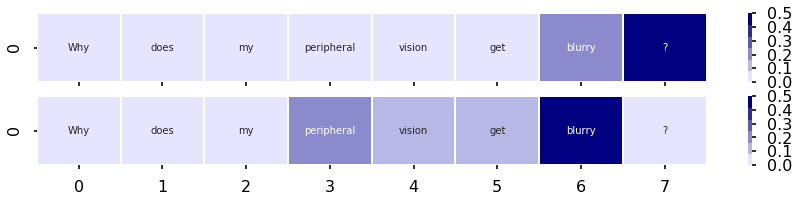

------------------------------
What is the best blog platforms ?
10


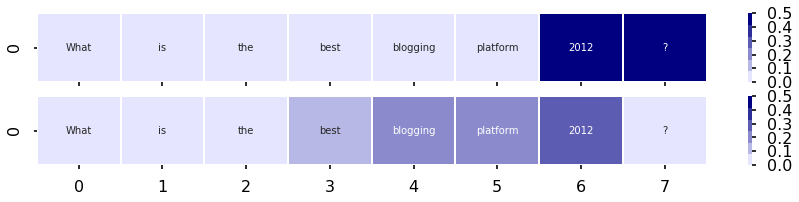

------------------------------
What can an OD of weed do to an <UNK> person ?
10


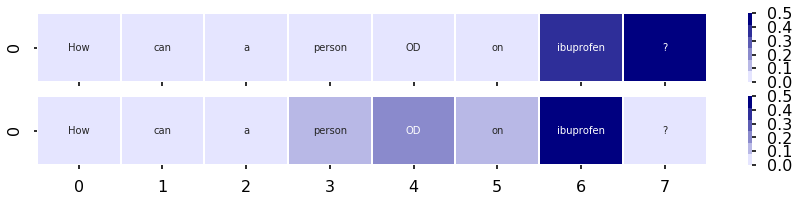

------------------------------
What is the best inspirational quote of all time ?
10


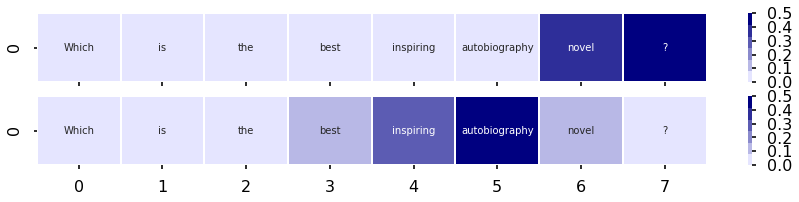

------------------------------
What are the top classifieds sites in Bolivia ?
10


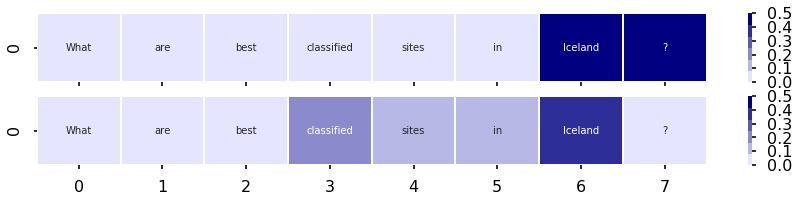

------------------------------
What is the best criticism of solipsism ?
10


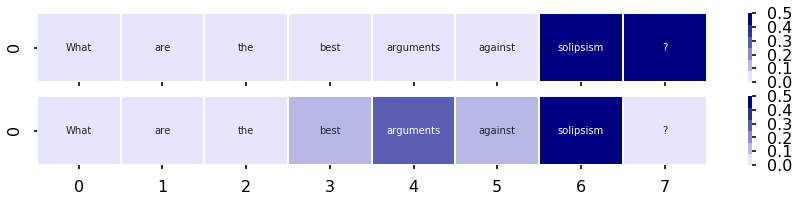

------------------------------
How do I look confident and professional ?
10


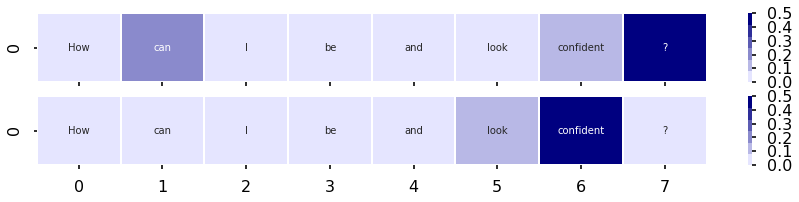

------------------------------
Why is Father 's Day important ?
10


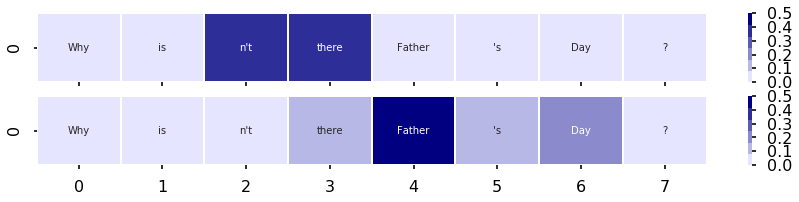

------------------------------
What are some good Irish songs ?
10


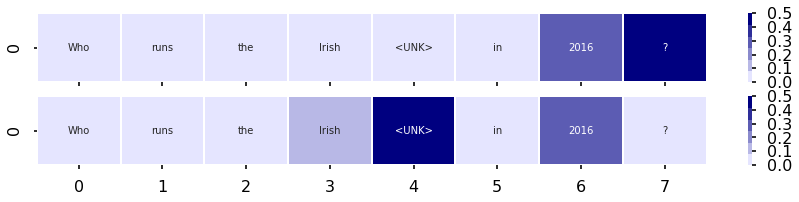

------------------------------
What is the significance of 11:11 ? Why do people talk about it ? What is the 11:11 concept ?
10


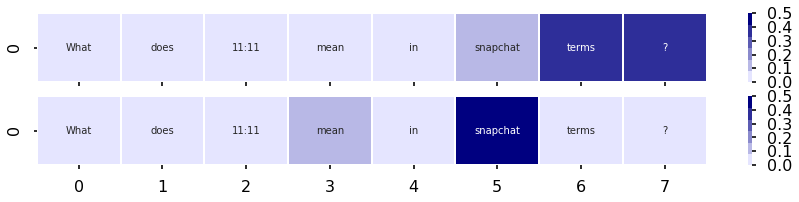

------------------------------
Why do Indian Girls watch less <UNK> and more Daily soaps ?
10


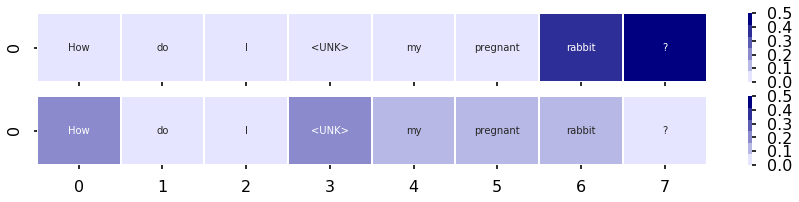

------------------------------
Is distilled water a mixture ? If so , why ?
10


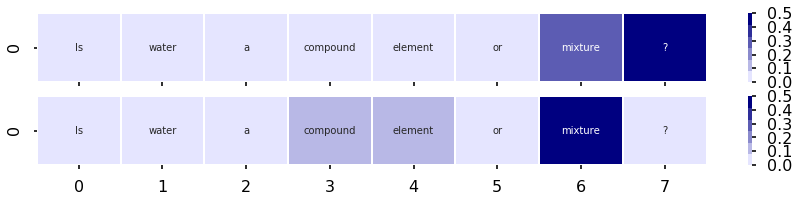

------------------------------
`` How do you spell `` '' Quora '' '' ? ''
10


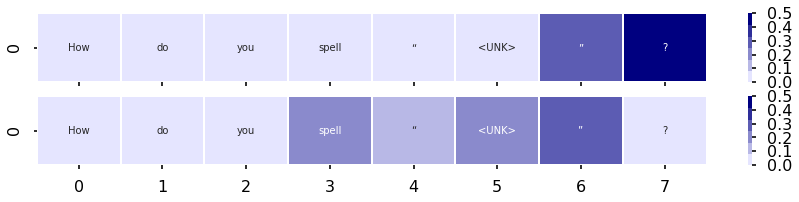

------------------------------
What are the most surreal places one can ever visit in India ?
10


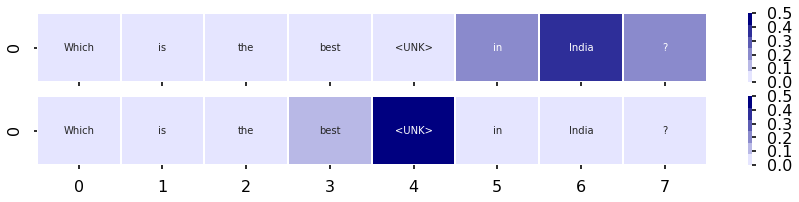

------------------------------
Is this a form of sexual abuse ?
10


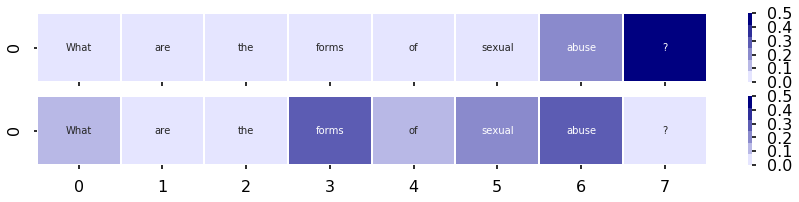

------------------------------
What 's the least painful way to die ?
10


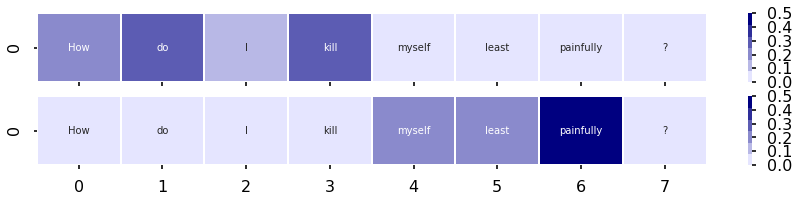

------------------------------
Are we in the age of Aquarius or the age of Pisces ?
10


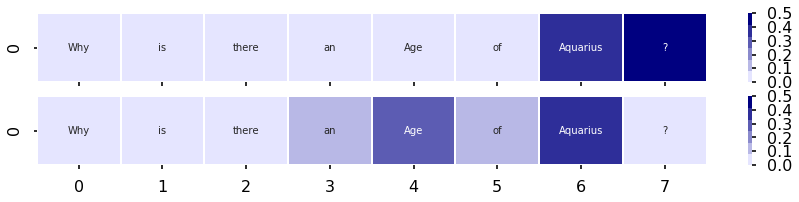

------------------------------
Where can I play badminton in Bangalore ?
10


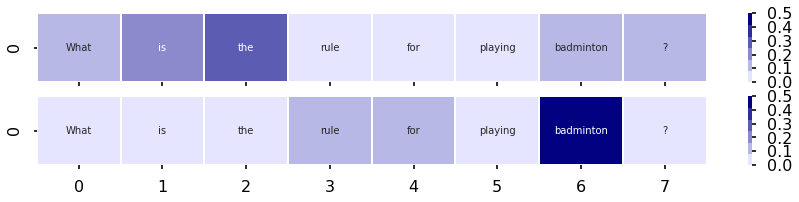

------------------------------
How many sub atomic particles are there in an atom ?
10


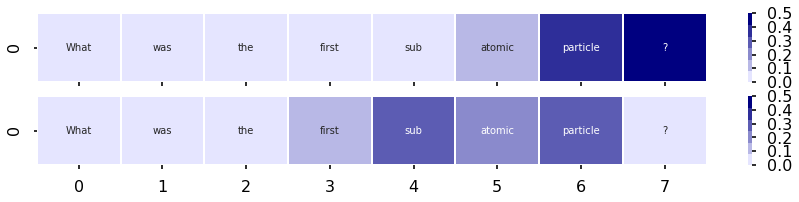

------------------------------
What is OYO Rooms ?
10


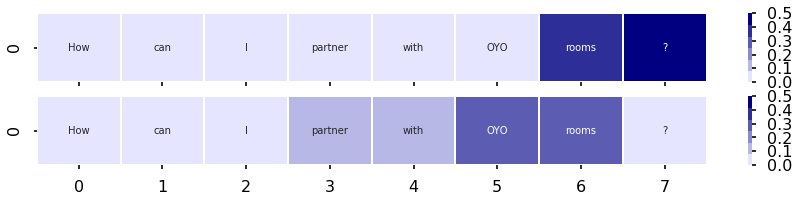

------------------------------
Should a 13 year old have sex ?
10


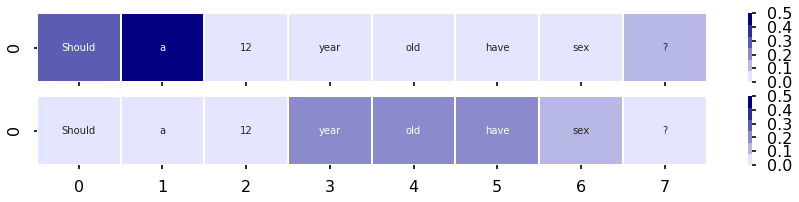

------------------------------
What is the Zomato business model ?
10


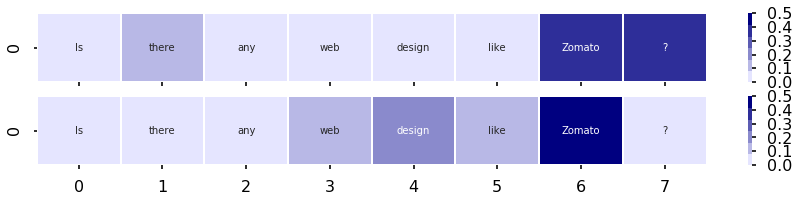

------------------------------
What are some of your recurring dreams ?
10


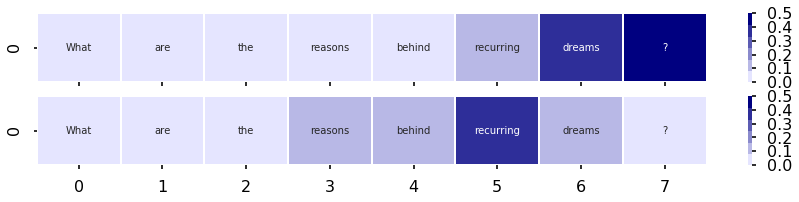

------------------------------
Should I jailbreak my iPhone 4 ?
10


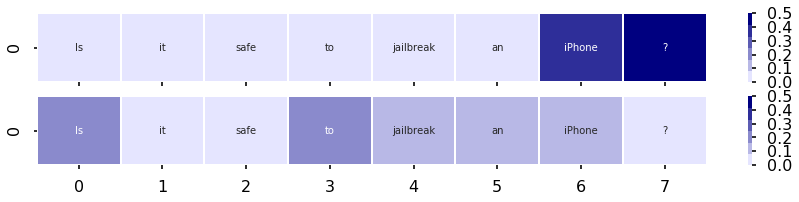

------------------------------
Who are some famous Navy SEALs ?
10


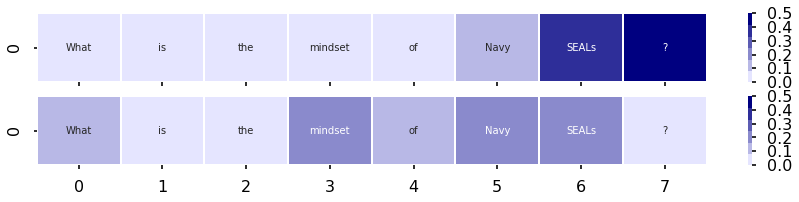

------------------------------
What are <UNK> nerves ?
10


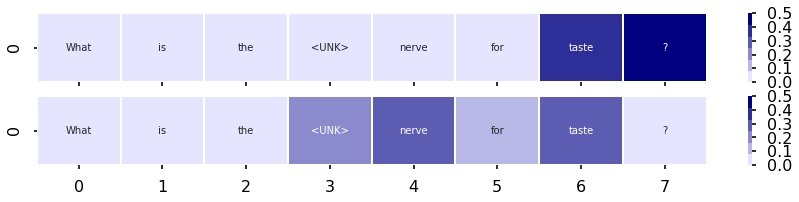

------------------------------
What do I do to crack the IIT exam ?
10


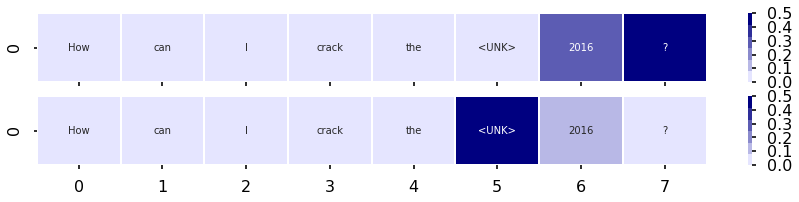

------------------------------
What is the proper pronunciation of the name <UNK> ?
10


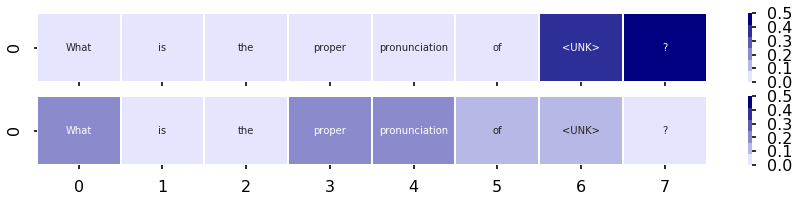

------------------------------
Is there any Ayurvedic treatment for jaundice ?
10


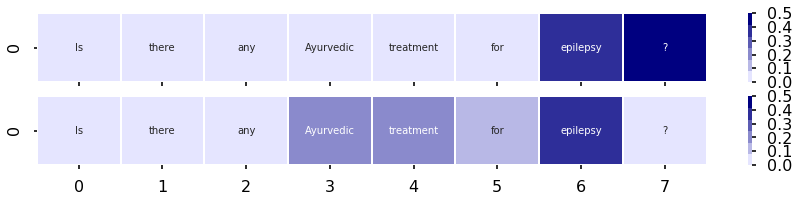

------------------------------
How do I get a job ?
10


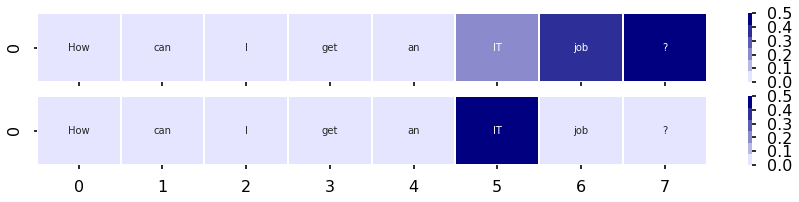

------------------------------
What is energy on an atomic level ?
10


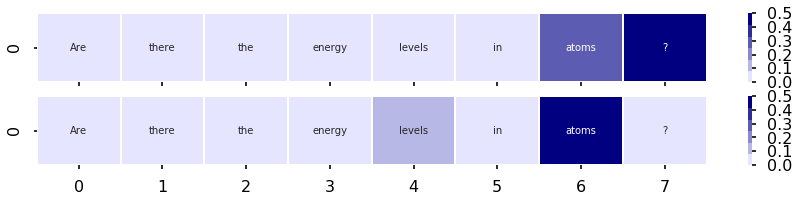

------------------------------
Can IAS officer go for vacation to abroad ?
10


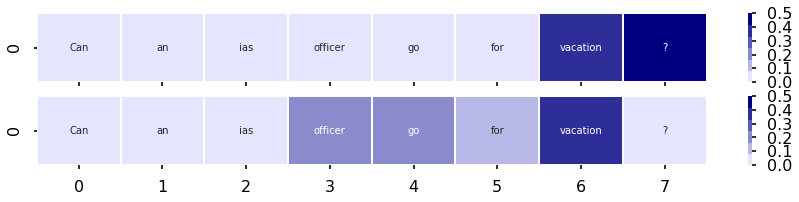

------------------------------
Can I watch anime ?
10


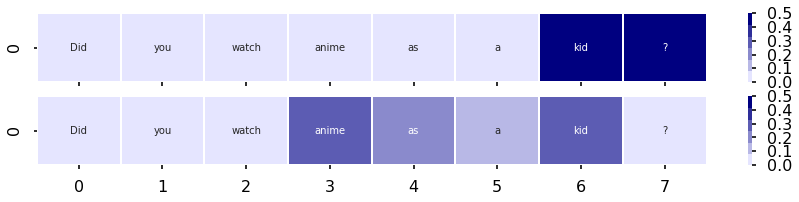

------------------------------
How do I retrieve deleted voice mail messages ?
10


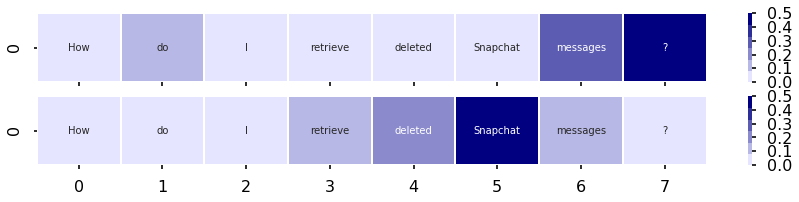

------------------------------
Can I use a gel pen in The ICSE exams 2016 ?
10


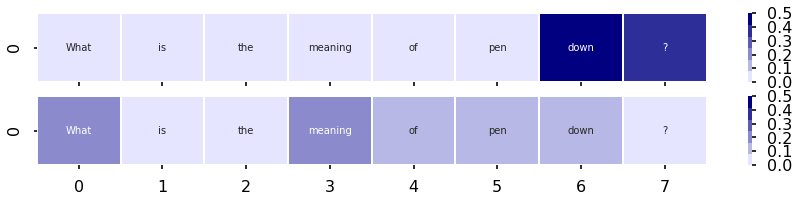

------------------------------
Can one have two different colds at the same time ?
10


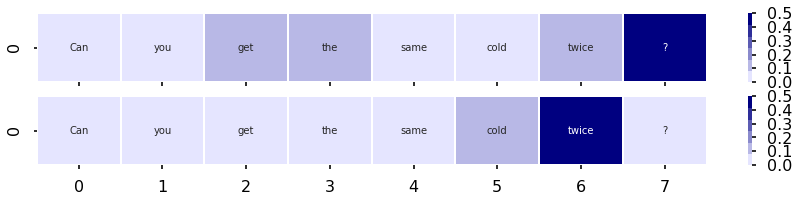

------------------------------
Which is the best web hosting ?
10


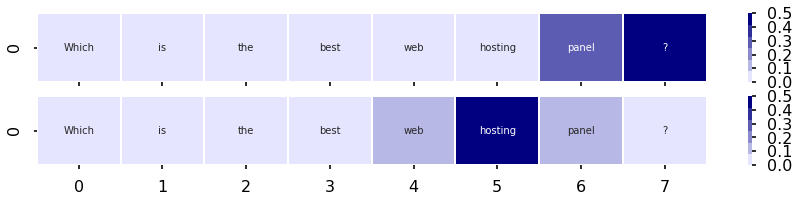

------------------------------
How do you donate sperm ?
10


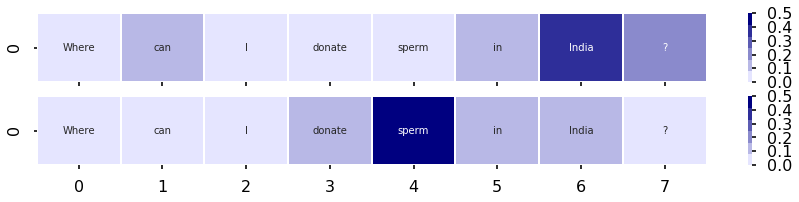

------------------------------
What are typed language ?
10


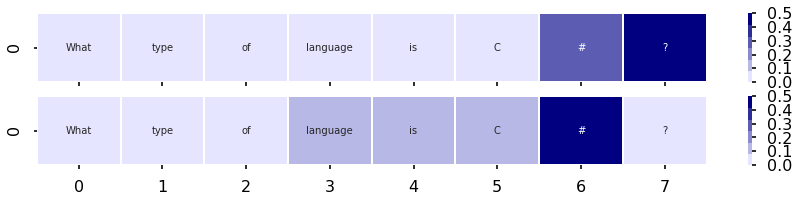

------------------------------
Examples for <UNK> signal and power signal in real life ?
10


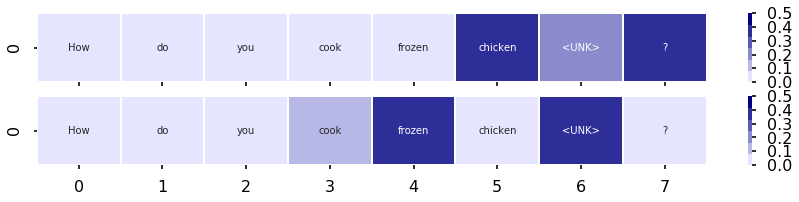

------------------------------
How does LIC get income ?
10


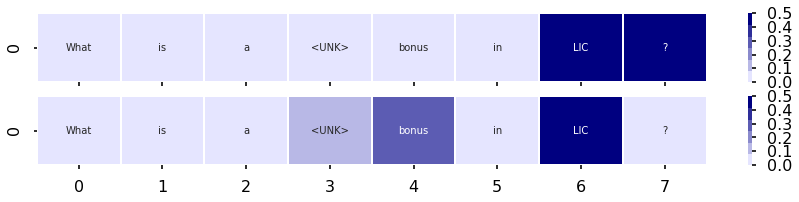

------------------------------
Who has the world 's most beautiful face ?
10


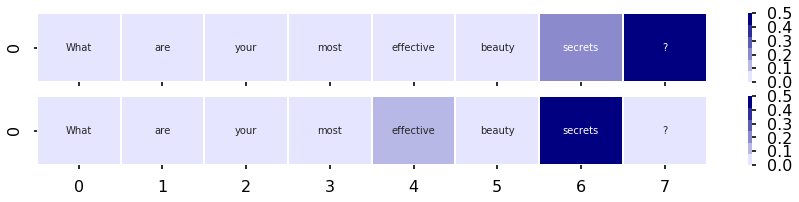

------------------------------
Why am I so good-looking ?
10


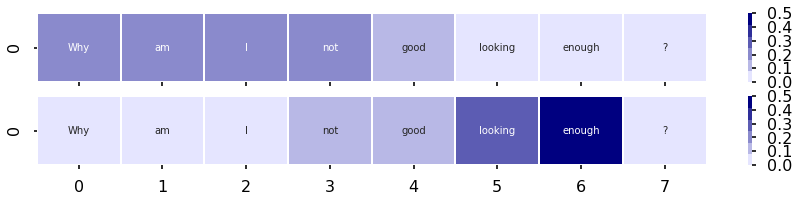

------------------------------
What are the branches and related fields of psychology ? What do they do and what are some examples ?
10


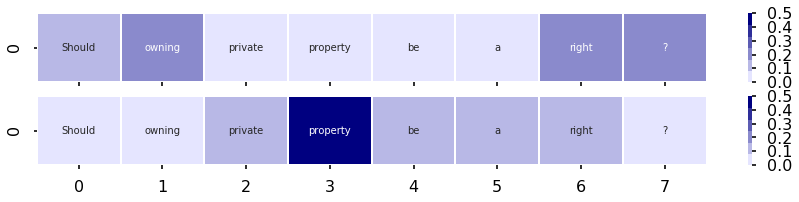

------------------------------
What happens if my dog eats a tomato ?
10


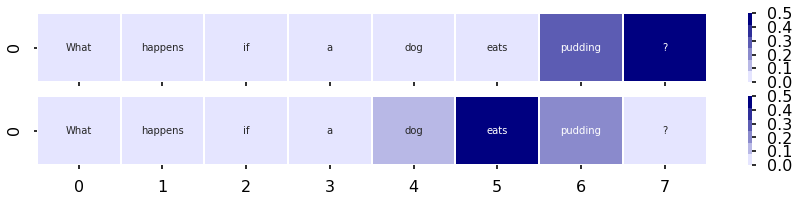

------------------------------
What is the best line from a Bollywood song ?
10


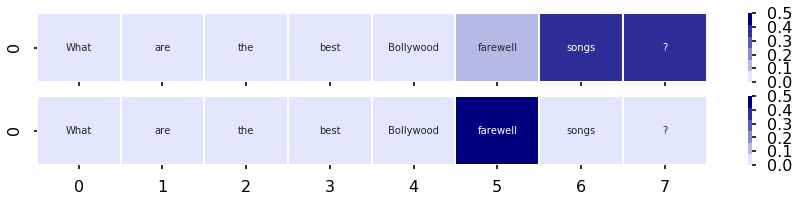

------------------------------
Cropping saved pngs
Done cropping


In [10]:
output1 = get_outputs(base_dir1)
output2 = get_outputs(base_dir1)
output3 = get_outputs(base_dir3)


count = print_attention(output1,output2, output3, max=250, plot=True, output_filter=0, jsd_thresh=0.3)


Where in India does KFC get the chickens ? Are they haram or halal ?
6


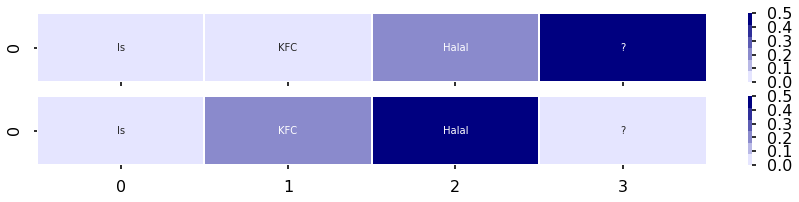

------------------------------
Do real hackers exist ?
6


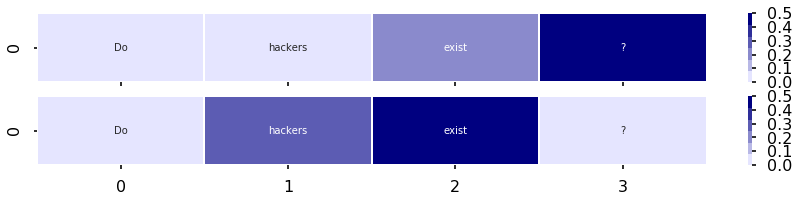

------------------------------
Is WW3 coming ?
6


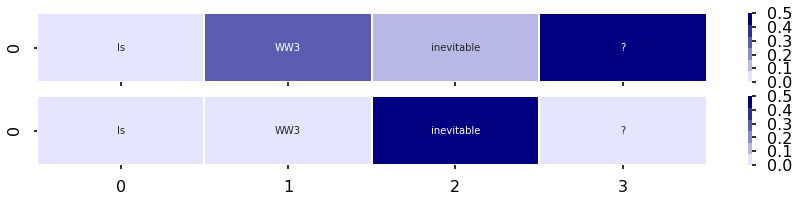

------------------------------
How do I get my Skype pass back if I forgot it ?
6


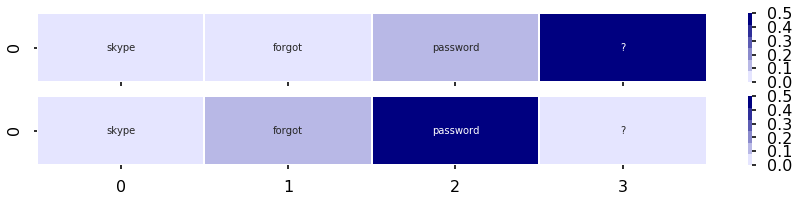

------------------------------
Who are the founders of Quora ?
6


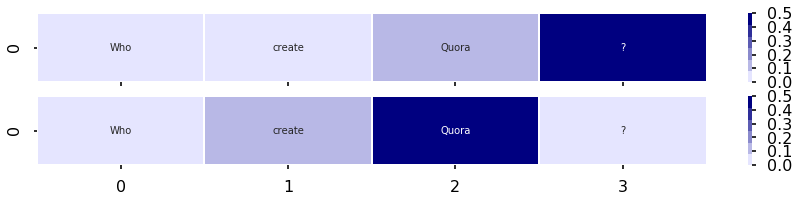

------------------------------
Do you think Trump could win the presidency ?
6


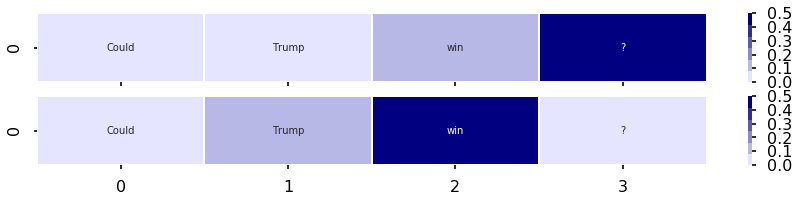

------------------------------
Is fighting in wwe real or fake ?
6


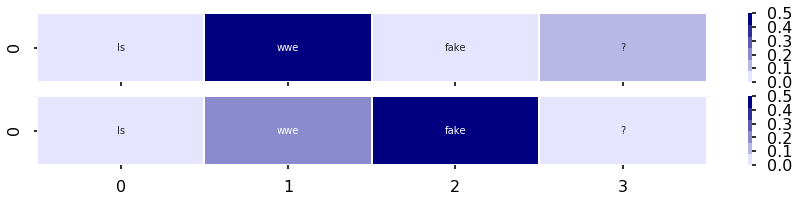

------------------------------
What exactly is success ?
7


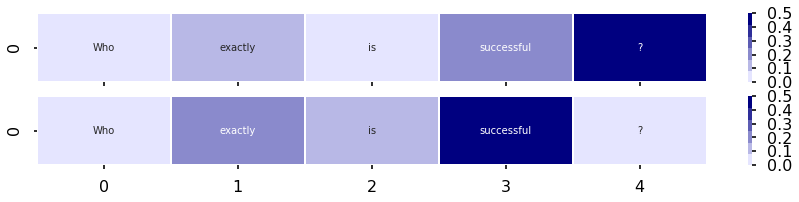

------------------------------
If I love someone , is it a crime ?
7


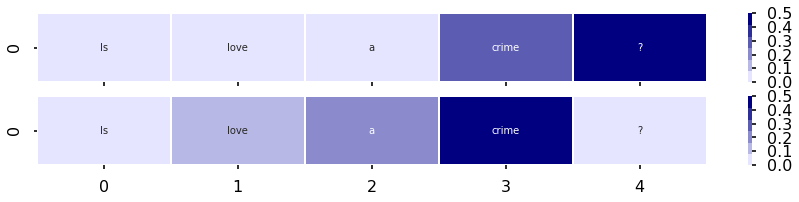

------------------------------
Can urinary incontinence be serious ?
7


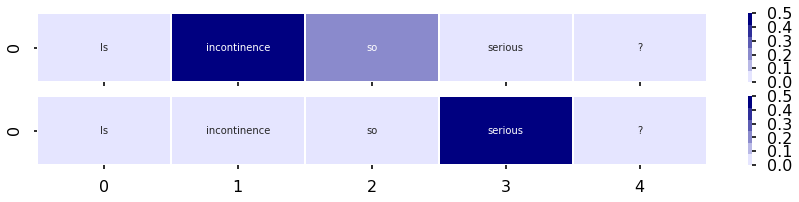

------------------------------
Why are Indians so superstitious ?
7


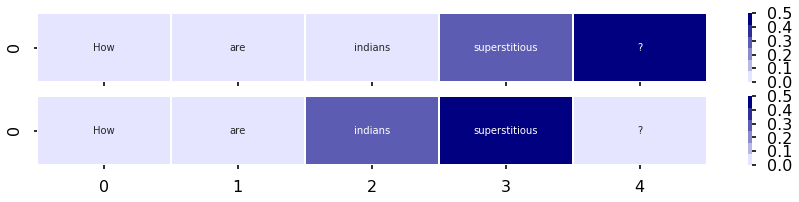

------------------------------
What is computer network ?
7


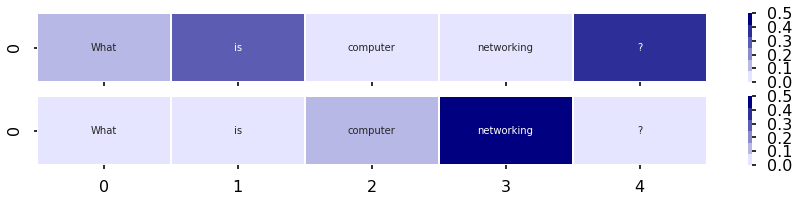

------------------------------
What are examples of existential questions ?
7


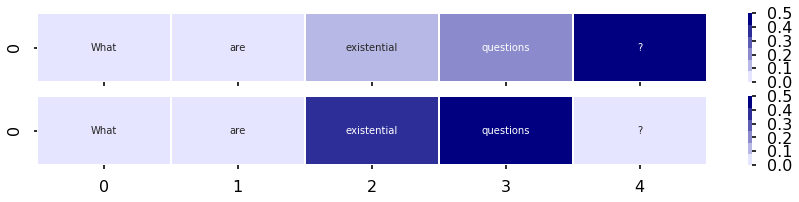

------------------------------
Are transgender women real ?
7


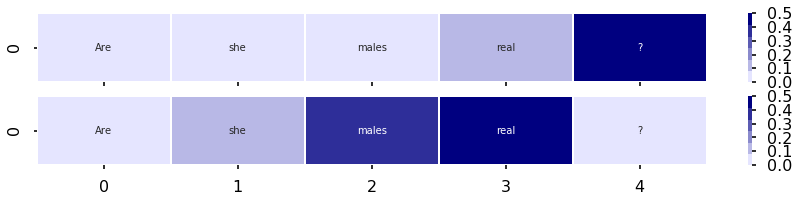

------------------------------
What is alkali ?
7


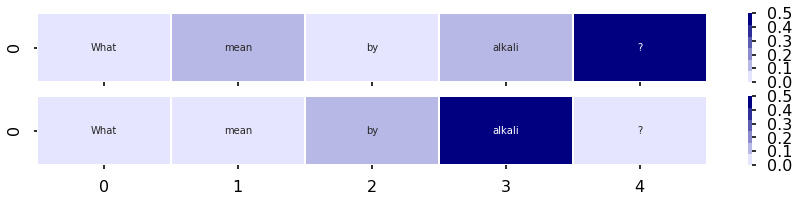

------------------------------
Will the world end today ?
7


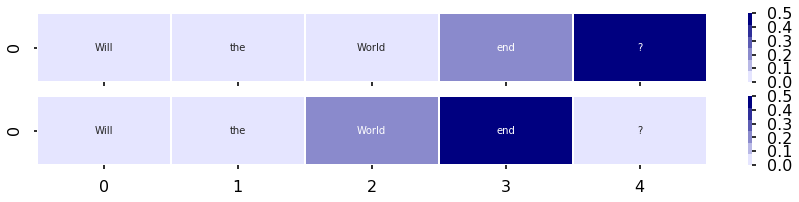

------------------------------
What animals knowingly commit suicide ?
7


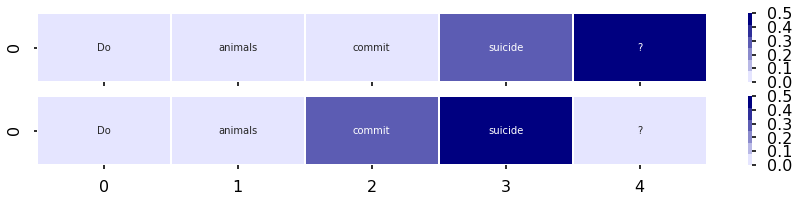

------------------------------
Do you think time travel is possible ?
7


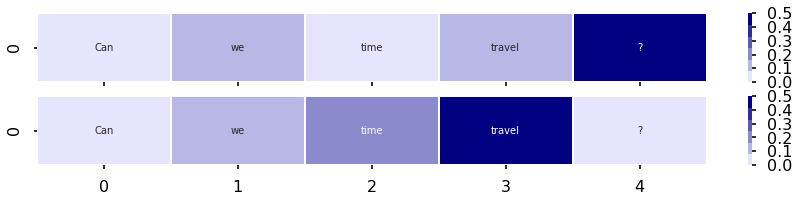

------------------------------
Should reservation be removed from India ?
7


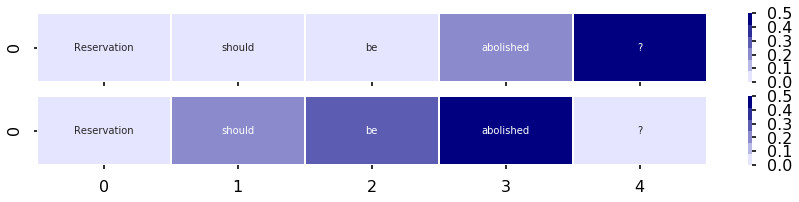

------------------------------
What makes one tick ?
7


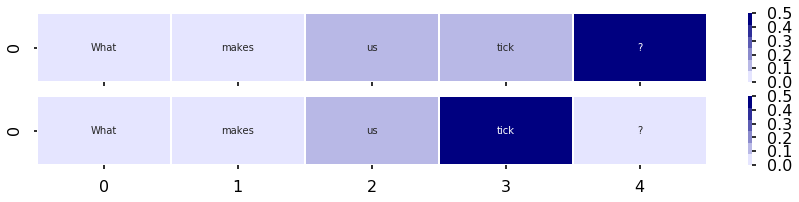

------------------------------
Why are winds formed ?
7


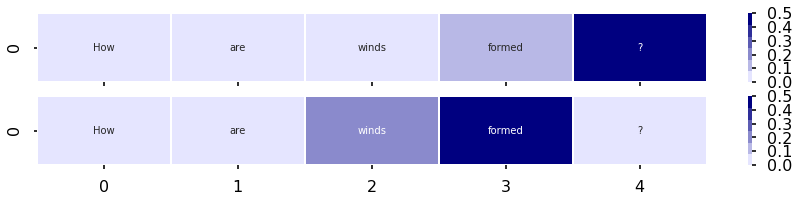

------------------------------
Is WW3 coming ?
7


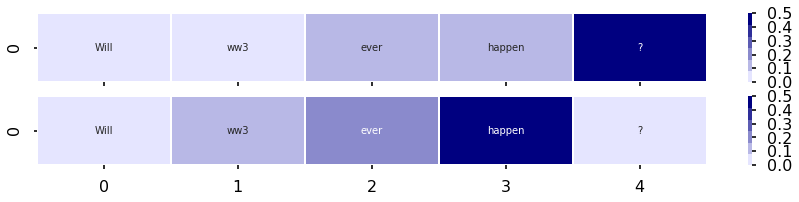

------------------------------
What does 4k resolution mean ?
7


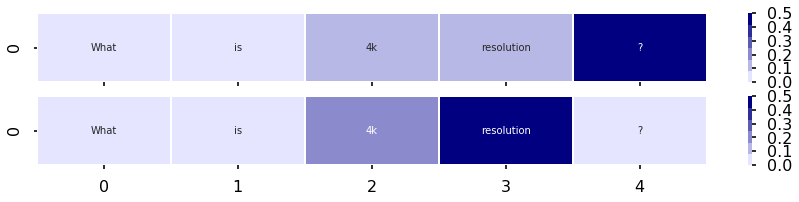

------------------------------
Can time travel ever be possible ?
7


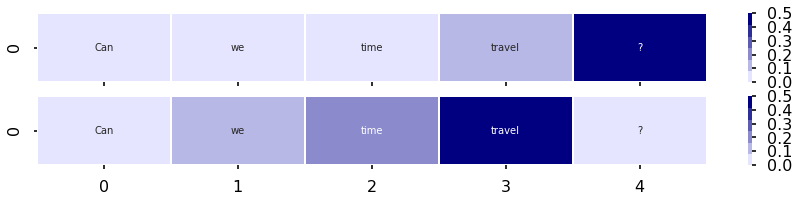

------------------------------
Can I hack anyone ’ s Whatsapp remotely ?
7


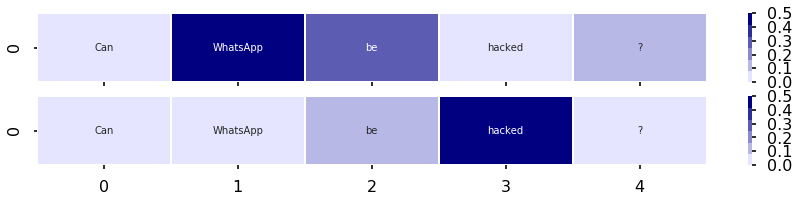

------------------------------
When will the World really end and how ?
7


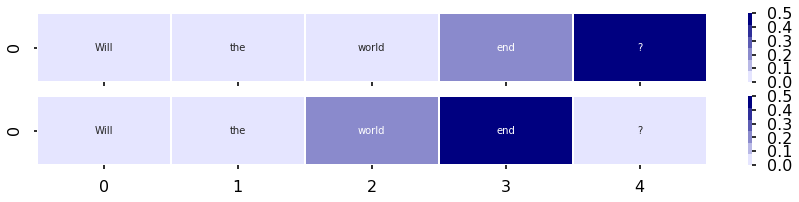

------------------------------
What are your favorite songs ?
7


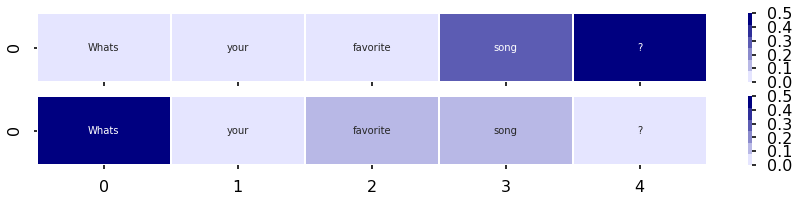

------------------------------
Was Jesus real ?
7


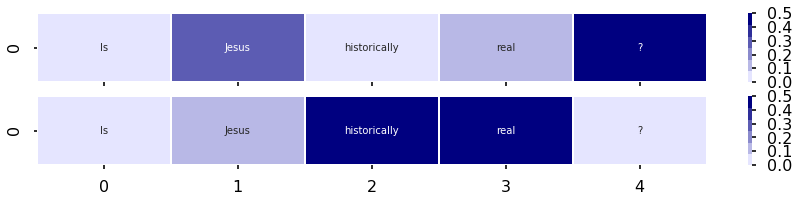

------------------------------
Why do men have to cheat ?
7


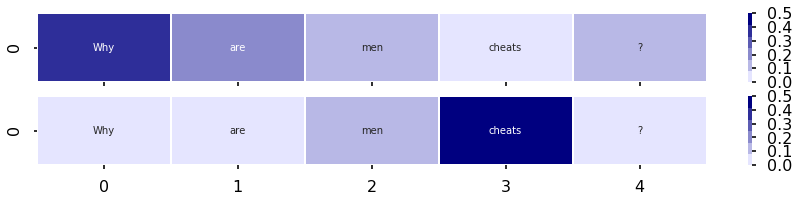

------------------------------
Can psychopathy be cured ?
7


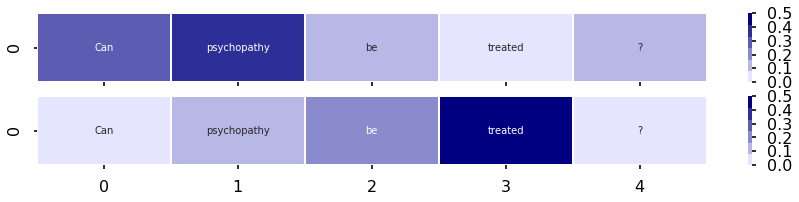

------------------------------
Which smartphone is best in 2016 ?
8


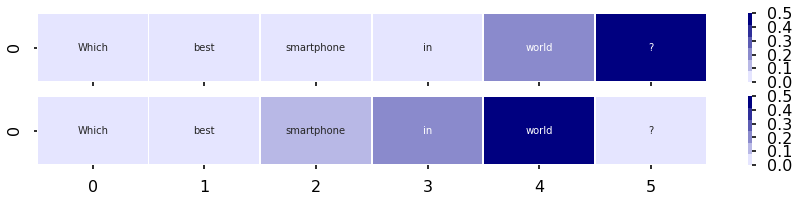

------------------------------
What is heaven like ?
8


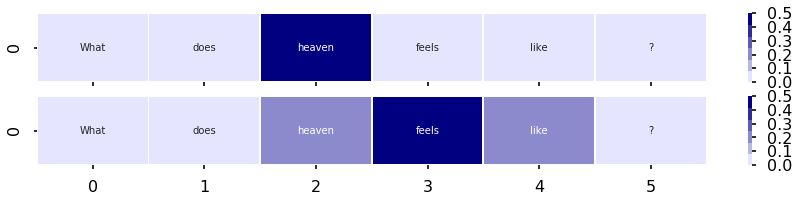

------------------------------
How black holes are formed ?
8


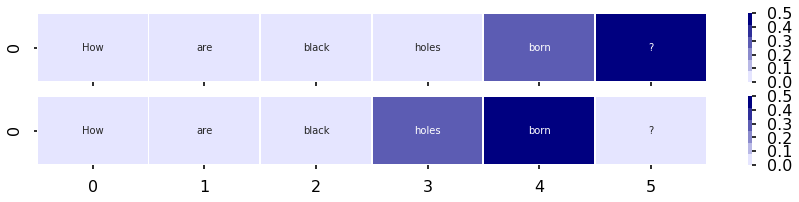

------------------------------
What is best option to investment ?
8


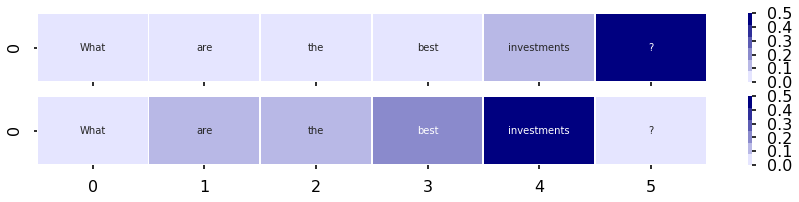

------------------------------
How does time exist ?
8


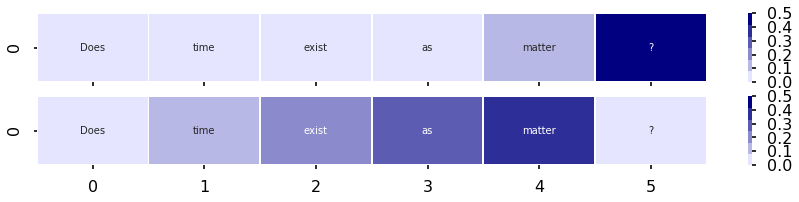

------------------------------
What animals commit suicide ?
8


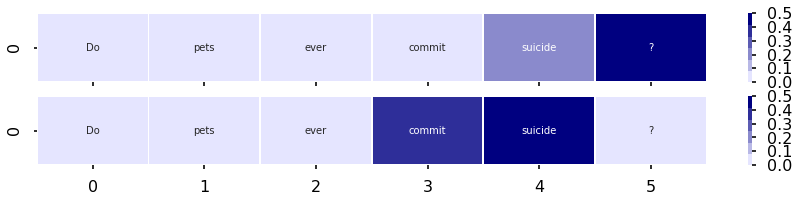

------------------------------
How can I lose an extreme amount of weight ?
8


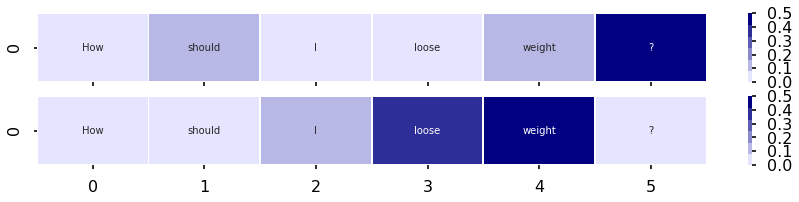

------------------------------
Why do you want to commit suicide ?
8


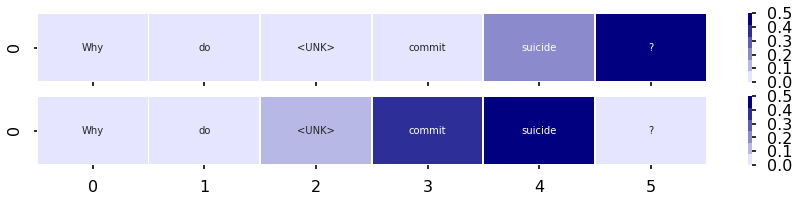

------------------------------
How can I stop masturbations ?
8


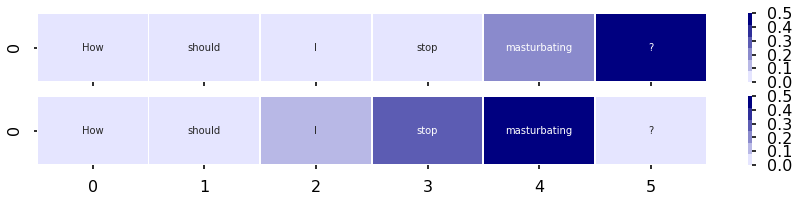

------------------------------
Where do I learn coding ?
8


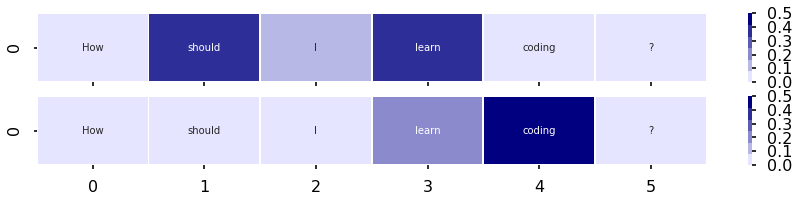

------------------------------
How should I avoid procrastination ?
8


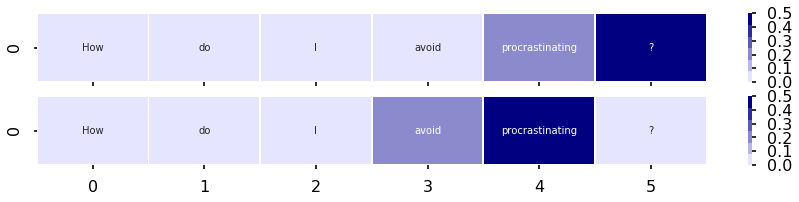

------------------------------
Why should we be more kind ?
8


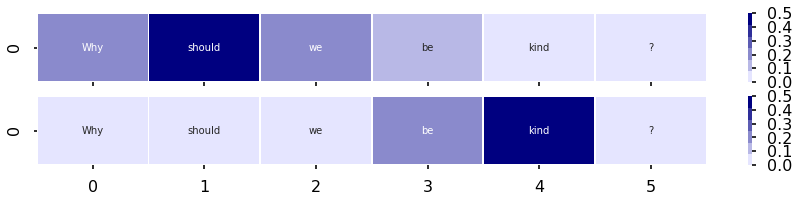

------------------------------
What do you define as success ?
8


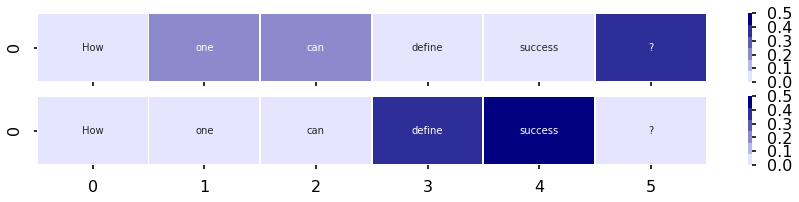

------------------------------
Why do dogs bark and chase at moving vehicles ?
8


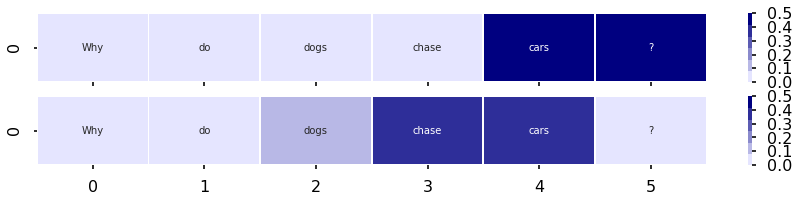

------------------------------
What is the longest journey which you took in your life ?
8


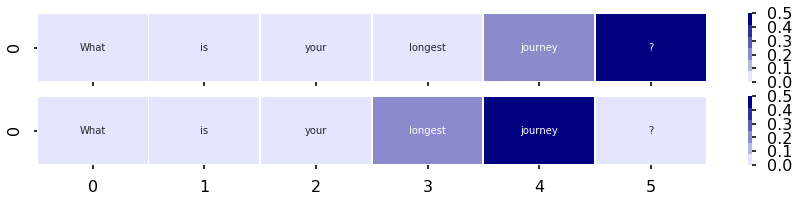

------------------------------
How commit suicide ?
8


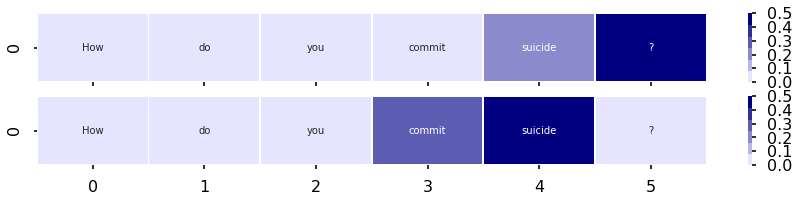

------------------------------
How do I erase my profile on Quora ?
8


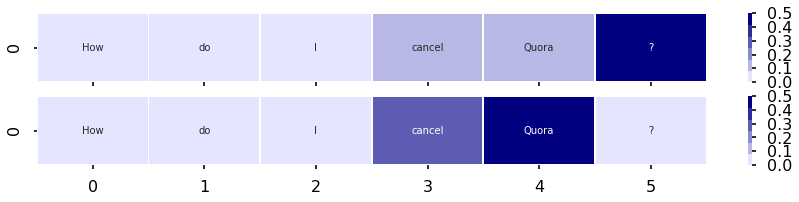

------------------------------
How can I minimize sleep ?
8


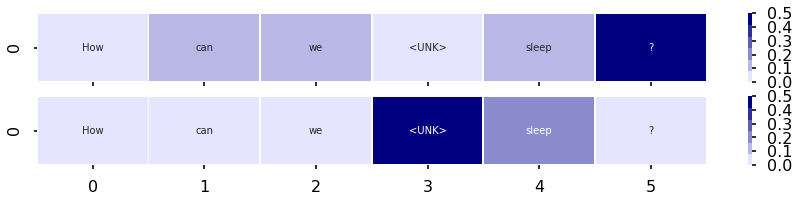

------------------------------
How to learn coding ?
8


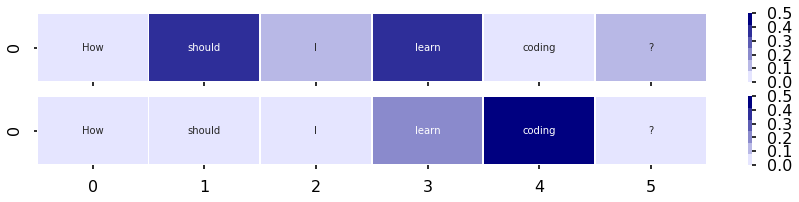

------------------------------
Why we should read books ?
8


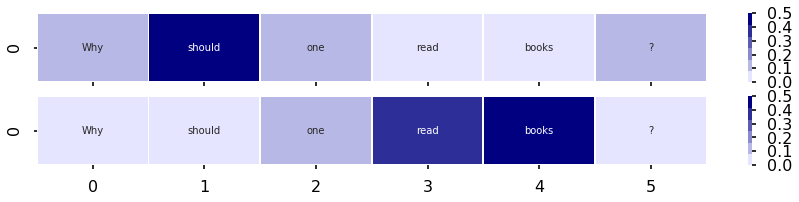

------------------------------
Does height increase after 21 ? How can I get taller ?
8


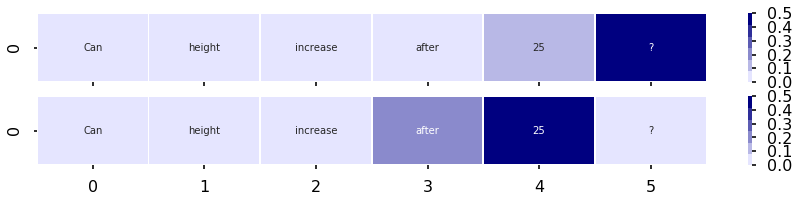

------------------------------
Which is best book ?
8


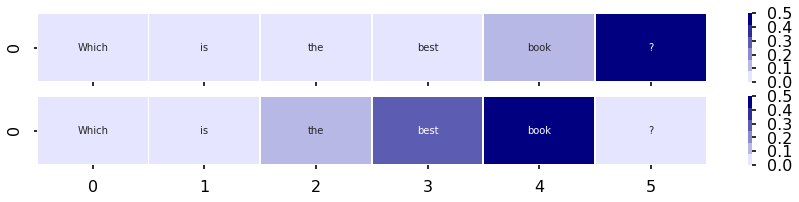

------------------------------
What do you mean by surgical strike ?
8


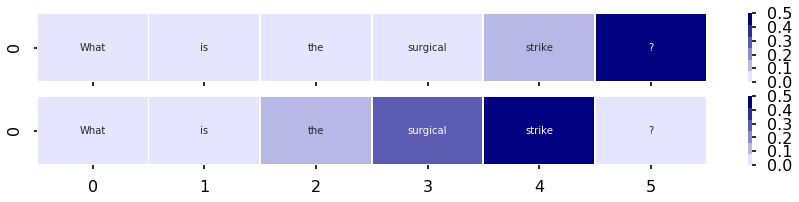

------------------------------
What is the main reason why people commit suicide ?
8


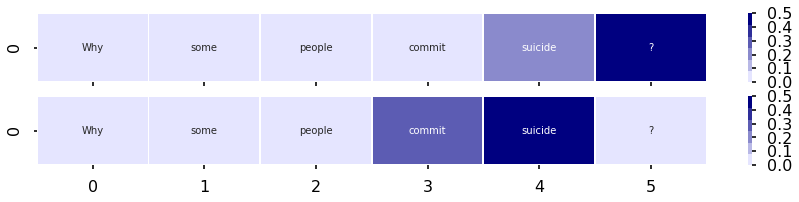

------------------------------
`` Why was Quora named `` '' Quora '' '' ? ''
8


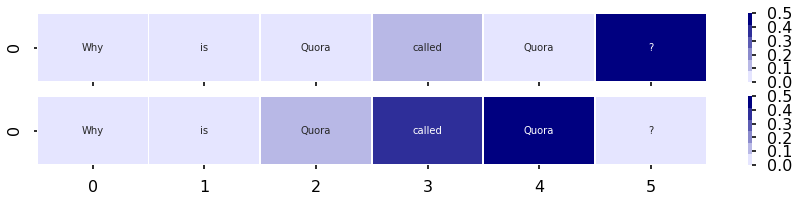

------------------------------
What is the cut off of KVPY SA stream ?
8


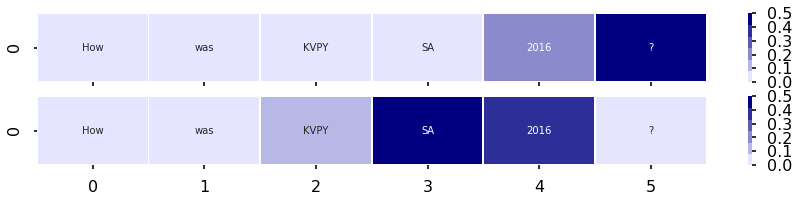

------------------------------
How do we prevent acne ?
8


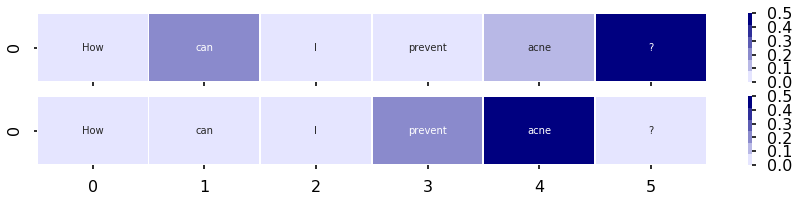

------------------------------
Do millennials like helicopter parenting since it 's so successful ?
8


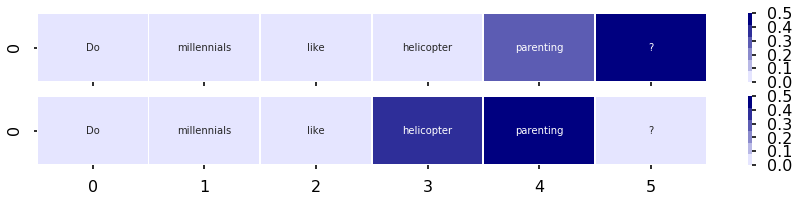

------------------------------
When will Spotify arrive in India ?
8


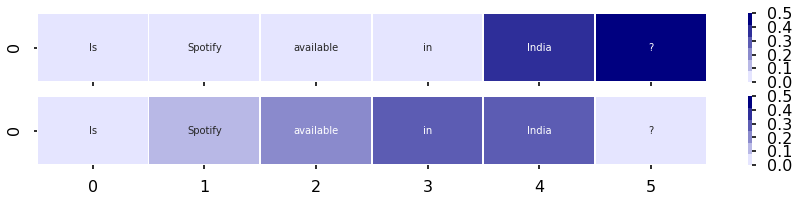

------------------------------
How are HP laptops ?
8


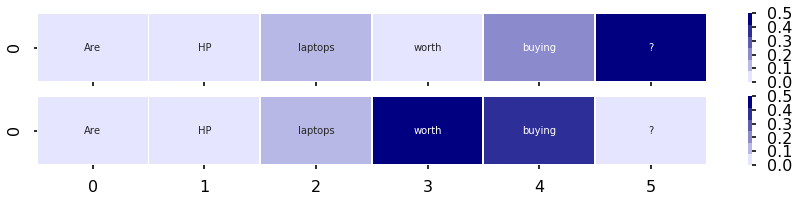

------------------------------
What are some of your weird habits ?
8


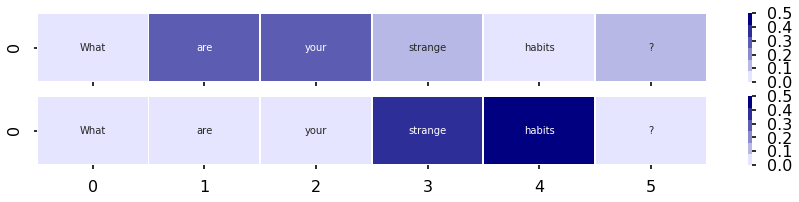

------------------------------
What are the foods that reduce tummy fat ?
8


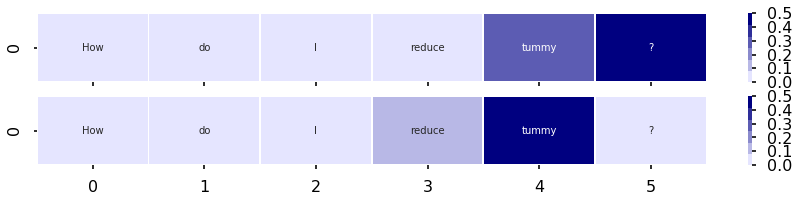

------------------------------
How can I gain weight naturally ?
8


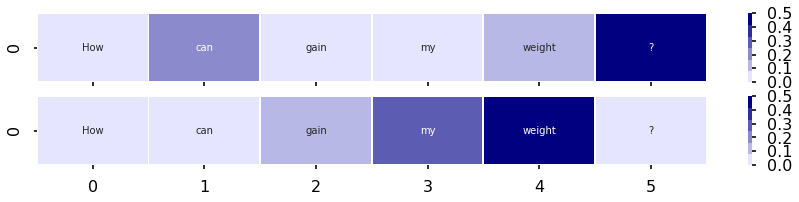

------------------------------
How can I hack fb password ?
8


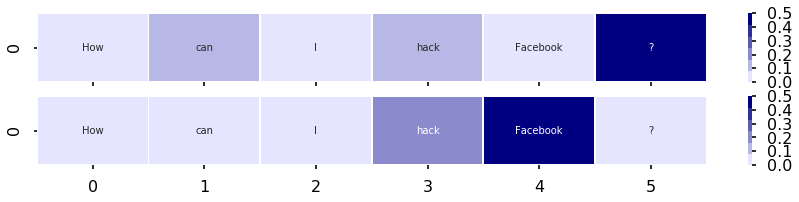

------------------------------
Is really true love exist ?
8


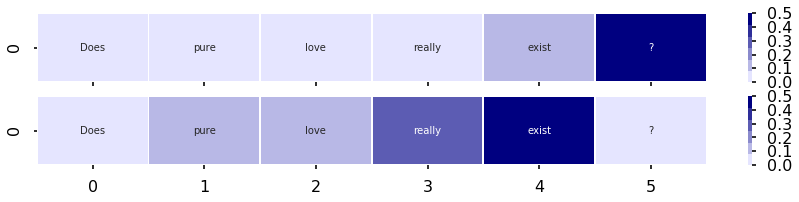

------------------------------
Who is Modi ?
8


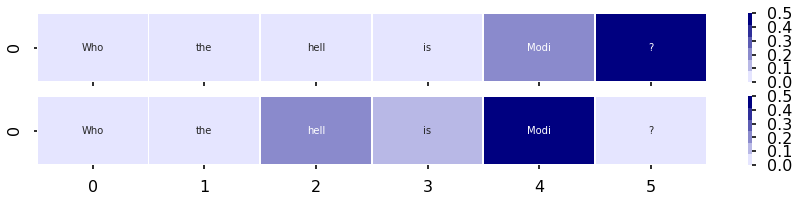

------------------------------
What habits , I can develop to avoid procrastination ?
8


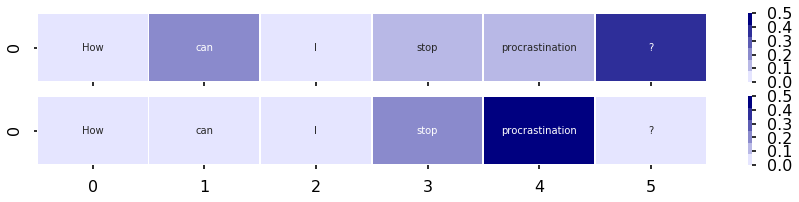

------------------------------
How do I gain more self control ?
8


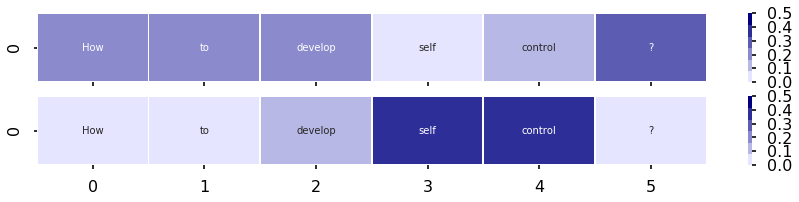

------------------------------
How do get started using Quora ?
8


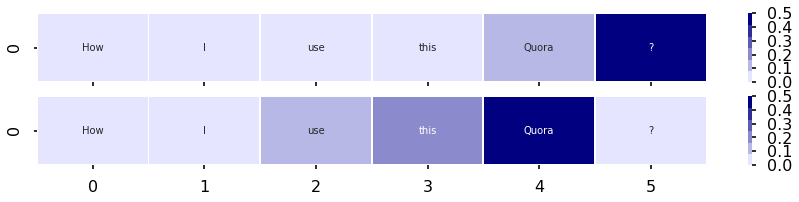

------------------------------
What is meant by surgical strikes ?
8


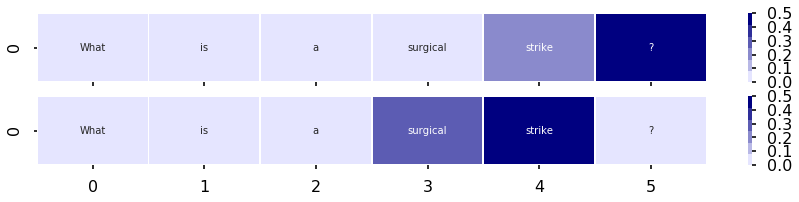

------------------------------
How can I be bold ?
8


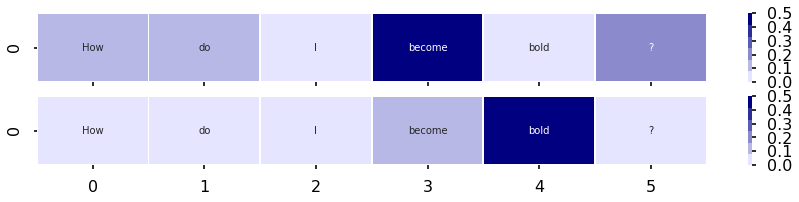

------------------------------
How do I think deeply ?
8


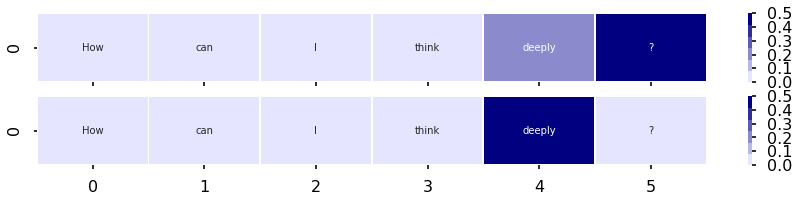

------------------------------
What 's your favourite fruit and why ?
8


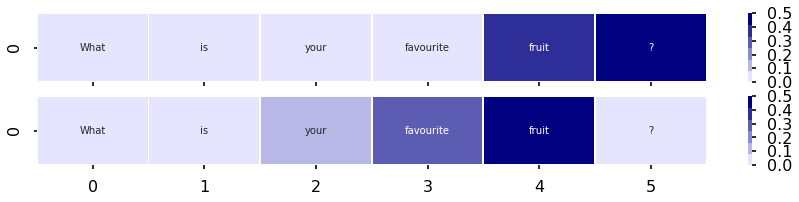

------------------------------
Is the global warming climate change things for real or a hoax ?
8


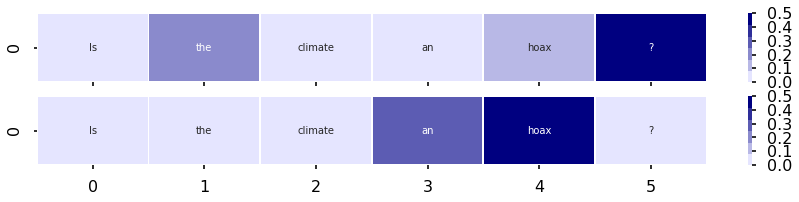

------------------------------
Have <UNK> been scientifically tested ?
8


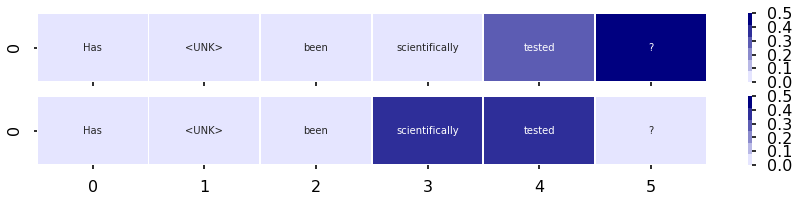

------------------------------
Are parallel universes real ?
8


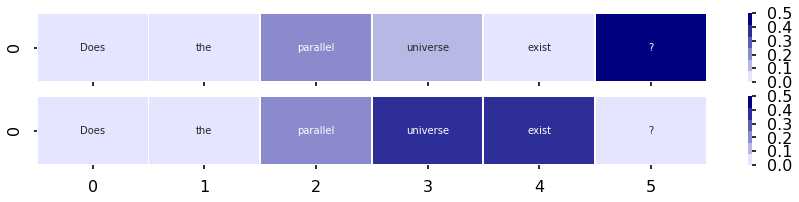

------------------------------
How can I lose my weight fast ?
8


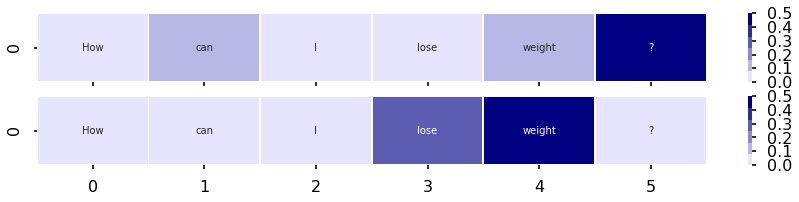

------------------------------
How should one change their diet to lose weight ?
8


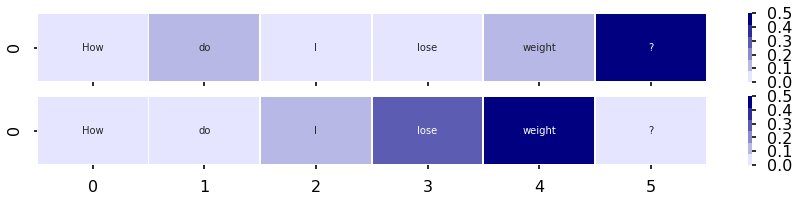

------------------------------
Why do we wear underwear ?
8


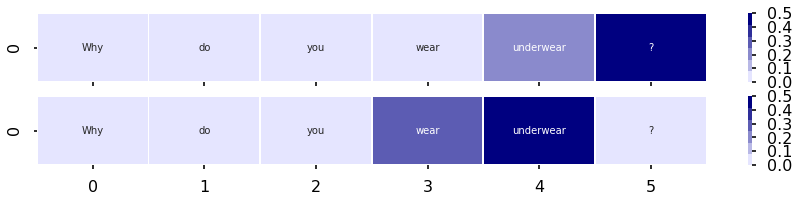

------------------------------
What animals commit suicide ?
8


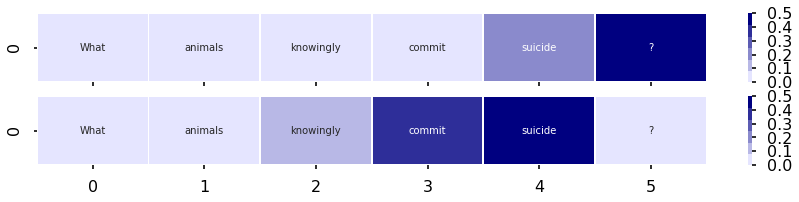

------------------------------
What is absolute tone km . ?
8


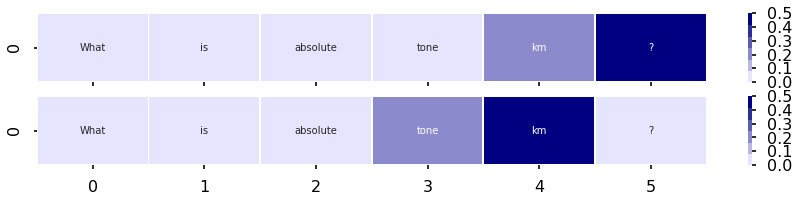

------------------------------
What are the best places to visit on a 3 day trip in and around kerala ?
8


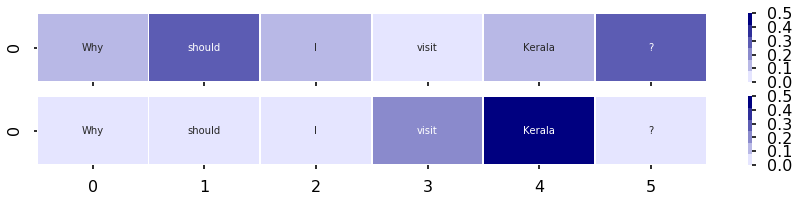

------------------------------
How can I make money online consistently ?
8


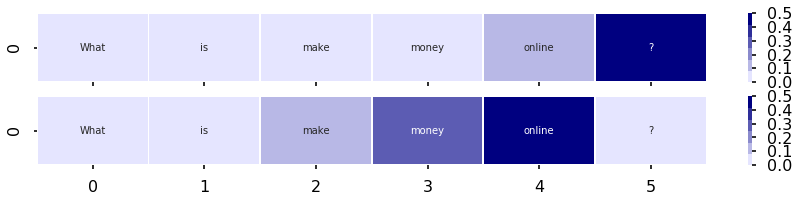

------------------------------
How do I reduce my weight ?
8


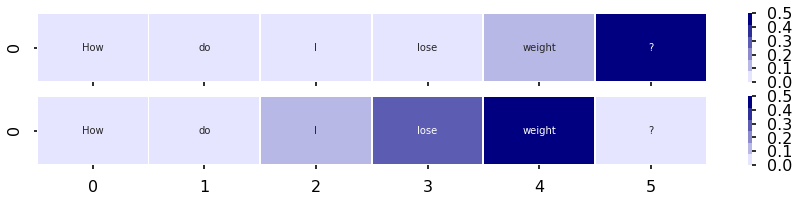

------------------------------
Why do we dream ? Do dreams have meanings ?
8


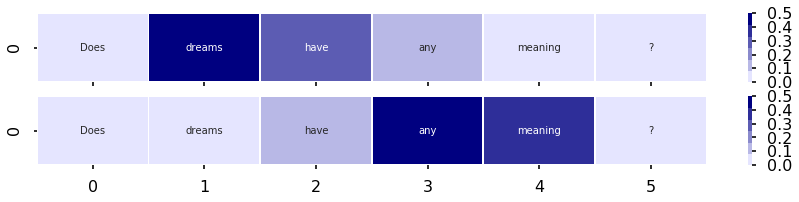

------------------------------
How can I hack clash of Clans game ?
8


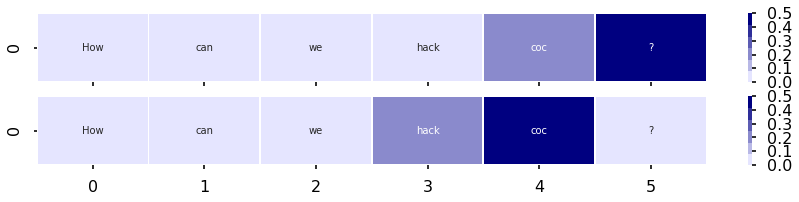

------------------------------
Do <UNK> masturbate ?
8


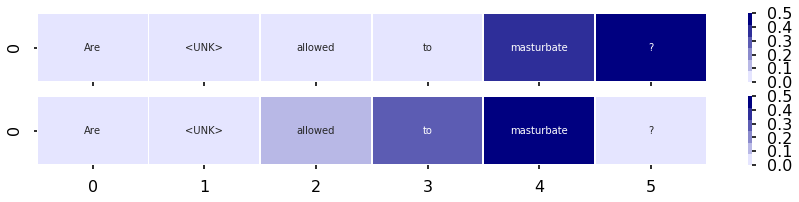

------------------------------
What are your favorite books ?
8


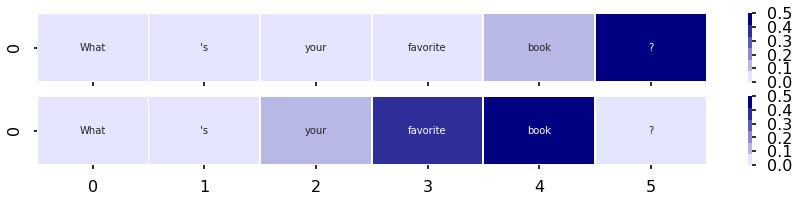

------------------------------
What are your favorite animals and why ?
8


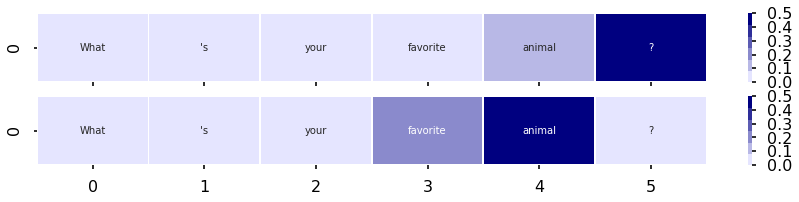

------------------------------
How do I suck it up and lose weight ?
8


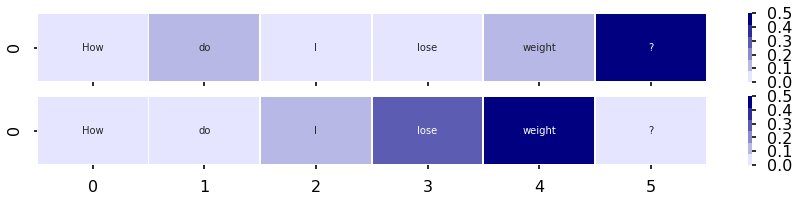

------------------------------
How 's everyone doing ?
8


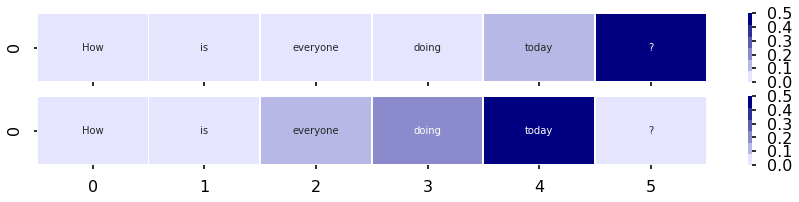

------------------------------
Why did Donald Trump win the 2016 American election ?
8


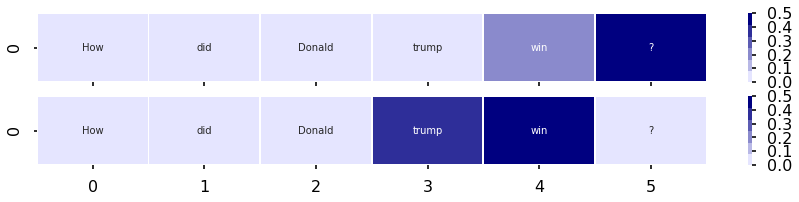

------------------------------
Will the universe end ?
8


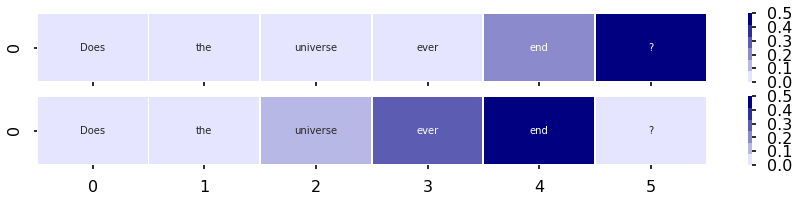

------------------------------
I 'm overweight . How can I begin to lose weight ?
8


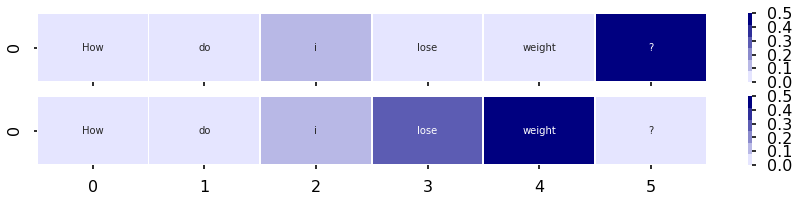

------------------------------
How old is trump ?
8


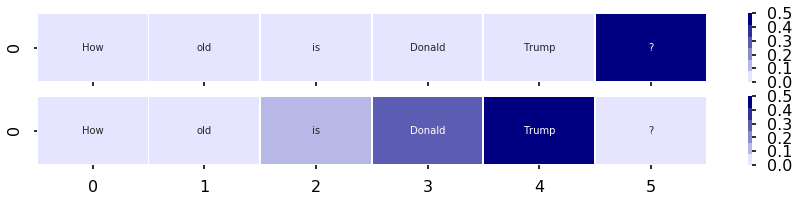

------------------------------
What brings people back to Quora ?
8


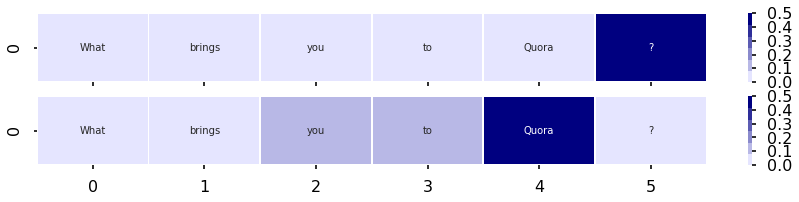

------------------------------
I am 19 years old girl and my height is 5 ' 3 . How can I increase my height ?
8


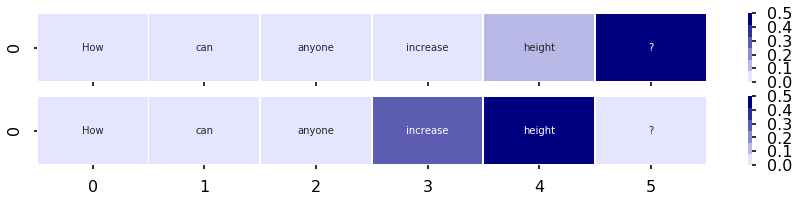

------------------------------
Who are your favorite YouTubers ?
8


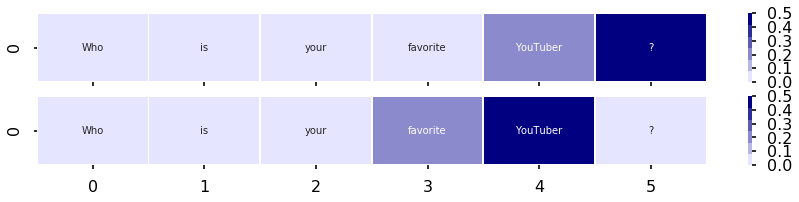

------------------------------
Do believers curse god ?
8


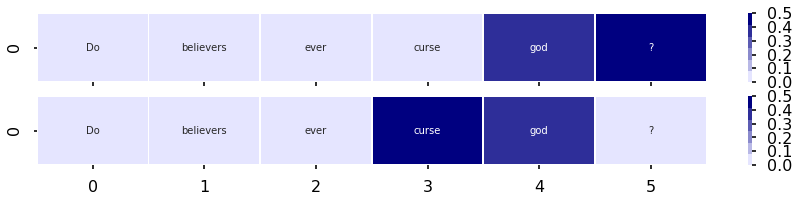

------------------------------
What is the fastest way to get abs ?
8


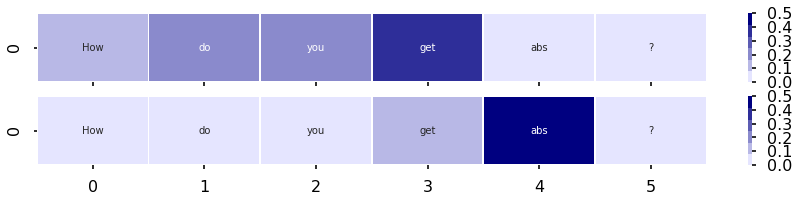

------------------------------
Who joins Quora ?
8


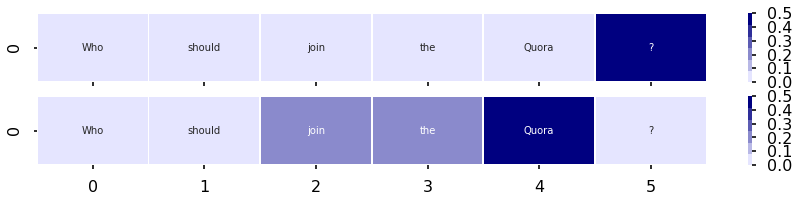

------------------------------
What are your favorite animals ?
8


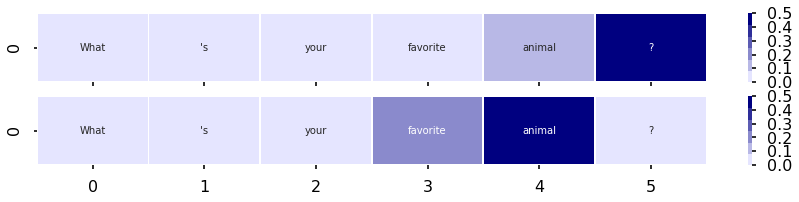

------------------------------
Is having kids worth it ?
8


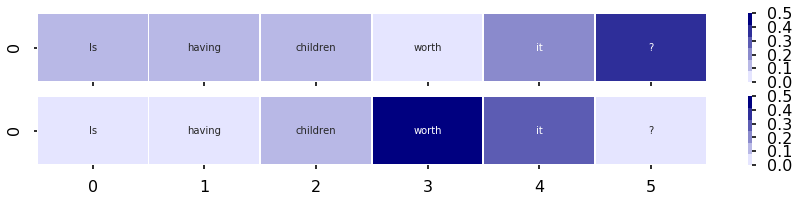

------------------------------
How should I avoid procrastination ?
8


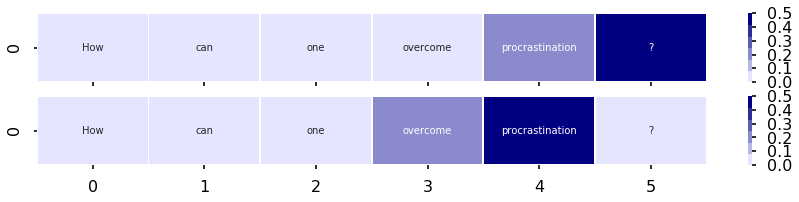

------------------------------
What 's the purpose of life ? What is life actually about ?
8


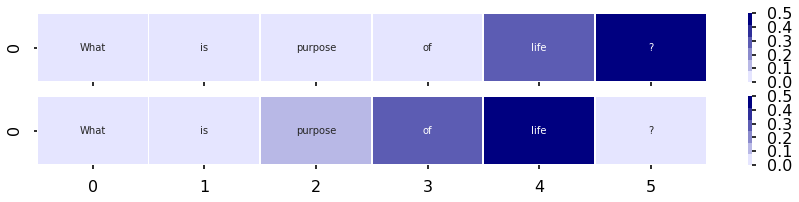

------------------------------
How can I read very fast ?
8


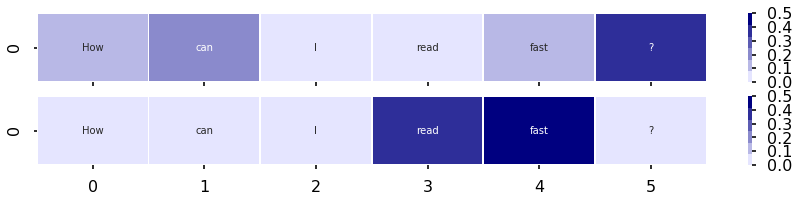

------------------------------
Is there any chance that Donald Trump will win this election ?
8


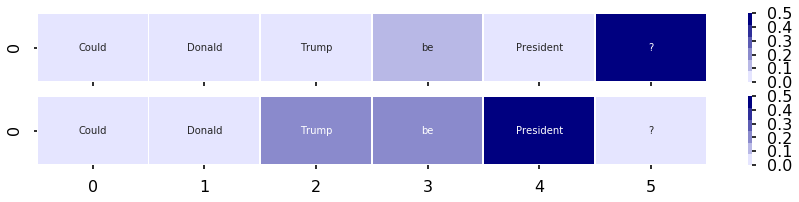

------------------------------
Is Economics good major ?
8


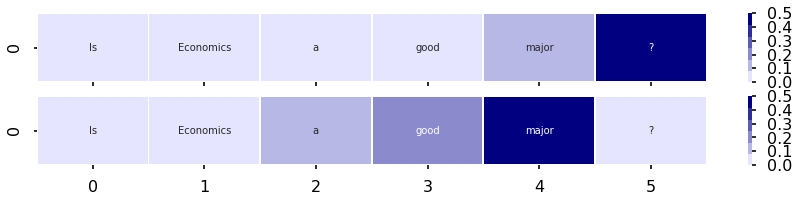

------------------------------
What is your favorite book , why ?
8


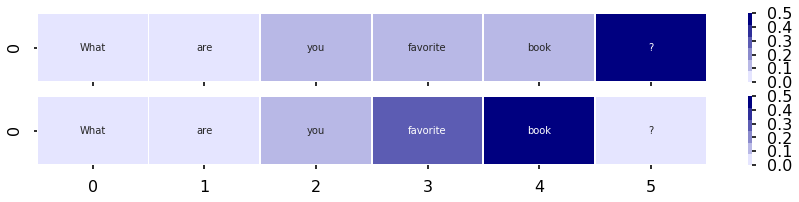

------------------------------
How can I lose 4kg weight ?
8


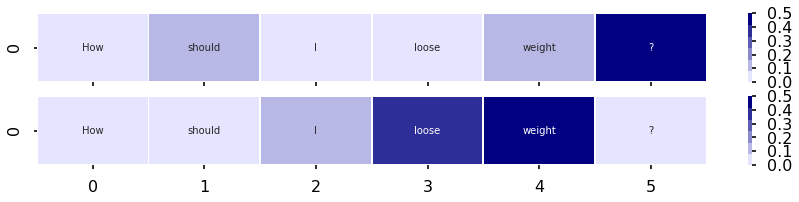

------------------------------
Why was Albert Einstein considered an atheist ?
8


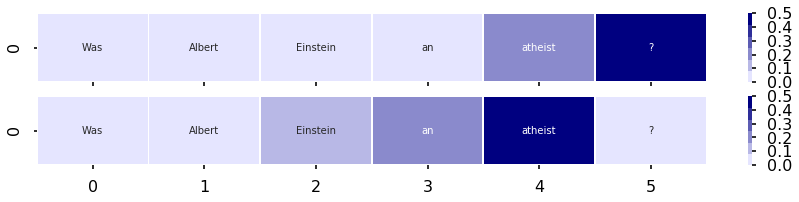

------------------------------
How can you increase your height ?
8


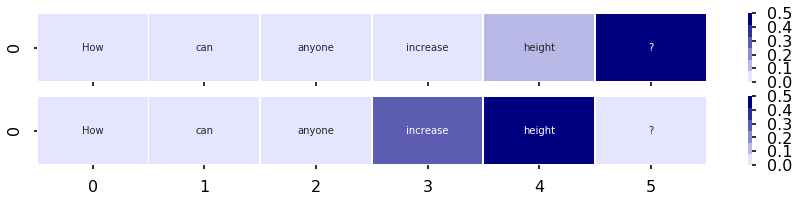

------------------------------
What 's your favorite joke ?
8


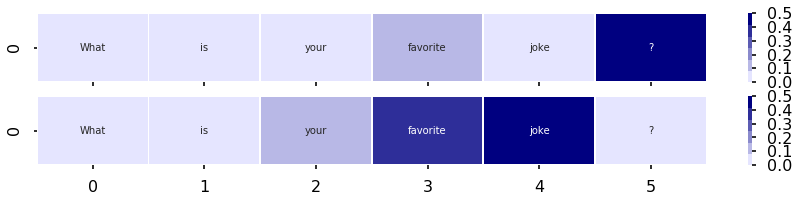

------------------------------
What is a deep web ?
8


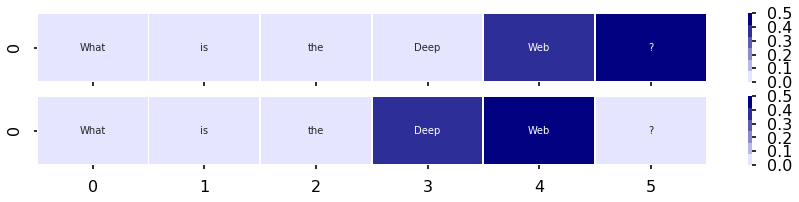

------------------------------
What is the best weight gain treatment for gaining weight ?
8


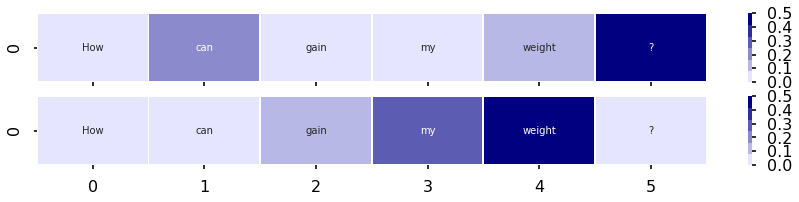

------------------------------
How should I become confident ?
8


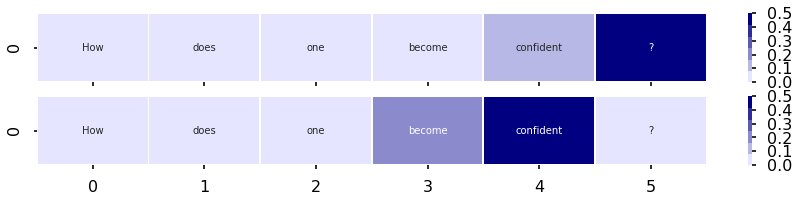

------------------------------
What is the fastest possible way to lose weight ?
8


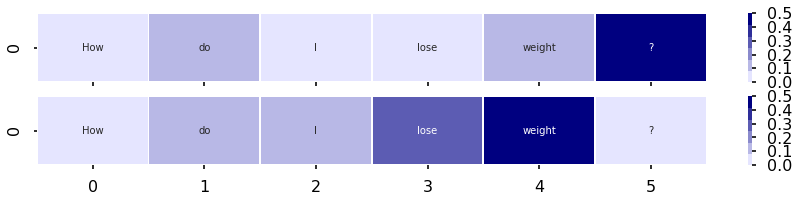

------------------------------
What is your best Hollywood movie and why ?
8


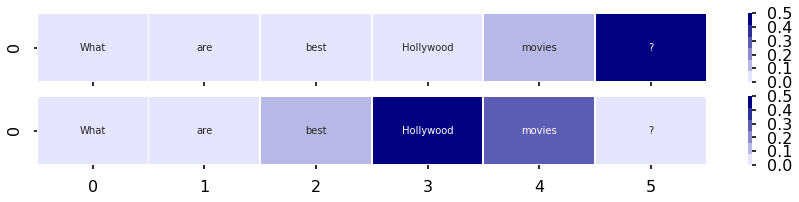

------------------------------
Why did nature create mosquitoes ?
8


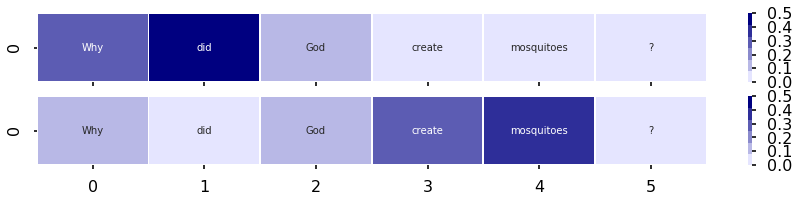

------------------------------
Why is the RBI issuing 2000 rupee notes ?
8


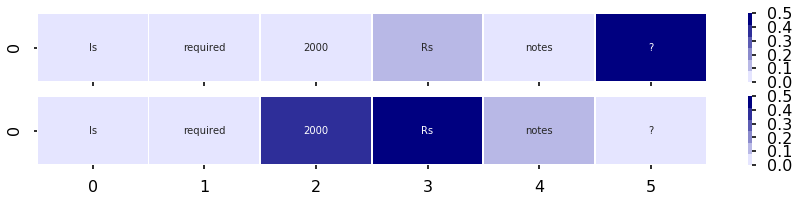

------------------------------
How do I gain self confidence ?
8


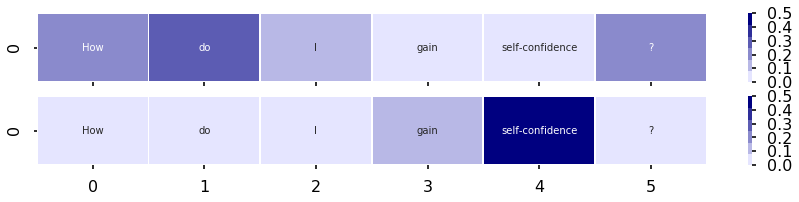

------------------------------
How do you quit smoking ?
8


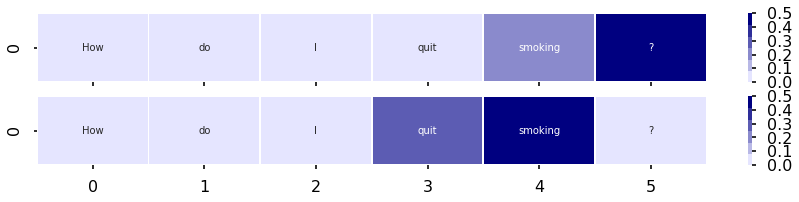

------------------------------
Is Donald Trump right that CNN is biased against him ?
8


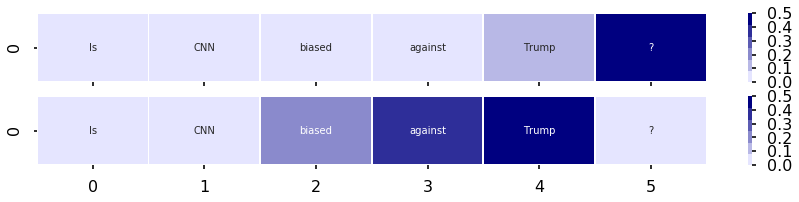

------------------------------
Does masturbation affect muscle growth when working out ?
8


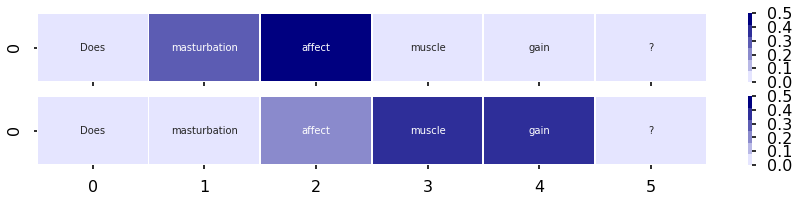

------------------------------
How do I stop masturbation and forget women ?
8


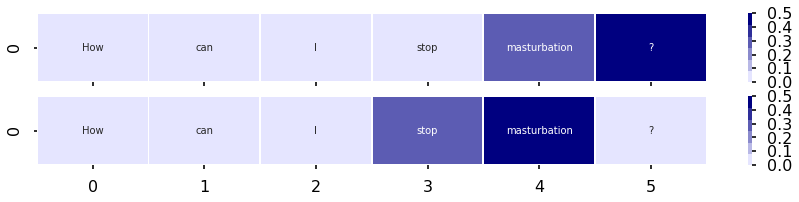

------------------------------
What is the best way for underweight to gain weight ?
8


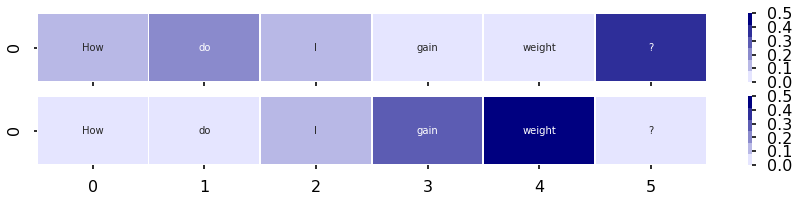

------------------------------
Does swimming increase your height in twenties ?
8


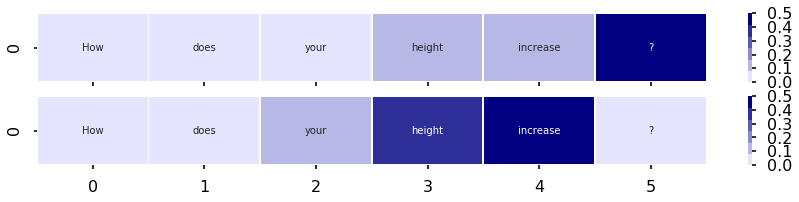

------------------------------
Which is/are the movie ( s ) which made you cry ?
8


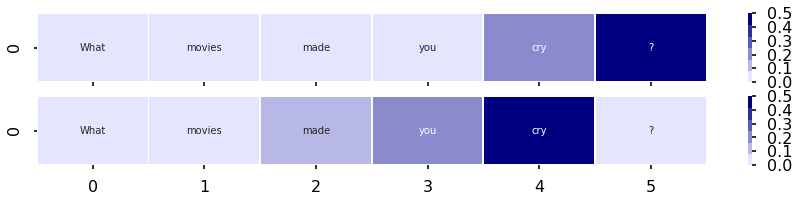

------------------------------
How can I buy shares ?
8


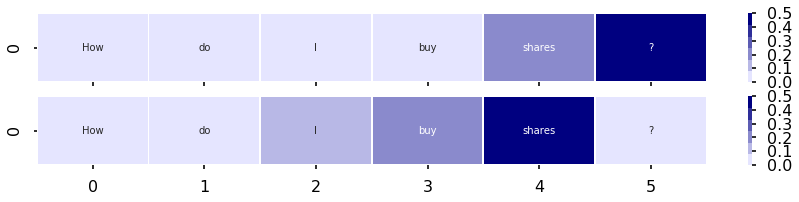

------------------------------
What is the best PC game ?
8


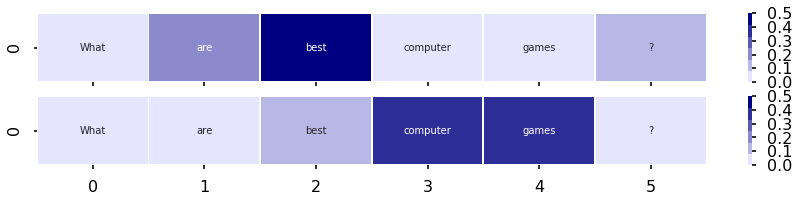

------------------------------
What is the best chair in the world ?
8


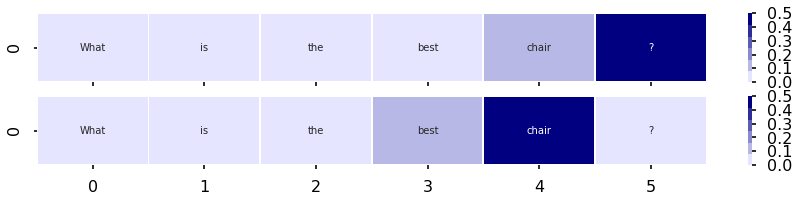

------------------------------
Is it possible that global warming is a hoax ?
8


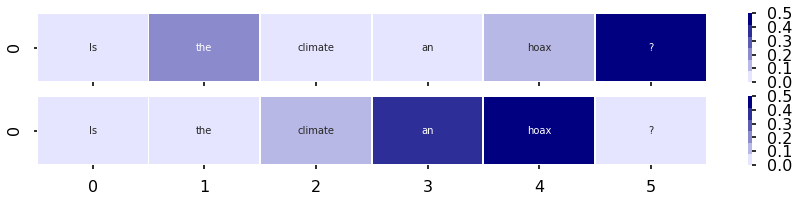

------------------------------
How do you avoid procrastination ?
8


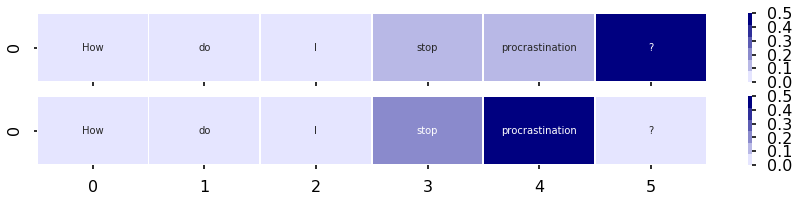

------------------------------
How can I <UNK> my brain thinking ability ?
8


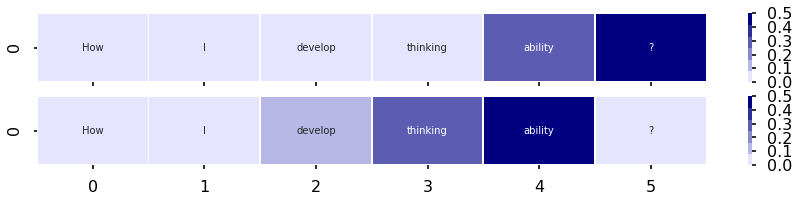

------------------------------
What are the best places to visit in Wayanad , Kerala ?
8


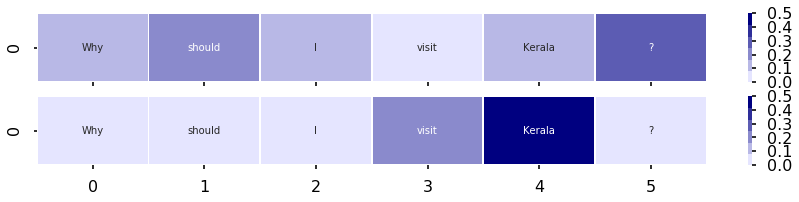

------------------------------
What is the main reason why people commit suicide ?
8


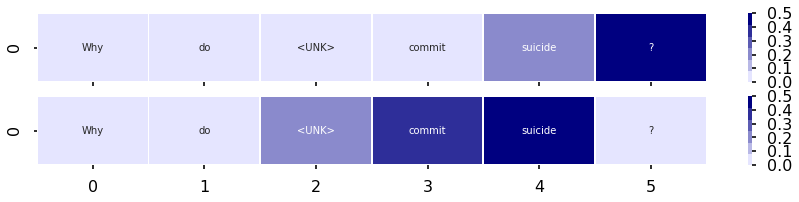

------------------------------
What the purpose of life on earth ?
8


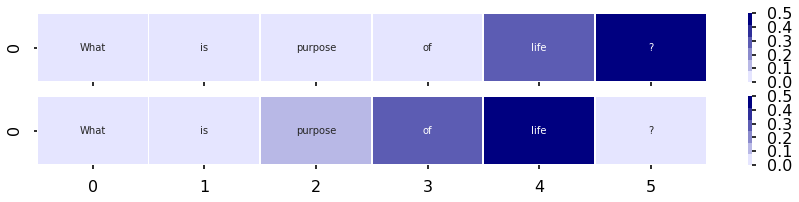

------------------------------
What are the different aspects of culture ?
9


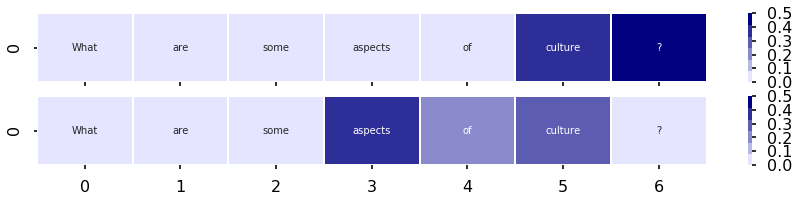

------------------------------
Does waist training work ?
9


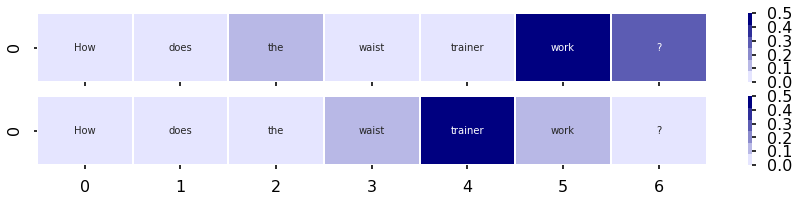

------------------------------
What is the ending of Game of Thrones ?
9


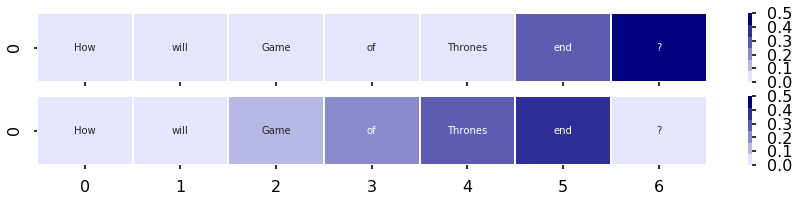

------------------------------
Has Ancient Egypt been scientifically tested ?
9


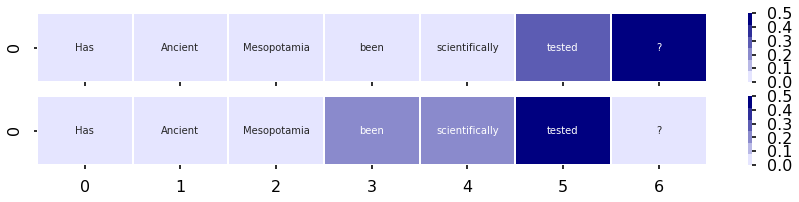

------------------------------
What is the easiest way to know my IQ ?
9


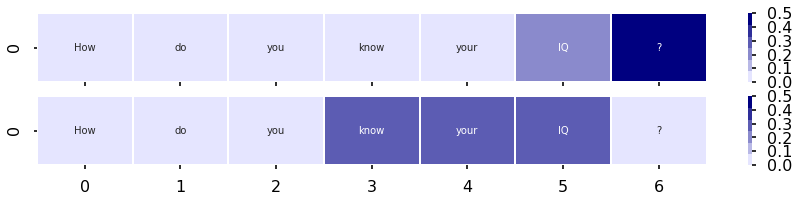

------------------------------
Is telekinesis scientifically true ?
9


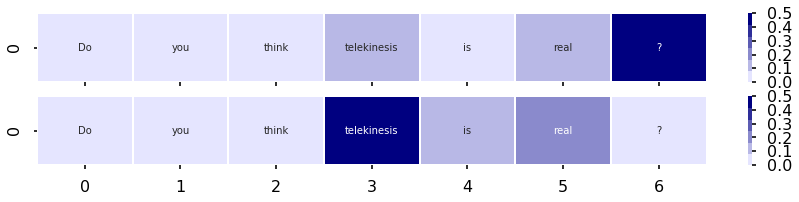

------------------------------
How do I find my old Gmail account back ?
9


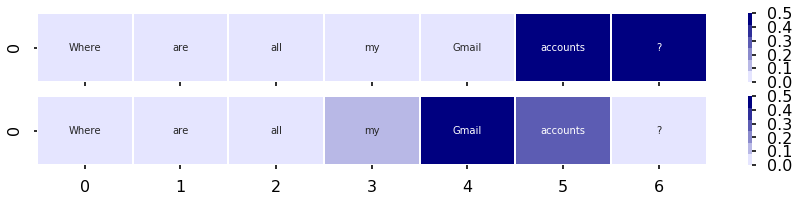

------------------------------
How do I ask someone a question on Quora ?
9


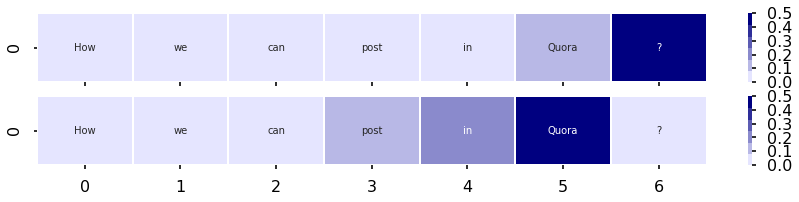

------------------------------
How do I increase my sexual stamina ?
9


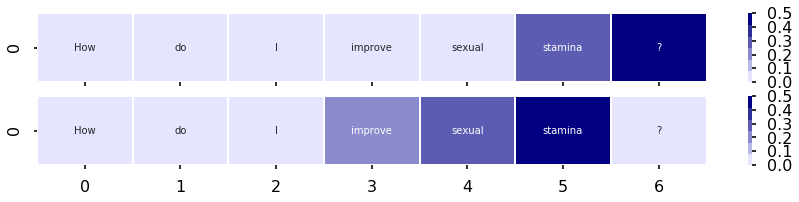

------------------------------
How can I lose weight slowly and naturally ?
9


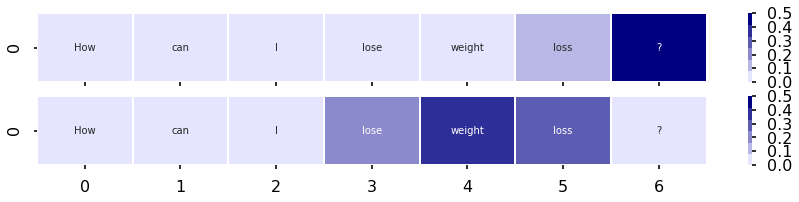

------------------------------
What is your best hollywood movie ?
9


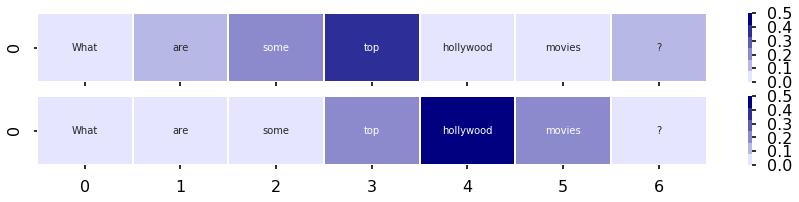

------------------------------
How do I prevent myself from masturbating ?
9


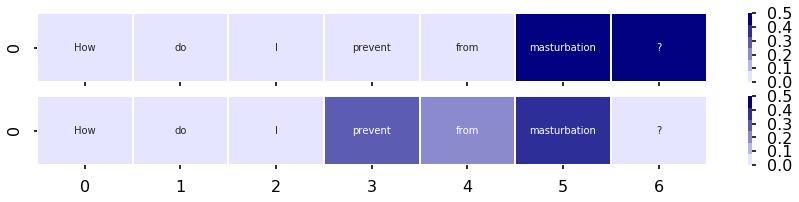

------------------------------
What 's your New Year resolutions for 2017 and what will you do to accomplish your goal ?
9


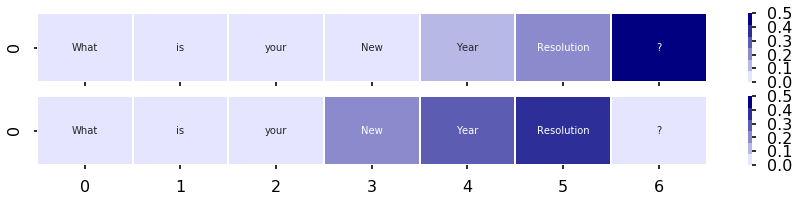

------------------------------
What 's the process to start study of IAS ?
9


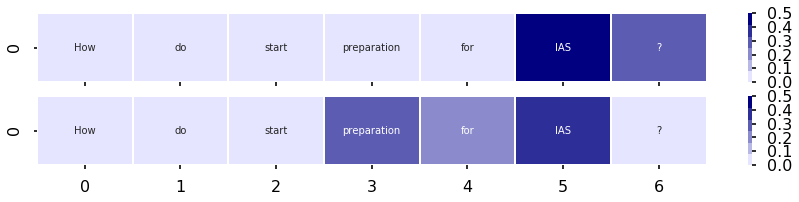

------------------------------
What are some ways to improve English ?
9


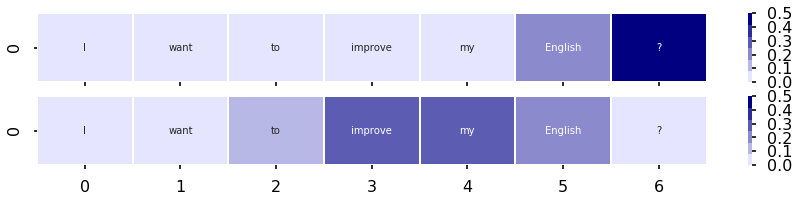

------------------------------
If I smoked meth for a month how long for a UA to show clean ?
9


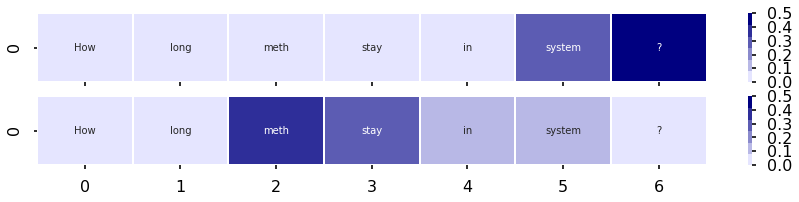

------------------------------
How difficult was KVPY SX 2016 ?
9


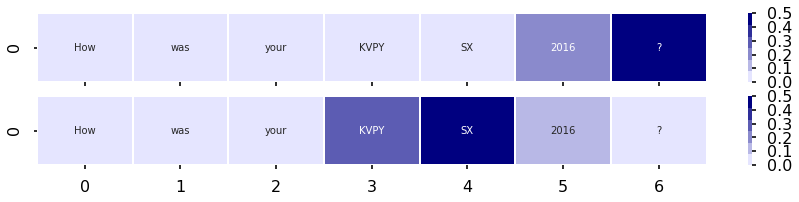

------------------------------
Will I grow any taller at 15 ?
9


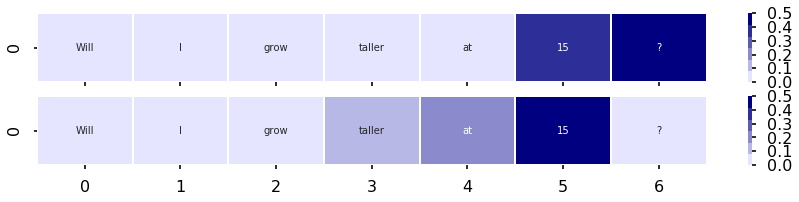

------------------------------
How should I avoid procrastination ?
9


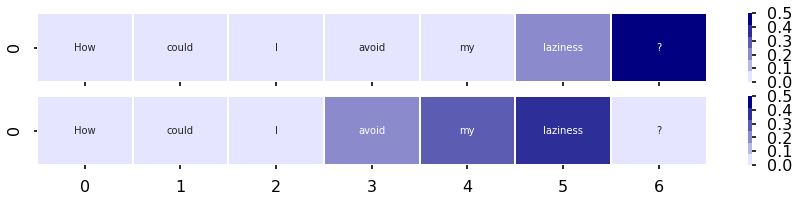

------------------------------
What are some ways to root an Android device ?
9


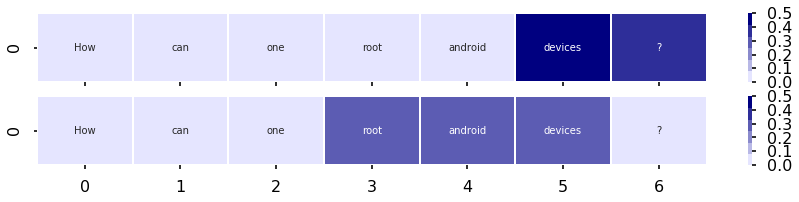

------------------------------
How would you describe 2016 parenting ?
9


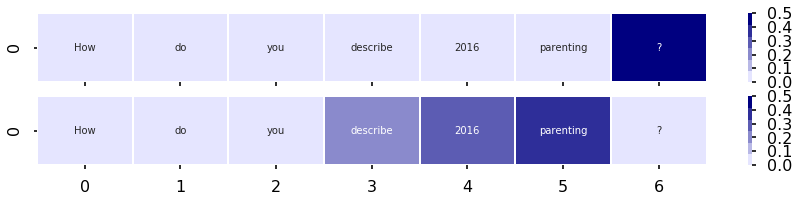

------------------------------
What are some best techniques or exercises to increase my brain power ?
9


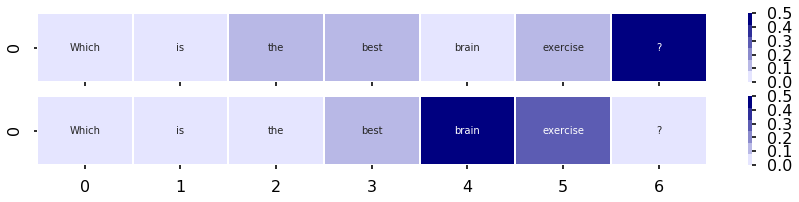

------------------------------
How soon is world war III ?
9


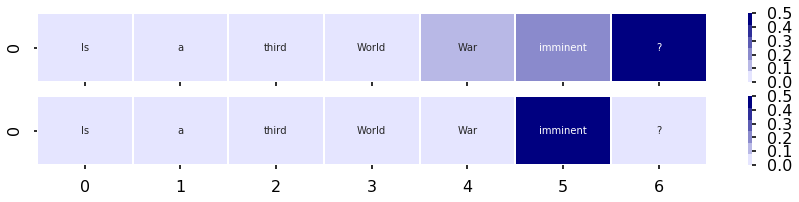

------------------------------
Which are the best branding agencies ?
9


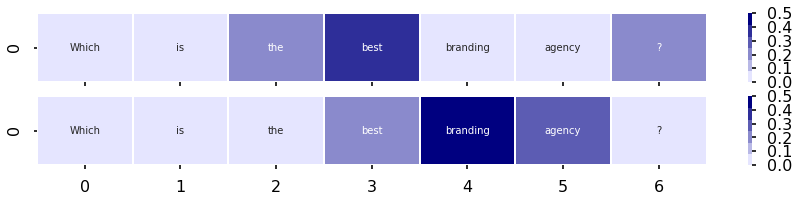

------------------------------
How close are we to World War Three , and how bad would it be ?
9


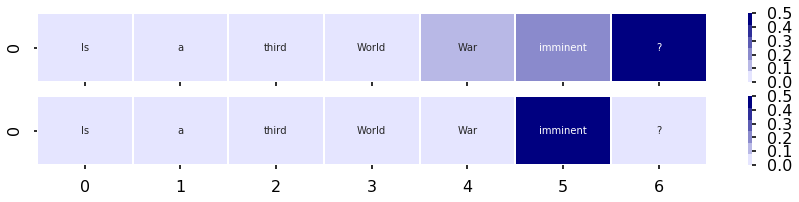

------------------------------
What 's the best investment ?
9


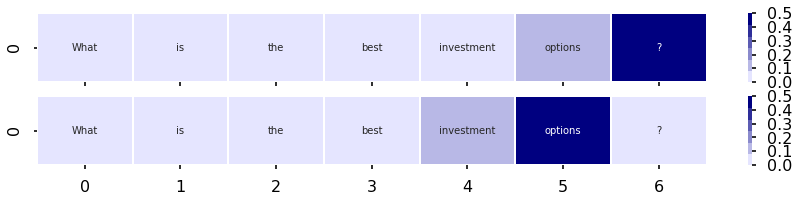

------------------------------
How do you avoid procrastination ?
9


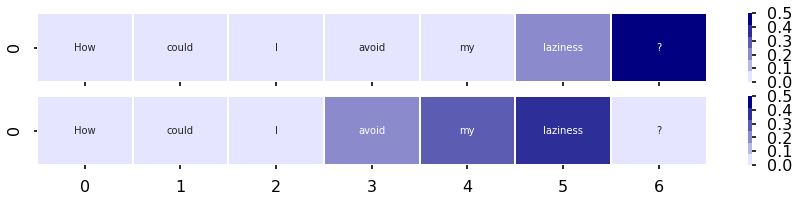

------------------------------
How can I get better with public speaking ?
9


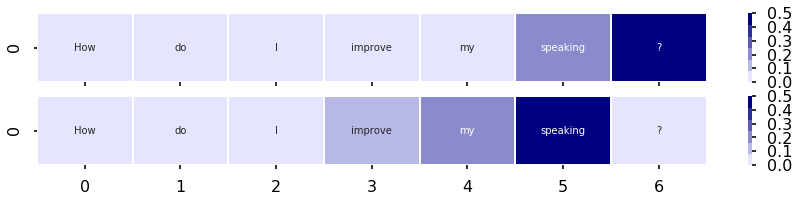

------------------------------
What are some of the best Pokemon Go hacks ?
9


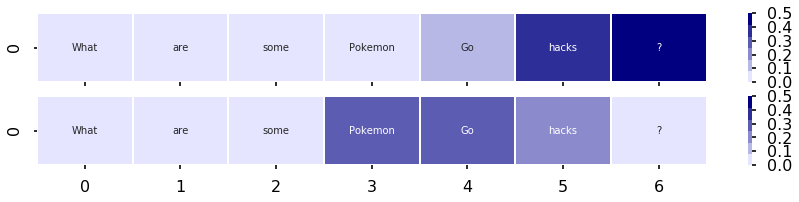

------------------------------
How can we earn from Quora ?
9


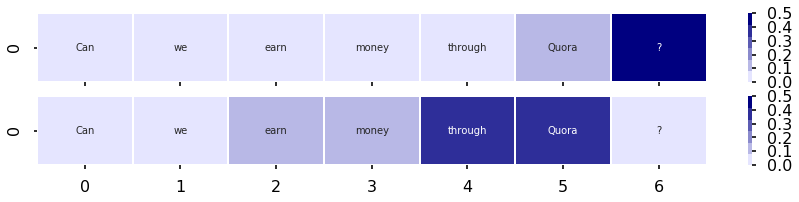

------------------------------
Which is the best programming language for a beginner to learn ?
9


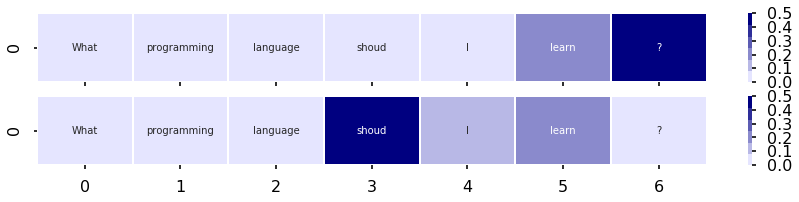

------------------------------
What is my purpose in life ? Why is there life on Earth ?
9


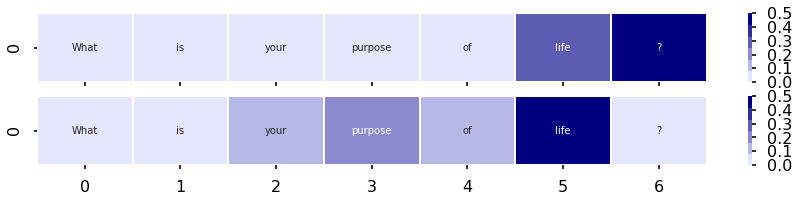

------------------------------
How do I get more upvotes on my answers on Quora ?
9


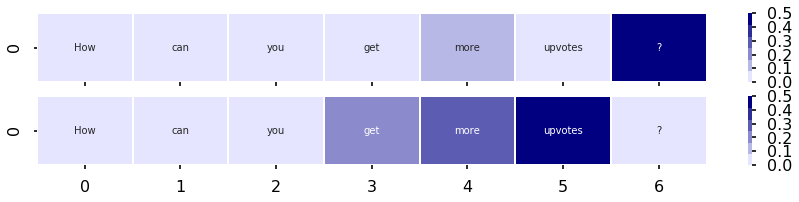

------------------------------
What is the best way to make <UNK> eggs ?
9


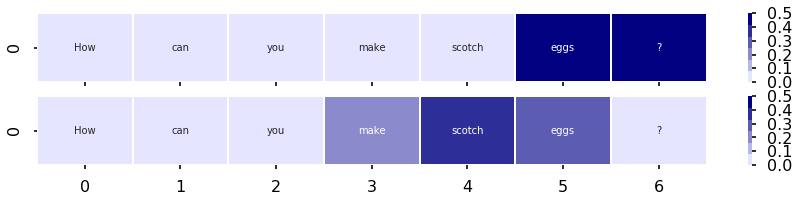

------------------------------
What is the purpose behind religion ?
9


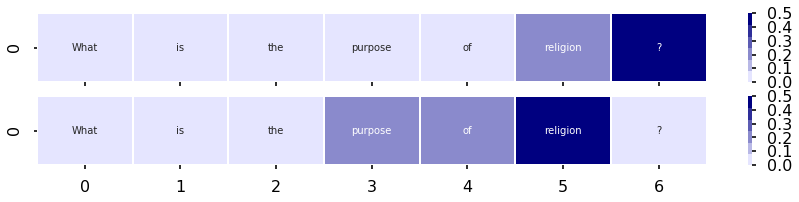

------------------------------
Why is Hillary Clinton a pathological liar ?
9


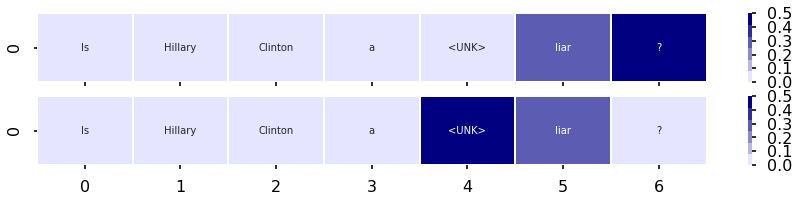

------------------------------
Was Donald Trump <UNK> on the first Presidential debate ?
9


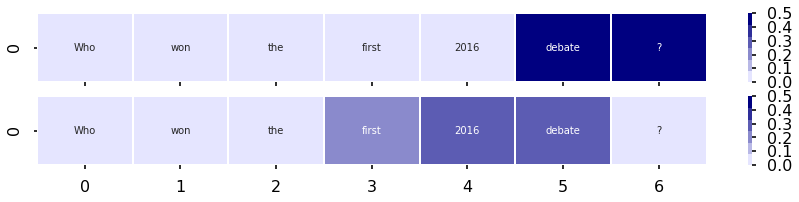

------------------------------
What does your roof warranty actually cover ?
9


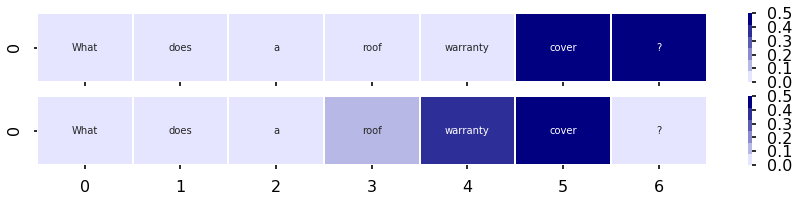

------------------------------
What do you mean by secularism ? What are some examples ?
9


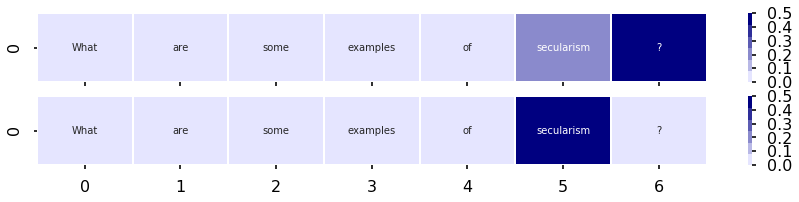

------------------------------
Where can I sell my idea ?
9


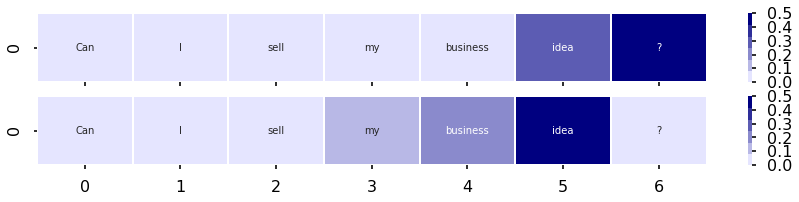

------------------------------
What your favourite movie ?
9


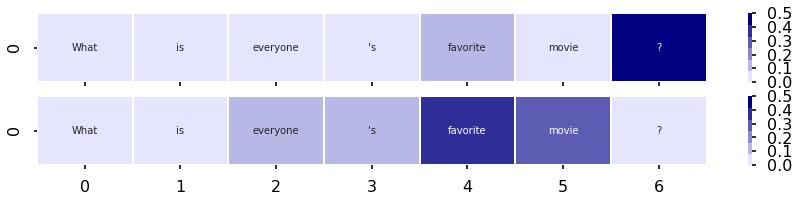

------------------------------
How do I increase the height ?
9


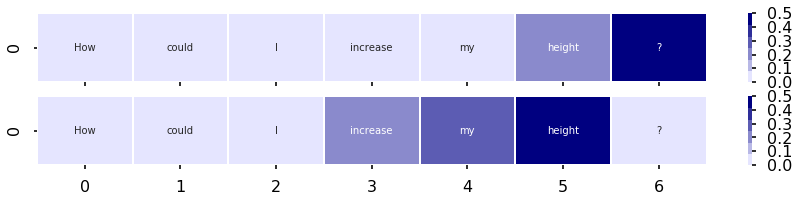

------------------------------
Where can I find a qualified hacker ?
9


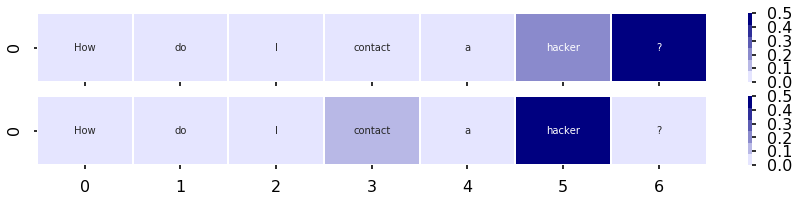

------------------------------
What are some good ways to hurt a psychopath ?
9


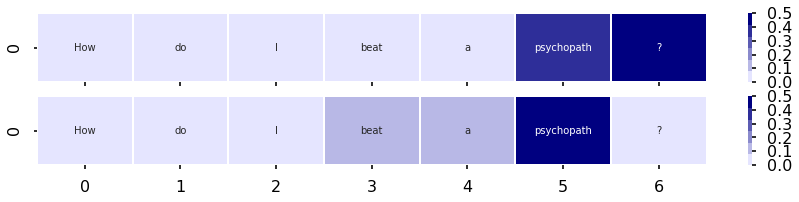

------------------------------
What is the best way to enlarge my penis ?
9


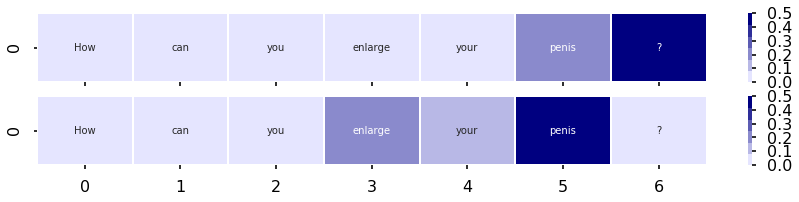

------------------------------
How I can I logout from Quora ?
9


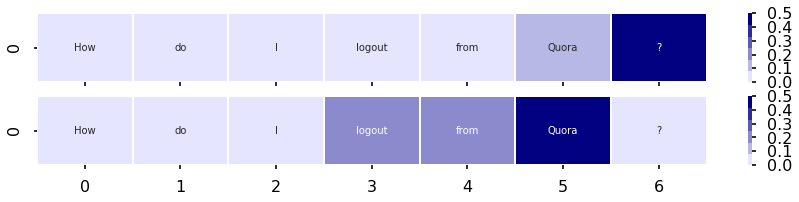

------------------------------
How do I shrink a T-shirt ?
9


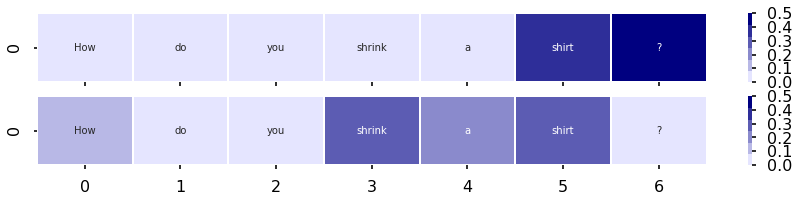

------------------------------
Why is the media against Trump ?
9


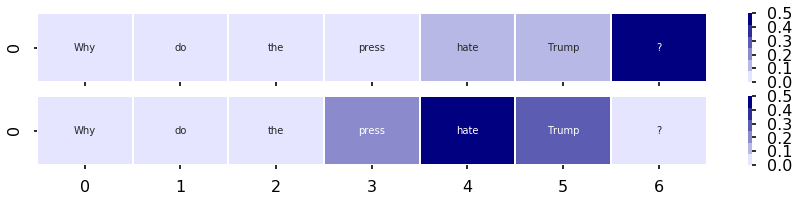

------------------------------
Why do n't people trust Hillary Clinton ?
9


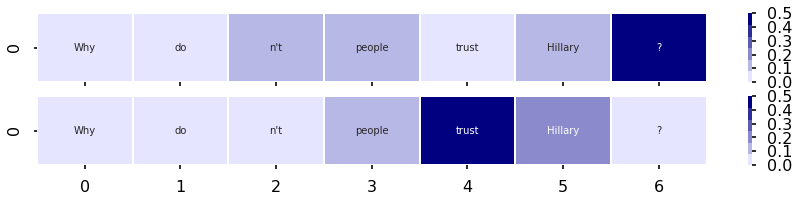

------------------------------
How do I lose 20-30 kg ?
9


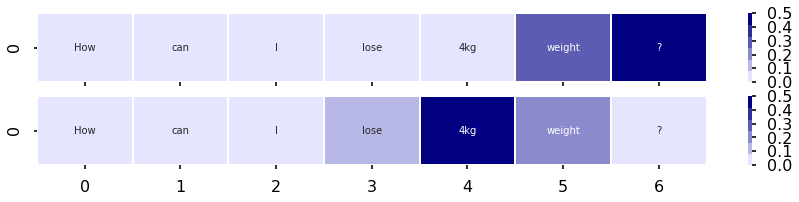

------------------------------
What are the ways to gain height ?
9


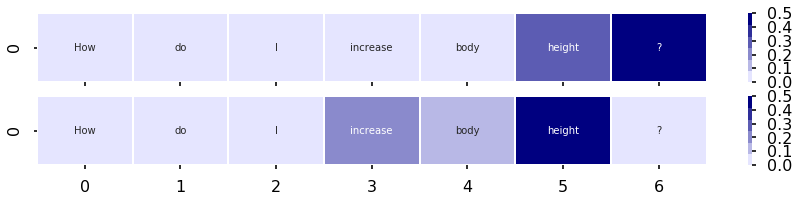

------------------------------
Why should anyone buy an iphone ?
9


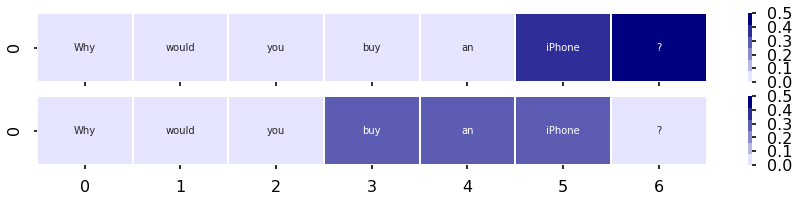

------------------------------
Has Ancient Egypt been scientifically tested ?
9


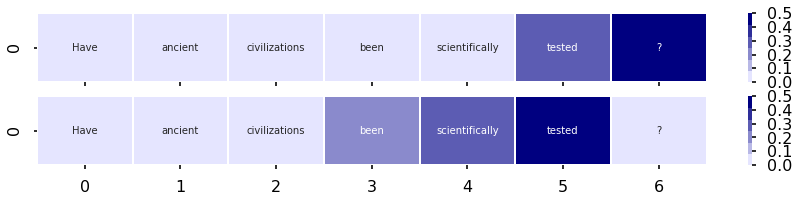

------------------------------
How can I continue to improve my English ?
9


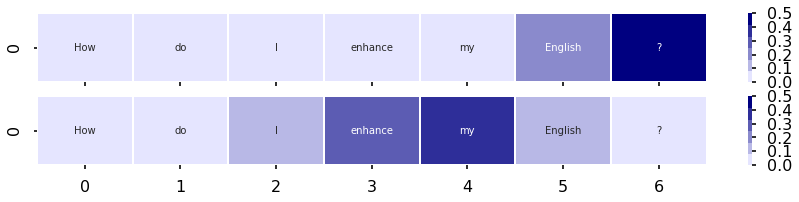

------------------------------
How do I get in touch with a hacker ?
9


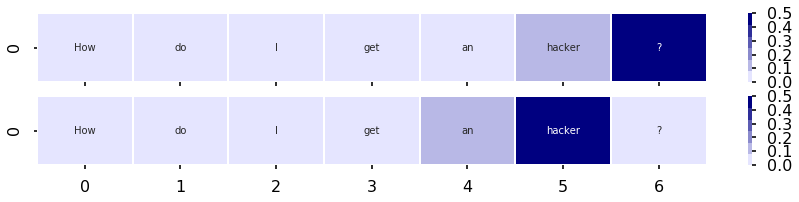

------------------------------
How can I increase girth of my penis ?
9


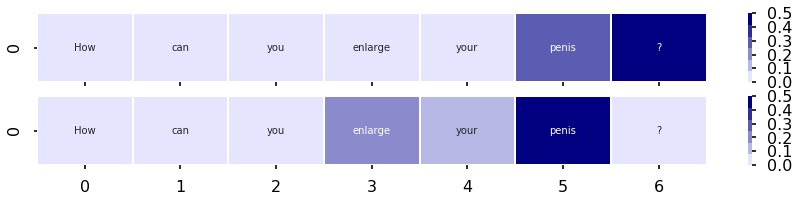

------------------------------
Who will win the 2016 United States Presidential election : Trump or Clinton ?
9


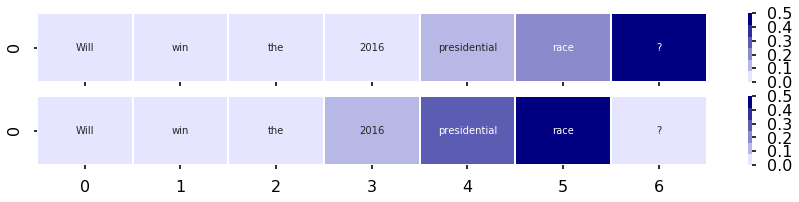

------------------------------
How can I continue to improve my English ?
9


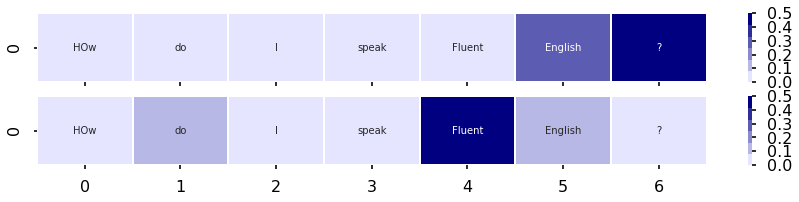

------------------------------
I want to improve my English ?
9


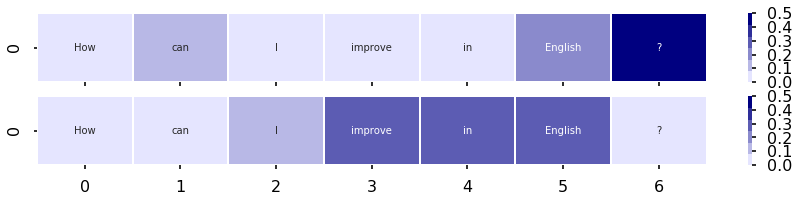

------------------------------
How can we control anger ?
9


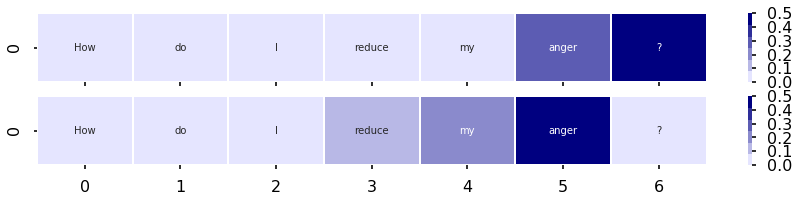

------------------------------
Spotify : When will Spotify be available in India ? What are the reasons for this unavailability ?
9


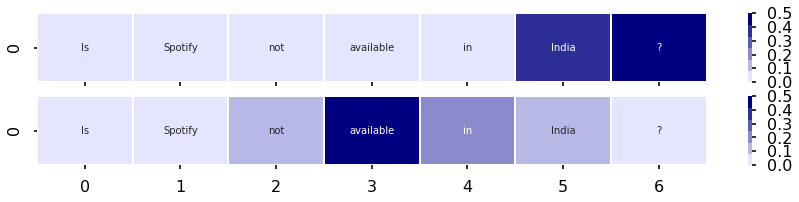

------------------------------
How should one change their diet to lose weight ?
9


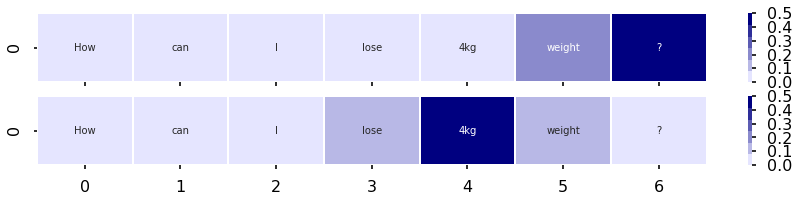

------------------------------
How we improve our communication skills ?
9


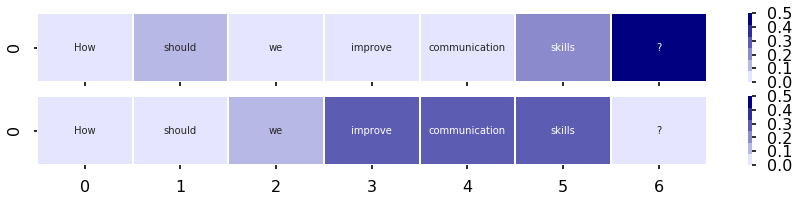

------------------------------
Which is the best movie 2016 ?
9


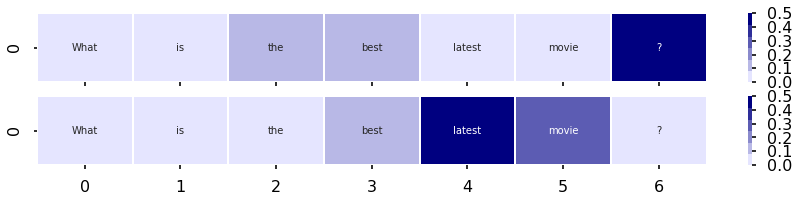

------------------------------
What are the disadvantages of python language ?
9


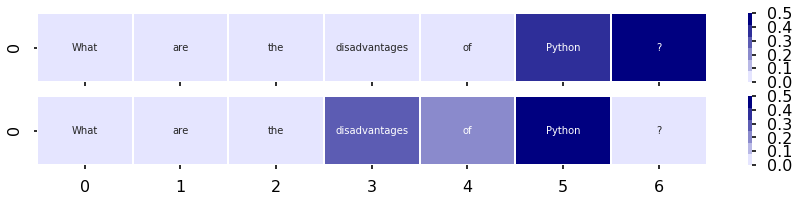

------------------------------
How can I improve my English Language ?
9


//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65311 missing from current font.
  font.set_text(s, 0.0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 65311 missing from current font.
  font.set_text(s, 0, flags=flags)


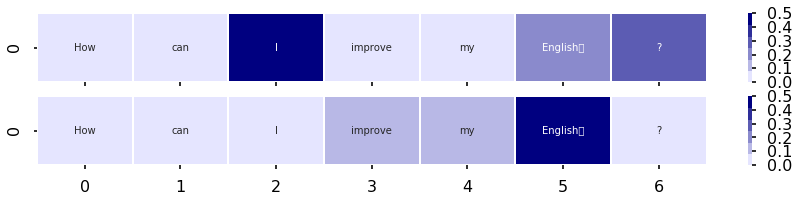

------------------------------
Which are the best Quora answers one must read ?
9


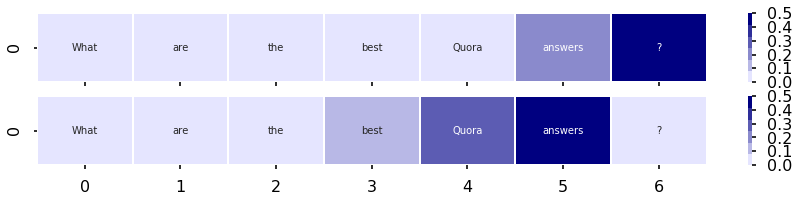

------------------------------
What are some of the best ways to spend our time wisely ?
9


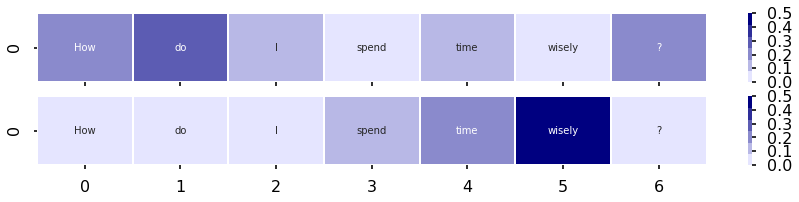

------------------------------
What is A2A ?
9


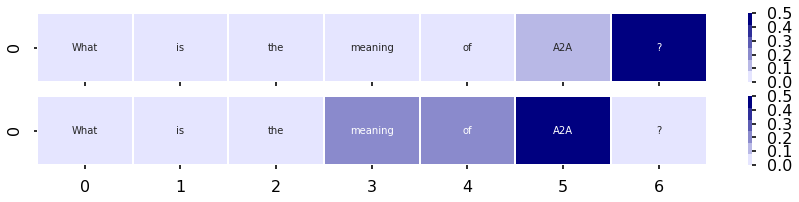

------------------------------
How did Donald trump win the elections ?
9


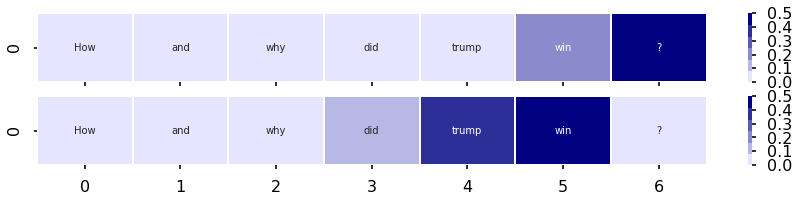

------------------------------
How can we play Pokémon GO ?
9


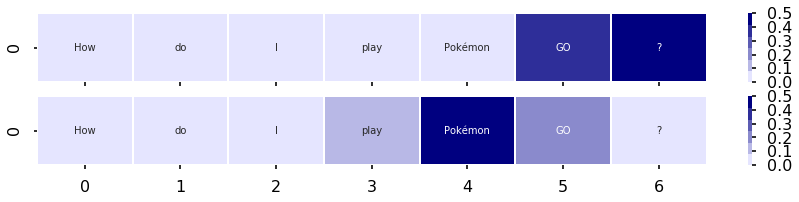

------------------------------
Who is better Donald Trump or Hillary Clinton and why ?
9


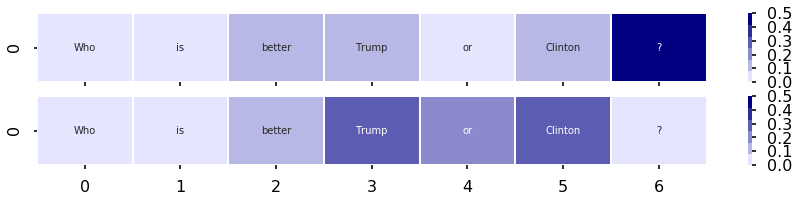

------------------------------
What is Shri Narendra Modi 's e-mail address ?
9


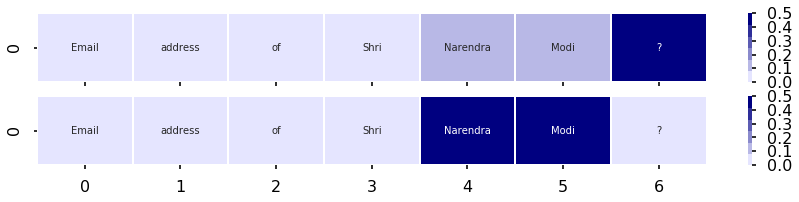

------------------------------
When did you start masturbating ?
9


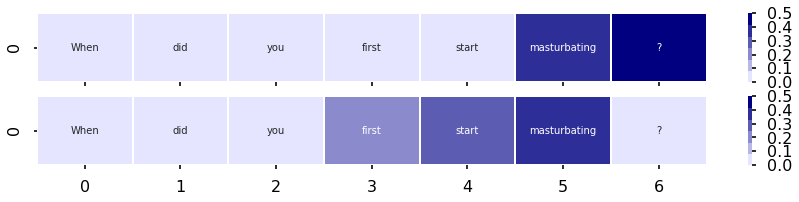

------------------------------
Would Mr. Donald Trump be a better president than Hillary Clinton ?
9


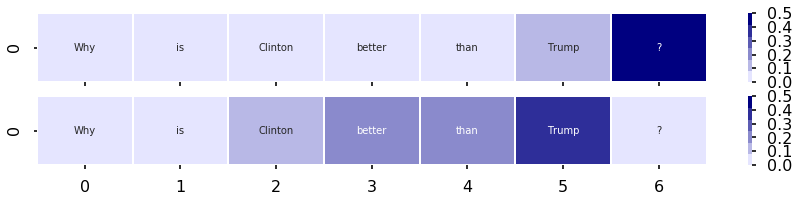

------------------------------
Is it possible that Donald Trump is in cahoots with Hillary Clinton ?
9


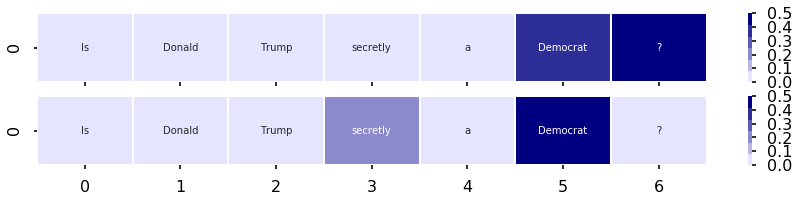

------------------------------
What is the best way to make money make more money ?
9


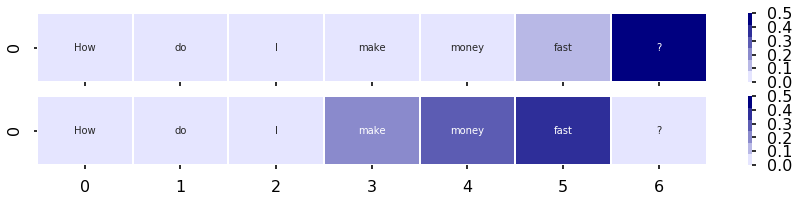

------------------------------
What is karma according to Vedas ?
9


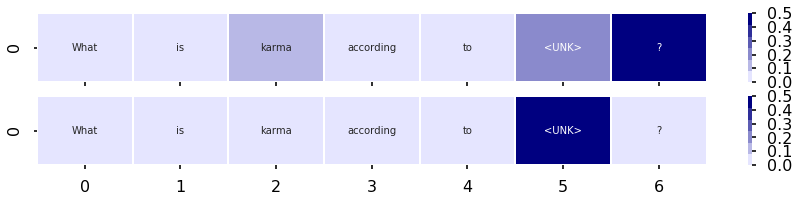

------------------------------
What is the best computer programming language to learn first ?
9


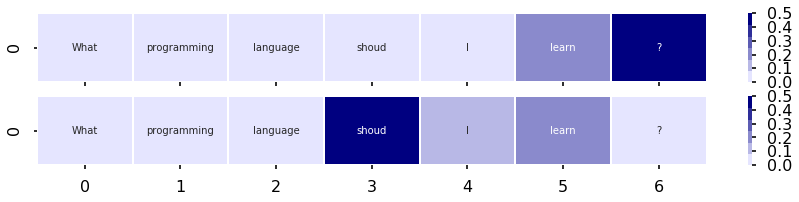

------------------------------
How can you make an anime opening ?
9


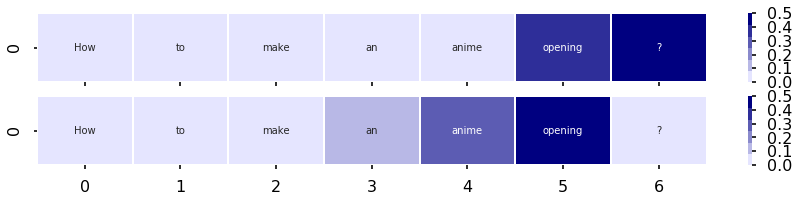

------------------------------
What is the purpose of your life ?
9


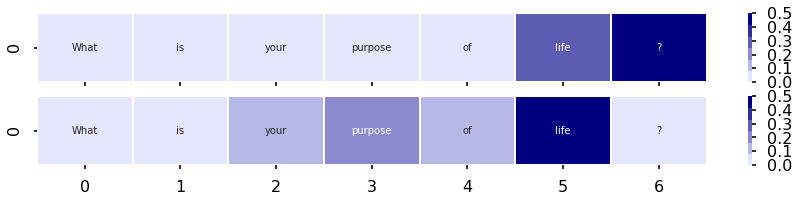

------------------------------
Is it possible to post a rhetorical question on Quora ?
9


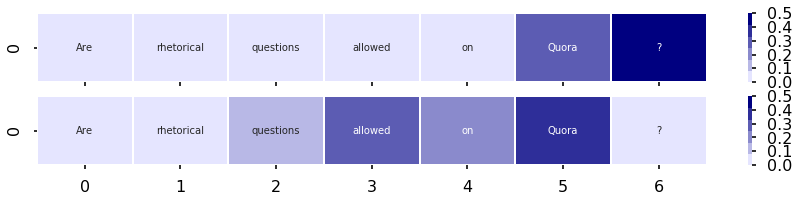

------------------------------
What motivates people with technical experience to answer questions on Quora ?
9


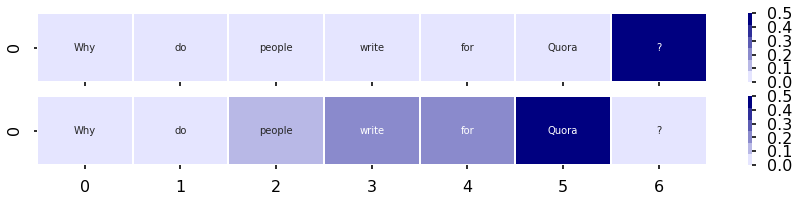

------------------------------
What should I include on a CV ?
9


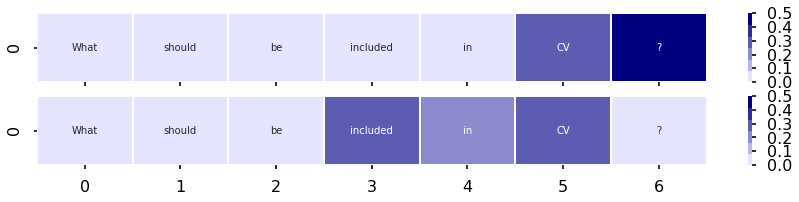

------------------------------
What is the meaning of the universe ?
9


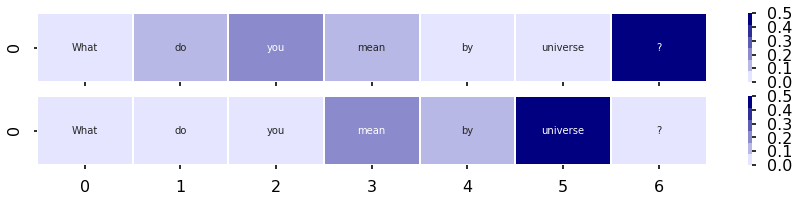

------------------------------
How do I improve my life ?
9


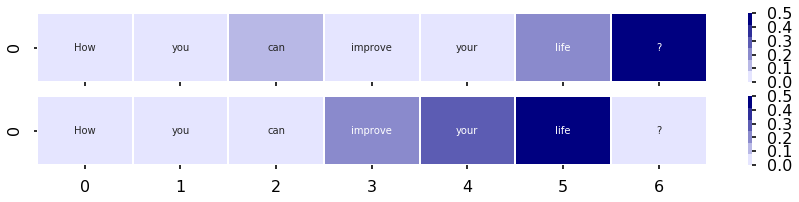

------------------------------
What are the prophecies of world war 3 and will it actually happen ?
9


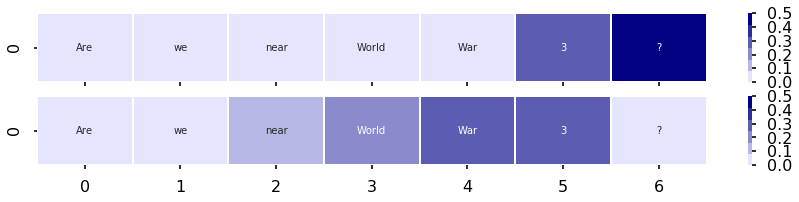

------------------------------
Is sex really that important in maintaining long term happy relationship ?
9


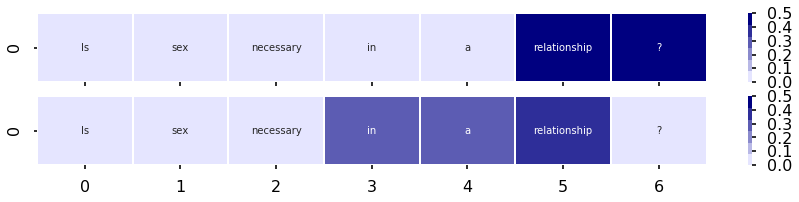

------------------------------
What is your favourite book genre ?
9


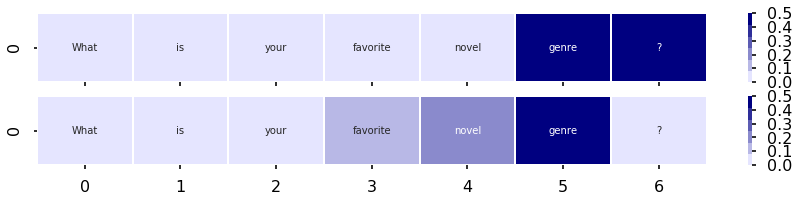

------------------------------
How I can make money fast ?
9


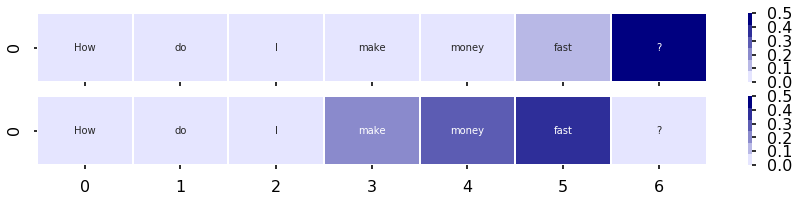

------------------------------
Can I make money on Quora ?
9


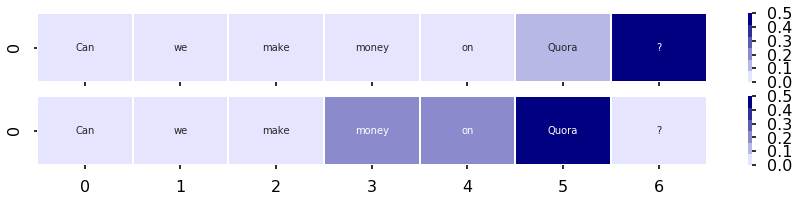

------------------------------
What are the things you miss the most about your childhood ?
9


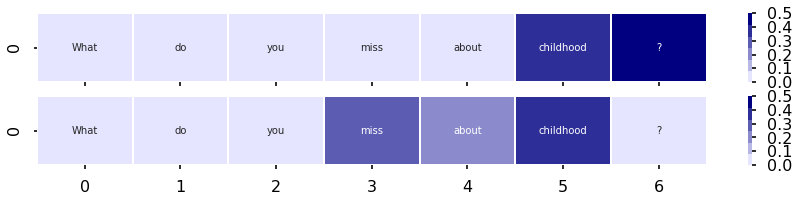

------------------------------
How did Elon Musk become so amazing ?
9


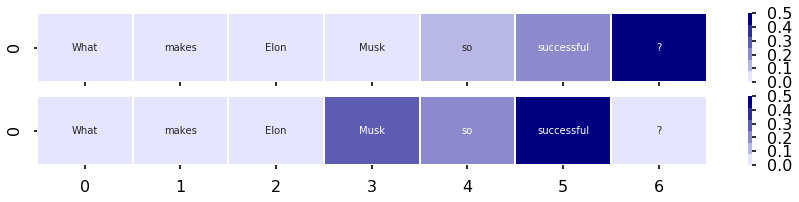

------------------------------
Who invented Google ?
9


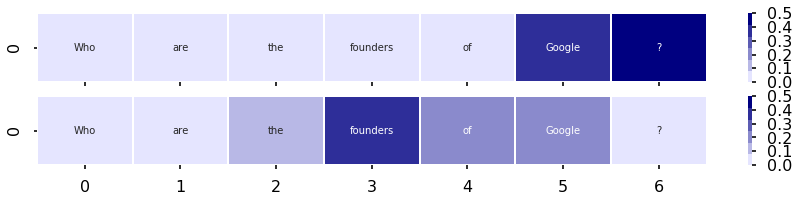

------------------------------
How improve vocabulary in English ?
9


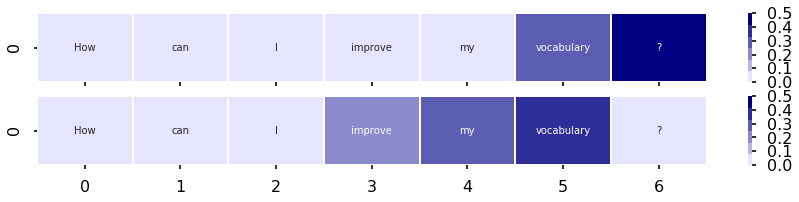

------------------------------
Was surgical strike really happened in POK on morning of 29th September ?
9


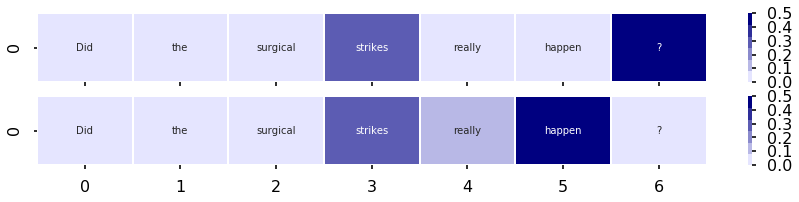

------------------------------
Which bikes are 2 stroke ?
9


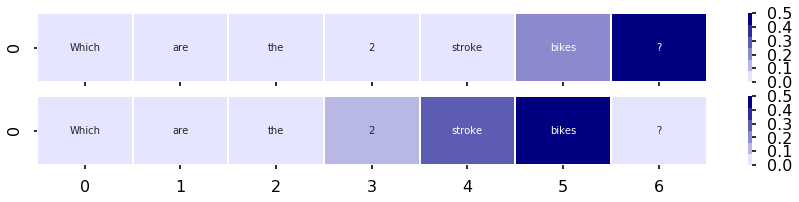

------------------------------
Why did you join ISIS ?
9


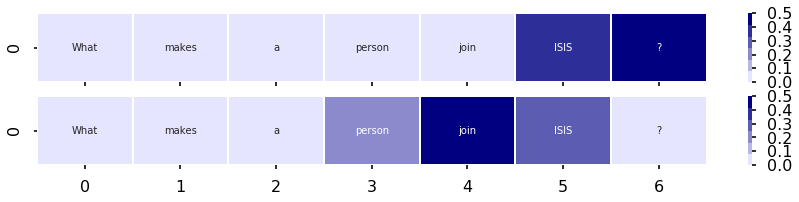

------------------------------
What is your New Year resolution ?
9


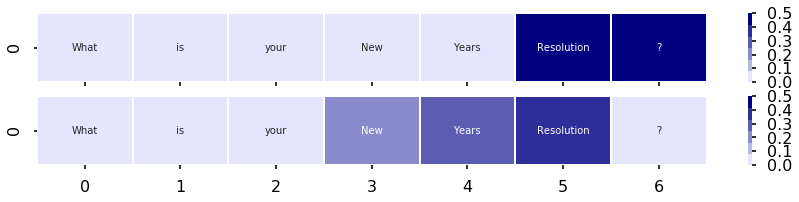

------------------------------
Is hell and heaven real ?
9


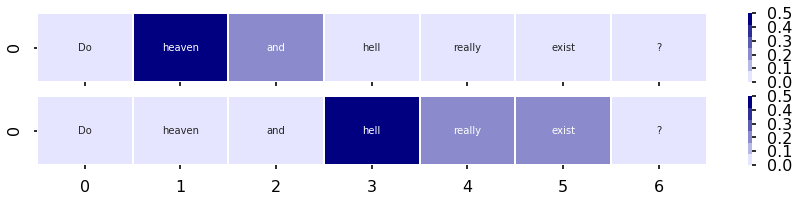

------------------------------
What is your New Year 's resolutions for 2017 ?
9


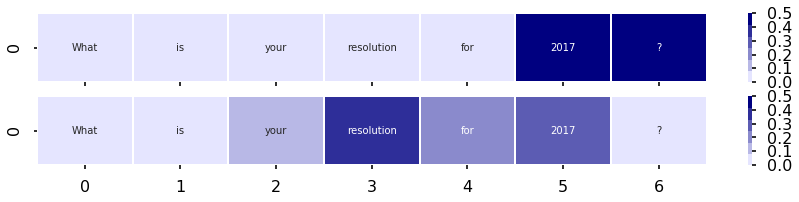

------------------------------
What is the Baluchistan issue ?
9


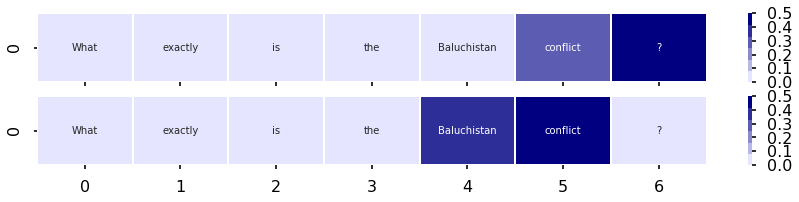

------------------------------
What is your favourite meal and why ?
9


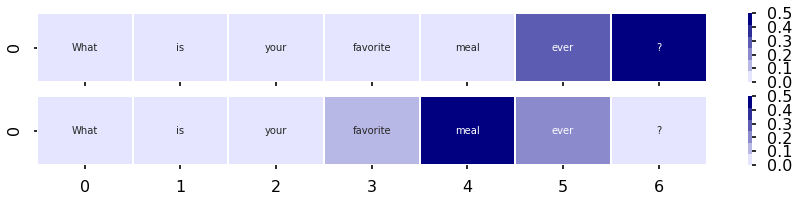

------------------------------
How do I grow taller ? Some tips ?
9


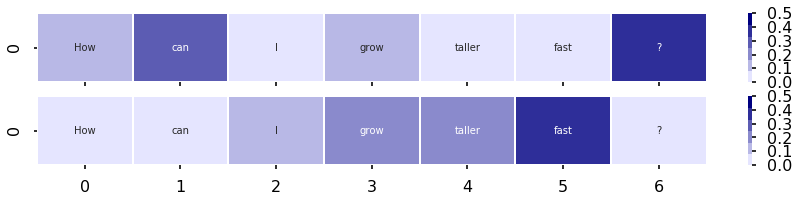

------------------------------
What are the best was to lose weight ?
9


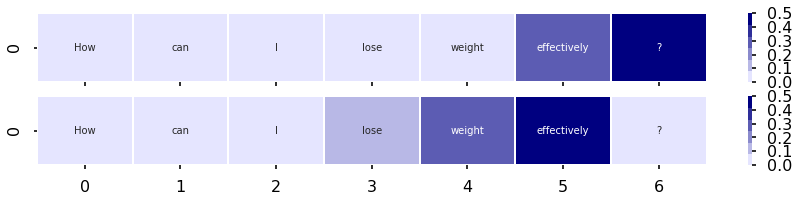

------------------------------
What is the fee of MIT ?
9


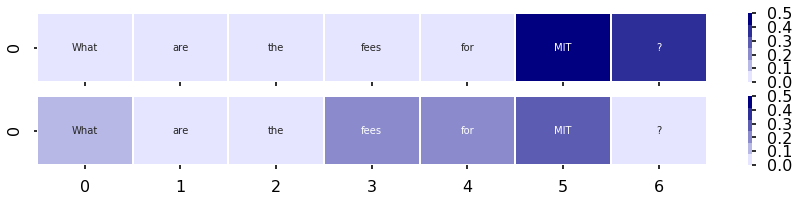

------------------------------
How did you cure your acne ?
9


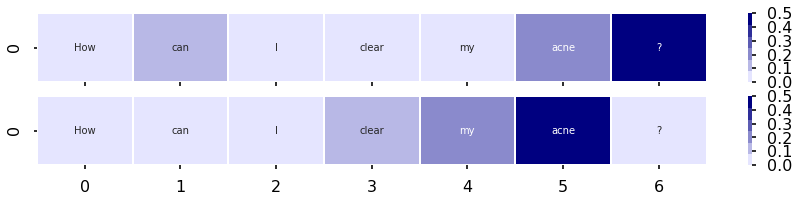

------------------------------
Narendra Modi : How should I meet Modi ?
9


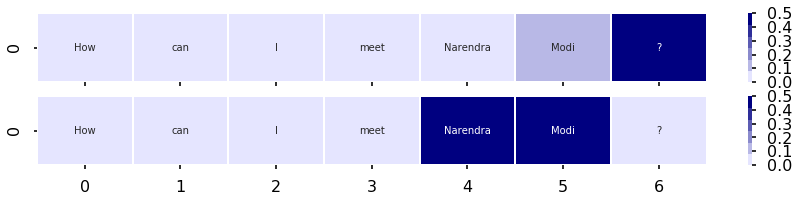

------------------------------
What startups have used GitHub ?
9


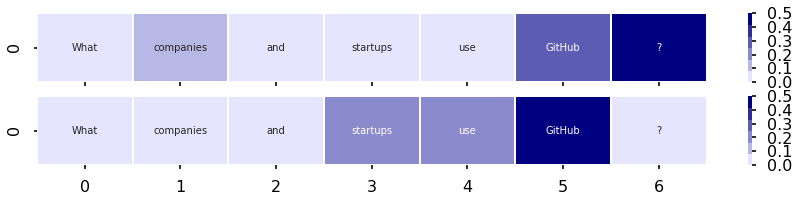

------------------------------
I am ugly and fat , how to lose weight ?
9


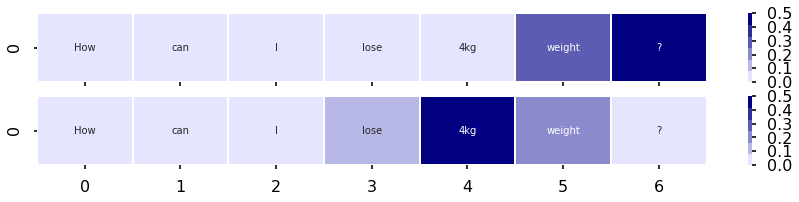

------------------------------
What motivates you to answer Quora questions ?
9


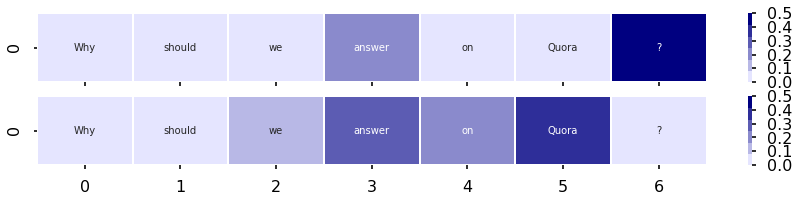

------------------------------
What is your purpose of life ?
9


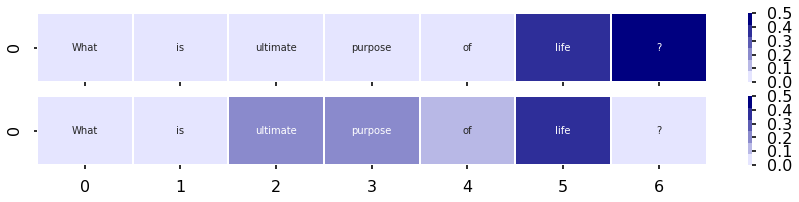

------------------------------
At the end of the day what matters to you the most ?
9


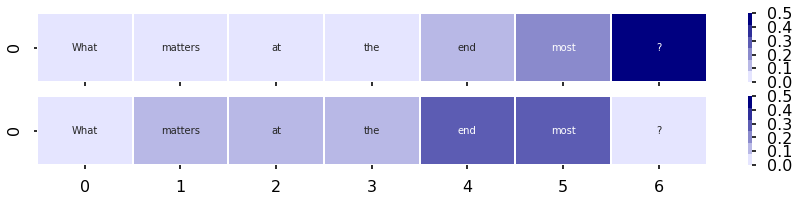

------------------------------
Cropping saved pngs
Done cropping


In [12]:
count = print_attention(output1,output2, output3, max=250, plot=True, output_filter=1, jsd_thresh=0.3)